### Phase Space and Entanglement Calculation:

In [1]:
#importing necessary libraries:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib.colors as colors
###########################################################################################################################

#defining all functions:
def root_evaluator(G,Delta_t,Omega):
    ns_1=G*G
    root_insider=G**4 - (((4*kpa*kpa)/(Omega*Omega))) - 4*G*G*Delta_t/Omega 
    if(root_insider<0):
        ns_2=ns_1
        ns_3=ns_1
    else:
        ns_2=0.5*G*G - Delta_t/Omega + 0.5*np.real(np.sqrt(root_insider +0j))
        ns_3=0.5*G*G - Delta_t/Omega - 0.5*np.real(np.sqrt(root_insider +0j))
    return ns_1,ns_2,ns_3

def root_adjuster(roots,discriminant):
    if discriminant<0:
        for i in range(len(roots)):
            if(np.imag(roots[i])==0):
                real_soln=roots[i]*np.ones(len(roots))
    else:
        real_soln=roots
    return real_soln

def phase_gap_evaluator(roots,discriminant,A):
    sign=0  #taking 0 stable roots initially (signifying instability region)
    gap=np.zeros(3)
    root_stability_values=np.zeros(3)
    phaser_val=0
    if discriminant>0:
        for i in range(3):
            root_stability_values[i]=(-(np.sign(np.max(np.real(np.linalg.eigvals(A[i,:,:]))))-1)/2)
            sign=sign + (-(np.sign(np.max(np.real(np.linalg.eigvals(A[i,:,:]))))-1)/2)
            gap[i]=np.min(np.abs(np.real(np.linalg.eigvals(A[i,:,:]))))
            phaser_val+=(2**i)*root_stability_values[i]
    else:
        for i in range(3):
            root_stability_values[i]=(-(np.sign(np.max(np.real(np.linalg.eigvals(A[i,:,:]))))-1)/2)
            phaser_val+=(2**i)*root_stability_values[i]
        sign=sign + (-(np.sign(np.max(np.real(np.linalg.eigvals(A[0,:,:]))))-1)/2)
        gap=np.min(np.abs(np.real(np.linalg.eigvals(A[0,:,:]))))*np.ones(3)
    return sign,gap,root_stability_values,phaser_val

def A_evaluator_2Nx2N(Delta_t,kp1,N):
    A=np.zeros((3,2*N +2,2*N +2),dtype=np.complex128)
    # x_as=x_a[sol_ind];p_as=p_a[sol_ind]
    # Delta_ts=Delta_t-Omega*G*G -2*(G1*np.real(beta1)+G2*np.real(beta2))
    Delta_ts=Delta_t-Omega*(n_a[0,iG,iD]-n_a[:,iG,iD])#*G*G -2*(G1*np.real(beta1)+G2*np.real(beta2))
    for i in range(1,N+1):
        A[:,2*i,2*i]=-kpb_dist[i-1]*np.ones(3)
        A[:,2*i,2*i+1]=-o_dist[i-1]*np.ones(3)
        A[:,2*i+1,2*i]=o_dist[i-1]*np.ones(3)
        A[:,2*i+1,2*i+1]=-kpb_dist[i-1]*np.ones(3)
        # A[0,2*i+1]=-np.sqrt(2)*g_dist[i-1]*x_as;A[0,2*i+1]=np.sqrt(2)*g_dist[i-1]*p_as
##        A[:,0,2*i+1]=np.sqrt(2)*g_dist[i-1]*x_a;A[:,1,2*i+1]=-np.sqrt(2)*g_dist[i-1]*p_a
##        A[:,2*i,0]=np.sqrt(2)*g_dist[i-1]*p_a;A[:,2*i,1]=np.sqrt(2)*g_dist[i-1]*x_a
        A[:,0,2*i]=np.sqrt(2)*g_dist[i-1]*p_a;A[:,1,2*i]=np.sqrt(2)*g_dist[i-1]*x_a
        A[:,2*i+1,0]=np.sqrt(2)*g_dist[i-1]*x_a;A[:,2*i+1,1]=-np.sqrt(2)*g_dist[i-1]*p_a
    A[:,0,0]=-kpa*np.ones(3);A[:,0,1]=Delta_ts;A[:,1,0]=-Delta_ts;A[:,1,1]=-kpa*np.ones(3)
    return A

def Dia_evaluator_2Nx2N(Delta_t,kp1,N):
    Dia=np.zeros(2*N+2)
    Dia[0]=np.sqrt(2*kpa);Dia[1]=np.sqrt(2*kpa)
    for i in range(1,N+1):
        Dia[2*i]=np.sqrt(2*kpb_dist[i-1])
        Dia[2*i+1]=np.sqrt(2*kpb_dist[i-1])
    Dia=np.diag(Dia)
    return Dia

def Chi_evaluator_2Nx2N(Delta_t,kp1,N):
    Chi=np.zeros((2*N +2,2*N +2),dtype=np.complex128)
    n1_i=1/np.expm1(hbar*o_dist/(kb*T))
    Nr=np.sinh(r)**2 + N0*(np.sinh(r)**2 + np.cosh(r)**2)
    Mr=np.sinh(r)*np.cosh(r)*np.exp(1j*theta)*(2*N0+1)
    Chi[0,0]=(2*Nr+1 +Mr+np.conj(Mr));Chi[1,1]=(2*Nr+1 -(Mr+np.conj(Mr)))
    Chi[0,1]=1j*(1 +np.conj(Mr)-Mr);Chi[1,0]=1j*(-1 +np.conj(Mr)-Mr)
    for i in range(1,N+1):
        Chi[2*i,2*i]=(2*n1_i[i-1] + 1);Chi[2*i,2*i+1]=1j
        Chi[2*i+1,2*i]=-1j;Chi[2*i+1,2*i+1]=(2*n1_i[i-1] + 1)
    return 0.5*Chi

def spectrum_evaluator(o,Chi,A,D0):
    M=-(Id + D0@np.linalg.inv(A+1j*o*Id)@D0)
    M_neg=-(Id + D0@np.linalg.inv(A-1j*o*Id)@D0)
    S=M@Chi@(M_neg.T)
    return S[0,0]+S[1,1]#+S[0,1]+S[1,0]

def root_adjuster(roots,discriminant):
    if discriminant<0:
        for i in range(len(roots)):
            if(np.imag(roots[i])==0):
                real_soln=roots[i]*np.ones(len(roots))
    else:
        real_soln=roots
    return real_soln

def phase_gap_evaluator(roots,discriminant,A):
    sign=0  #taking 0 stable roots initially (signifying instability region)
    gap=np.zeros(3)
    root_stability_values=np.zeros(3)
    phaser_val=0
    if discriminant>0:
        for i in range(3):
            root_stability_values[i]=(-(np.sign(np.max(np.real(np.linalg.eigvals(A[i,:,:]))))-1)/2)
            sign=sign + (-(np.sign(np.max(np.real(np.linalg.eigvals(A[i,:,:]))))-1)/2)
            gap[i]=np.min(np.abs(np.real(np.linalg.eigvals(A[i,:,:]))))
            phaser_val+=(2**i)*root_stability_values[i]
    else:
        for i in range(3):
            root_stability_values[i]=(-(np.sign(np.max(np.real(np.linalg.eigvals(A[i,:,:]))))-1)/2)
            phaser_val+=(2**i)*root_stability_values[i]
        sign=sign + (-(np.sign(np.max(np.real(np.linalg.eigvals(A[0,:,:]))))-1)/2)
        gap=np.min(np.abs(np.real(np.linalg.eigvals(A[0,:,:]))))*np.ones(3)
    return sign,gap,root_stability_values,phaser_val

def logarithmic_negativity(V):
    """
    Calculates the logarithmic negativity given a symmetrized covariance
    matrix, see :func:`qutip.continous_variables.covariance_matrix`. Note that
    the two-mode field state that is described by `V` must be Gaussian for this
    function to applicable.

    Parameters
    ----------

    V : *2d array*
        The covariance matrix.

    Returns
    -------

    N : float 
        The logarithmic negativity for the two-mode Gaussian state
        that is described by the the Wigner covariance matrix V.

    """

    A = V[0:2, 0:2]
    B = V[2:4, 2:4]
    C = V[0:2, 2:4]

    sigma = np.linalg.det(A) + np.linalg.det(B) - 2 * np.linalg.det(C)
    nu_ = sigma / 2 - np.sqrt(sigma ** 2 - 4 * np.linalg.det(V)) / 2
    if nu_ < 0.0:
        return 0.0
    nu = np.sqrt(nu_)
    lognu = -np.log(2 * nu)
    # print(nu)
    logneg = max(0, lognu)

    return logneg

def entanglement_finder(A,D,n1,n2):
    LN=np.zeros(3);squeezing=np.zeros(3)
    for i in range(3):
        V=linalg.solve_continuous_lyapunov(A[i,:,:],-D)
        V_block=np.zeros((4,4),dtype=np.complex128)#np.array([[V[2*n1,2*n1],V[2*n1,2*n2]],[V[2*n2,2*n1],V[2*n2,2*n2]]])
        V_block[0:2,0:2]=V[2*n1:2*n1+2,2*n1:2*n1+2];V_block[2:4,2:4]=V[2*n2:2*n2+2,2*n2:2*n2+2]#V11;V22
        V_block[0:2,2:4]=np.array([[V[2*n1,2*n2],V[2*n1,2*n2+1]],[V[2*n1+1,2*n2],V[2*n1+1,2*n2+1]]])#V12
        V_block[2:4,0:2]=V_block[0:2,2:4].T
        LN[i]=np.real(logarithmic_negativity(V_block))#DW-DW
        squeezing[i]=np.real(np.min(np.linalg.eigvals(V_block)))#DW-DW
    return LN,squeezing
###########################################################################################################################
#defining fundamental constants
hbar=1.0545718*1e-34
kb=1.38064852*1e-23

#defining system parameters and vectors:
N=2 #number of pinned DW/CSL modes
Nbins=401#number of bins for parameter variation
N_eff=1#0000
# sol_ind=0#which root to plot

kp1=2*np.pi*1e6;kp2=2*np.pi*1e6;kpa=2*np.pi*1e6#2*np.pi*1e6
g1=-2*np.pi*1e6
g2=-2*np.pi*1e6
G1=g1*np.sqrt(N_eff);G2=g2*np.sqrt(N_eff)
T=2e-3;o1=2*np.pi*1e9;o2=2*np.pi*1e9;oa=2*np.pi*1e12#Delta_a + 3.0*o1#0.000455
#xi=12e11;Pin=(hbar*oa*(xi)**2)/kpa
# Pin=5e-6;xi=np.sqrt((Pin*kpa)/(hbar*oa))
do2=0.00001*o1
Delta=-o1#+do2
r=0.0;theta=np.pi;phi=np.pi/2;N0=1/np.expm1(hbar*oa/(kb*T))

o_dist=np.array([o1,o2])#np.ones(N)*o1##
g_dist=np.ones(N)*G1
kpb_dist=np.array([kp1,kp2])#np.ones(N)*kp1
Omega=2*np.sum(o_dist*g_dist*g_dist/(o_dist**2 + kpb_dist**2))#2*( o1*G1*G1/(o1**2 + kp1**2) + o2*G2*G2/(o2**2 + kp2**2))
parameter_vec=np.linspace(-100,0,201)*o1
# parameter_vec=-np.logspace(2,-2,201)*o1
G_vec=np.linspace(0.0001,5,201)*o1/(-g1)
# G_vec=np.logspace(-2,1,201)*o1/(-g1)
Delta_t_vec=parameter_vec
o_vec=np.linspace(-2.5,2.5,101)*o1
G12_vec=np.sqrt( -(kpa**2 + Delta_t_vec**2)/(2*Omega*Delta_t_vec))
xi_vec=np.sqrt((Delta_t_vec**2 + kpa**2)*G12_vec*G12_vec)
eig_vals=np.zeros((2*(N+1),len(parameter_vec)),dtype=np.complex128)
ep_check=np.zeros(len(parameter_vec))
S_phi=np.zeros((len(parameter_vec),len(o_vec)))
Log_Neg=np.zeros(len(parameter_vec),dtype=np.complex128)
Id=np.identity(2*N+2);S=np.ones((2*N+2,2*N+2),dtype=np.complex128)

#defining diffusion matrix
D0=2*kpa*np.sinh(r)**2 + kpa*(2*N0*(np.sinh(r)**2 + np.cosh(r)**2) + 1) + 2.*kpa*np.sinh(r)*np.cosh(r)*(1+2*N0)
D1=2*kpa*np.sinh(r)**2 + kpa*(2*N0*(np.sinh(r)**2 + np.cosh(r)**2) + 1) - 2.*kpa*np.sinh(r)*np.cosh(r)*(1+2*N0)
D=np.zeros(2*N+2);D[0]=D0;D[1]=D1;ni_th=1/np.expm1(hbar*o_dist/(kb*T))
for i in range(1,N+1):
    D[2*i]=kpb_dist[i-1]*(2.0*ni_th[i-1]+1.0);D[2*i+1]=kpb_dist[i-1]*(2.0*ni_th[i-1]+1.0)
D=np.diag(D)

#defining transformation from Drift Matrix to Non-Hermitian Hamiltonian:
U=np.zeros((2*N+2,2*N+2),dtype=np.complex128)
for i in range(N+1):
    U[2*i,2*i]=1;U[2*i,2*i+1]=1
    U[2*i+1,2*i]=-1j;U[2*i+1,2*i+1]=1j
U=U/np.sqrt(2)

phaser=np.zeros((len(G_vec),len(parameter_vec)))  #to study phase transitions (captures number of stable roots)
Delta_d=np.zeros((3,len(G_vec),len(parameter_vec)))  #dissipative gap
Delta_vec=np.zeros((len(G_vec),len(parameter_vec)))
discriminant=np.zeros((len(G_vec),len(parameter_vec)))  #to study number of roots
n_a=np.zeros((3,len(G_vec),len(parameter_vec)),dtype=np.complex128)  #mean photon number
root_stability=np.zeros((3,len(G_vec),len(parameter_vec)))  #mean photon number
phaser1=np.zeros((len(G_vec),len(parameter_vec)))
# eigvals=np.zeros((3,2*N+2,len(parameter_vec)),dtype=np.complex128)
# Spectra=np.zeros(( 3,len(o_vec),len(parameter_vec))) #stores spectrum
Entanglement_phDw=np.zeros((3,len(G_vec),len(parameter_vec))) #stores entanglement
Entanglement_DwDw=np.zeros((3,len(G_vec),len(parameter_vec))) #stores entanglement
Entanglement_phDw_max=np.zeros((len(G_vec),len(parameter_vec))) #stores entanglement
Entanglement_DwDw_max=np.zeros((len(G_vec),len(parameter_vec))) #stores entanglement
Squeezing_phDw=np.zeros((3,len(G_vec),len(parameter_vec))) #stores Squeezing
Squeezing_DwDw=np.zeros((3,len(G_vec),len(parameter_vec))) #stores Squeezing
H=np.zeros((3,2*N+2,2*N+2),dtype=np.complex128)

for iD,Delta_t in enumerate(parameter_vec):
    for iG,G in enumerate(G_vec):
        # G=np.sqrt( -(kpa**2 + Delta_t**2)/(2*Omega*Delta_t))#+(o1*1e-6)/(-g1)
        xi=np.sqrt((Delta_t**2 + kpa**2)*G*G)
        # Omega=2*np.sum(o_dist*g_dist*g_dist/(o_dist**2 + kpb_dist**2))
        Delta=Delta_t - Omega*G*G#*(g1*g1)
        a=1;b=2*Delta/Omega;c=(Delta**2 + kpa**2)/(Omega**2);d=-(xi/Omega)**2
        p=[a,b,c,d];discriminant[iG,iD]=np.sign(( 4*(b**2 - 3*a*c)**3 - (2*b**3 - 9*a*b*c + 27*a*a*d)**2 )/(27*a*a))
        n_a[:,iG,iD]=np.array(root_evaluator(G,Delta_t,Omega));alpha=1j*xi/(Delta_t + Omega*(n_a[:,iG,iD]-n_a[0,iG,iD]) + 1j*kpa);phi_a=np.angle(alpha)
        Delta_vec[iG,iD]=Delta_t-Omega*np.real(n_a[0,iG,iD])
        x_a=np.sqrt(2)*np.real(alpha);p_a=np.sqrt(2)*np.imag(alpha)
        beta1=-1j*G1*n_a[:,iG,iD]/(1j*o1 + kp1);beta2=-1j*G2*n_a[:,iG,iD]/(1j*o2 + kp2)
        # Delta_t=Delta + np.real( G1*(beta1+np.conj(beta1))+ G2*(beta2+np.conj(beta2)))
        # kpb_dist=np.array([kp1,kp2])#np.ones(N)*kp1
        A=A_evaluator_2Nx2N(Delta_t,kp1,N)
        Dia=Dia_evaluator_2Nx2N(Delta_t,kp1,N)
        Chi=Chi_evaluator_2Nx2N(Delta_t,kp1,N)
        phaser[iG,iD],Delta_d[:,iG,iD],root_stability[:,iG,iD],phaser1[iG,iD]=phase_gap_evaluator(n_a[:,iG,iD],discriminant[iG,iD],A)
        Entanglement_DwDw[:,iG,iD],Squeezing_DwDw[:,iG,iD]=entanglement_finder(A,D,1,2)*root_stability[:,iG,iD]
        Entanglement_phDw[:,iG,iD],Squeezing_phDw[:,iG,iD]=entanglement_finder(A,D,0,1)*root_stability[:,iG,iD]
        Entanglement_DwDw_max[iG,iD]=np.max(Entanglement_DwDw[:,iG,iD])
        Entanglement_phDw_max[iG,iD]=np.max(Entanglement_phDw[:,iG,iD])

print("calculations completed!")

/tmp/ipykernel_90480/2563820675.py:189: RuntimeWarning: overflow encountered in expm1
  r=0.0;theta=np.pi;phi=np.pi/2;N0=1/np.expm1(hbar*oa/(kb*T))
/tmp/ipykernel_90480/2563820675.py:201: RuntimeWarning: divide by zero encountered in divide
  G12_vec=np.sqrt( -(kpa**2 + Delta_t_vec**2)/(2*Omega*Delta_t_vec))
/tmp/ipykernel_90480/2563820675.py:201: RuntimeWarning: invalid value encountered in sqrt
  G12_vec=np.sqrt( -(kpa**2 + Delta_t_vec**2)/(2*Omega*Delta_t_vec))


calculations completed!


luatex: /opt/intel/oneapi/intelpython/python3.12/lib/libcurl.so.4: no version information available (required by /usr/bin/../lib/../lib/libmiktex-packagemanager.so.11)


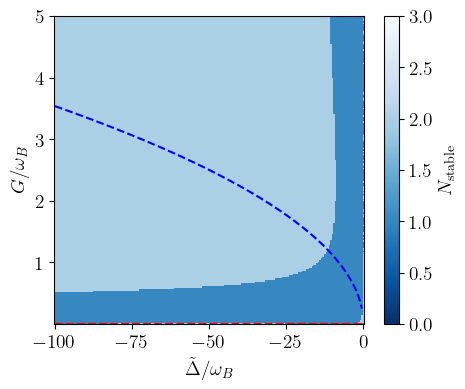

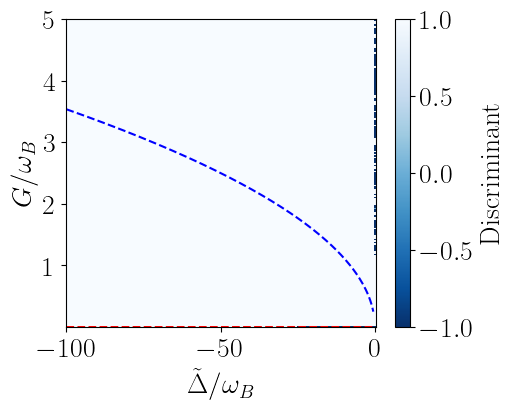

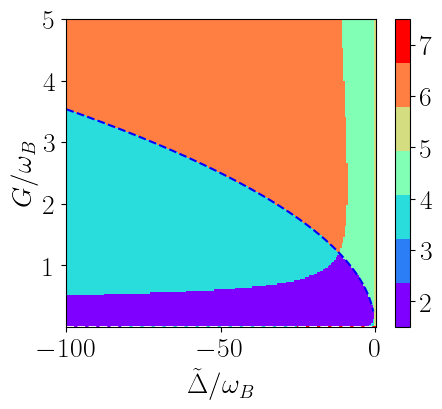

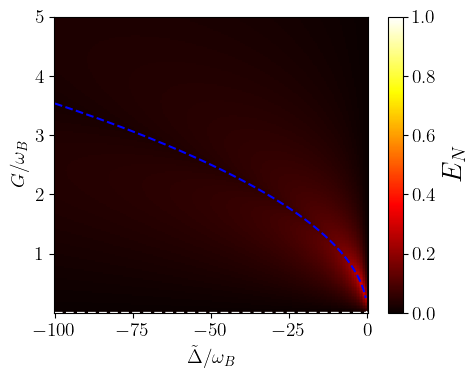

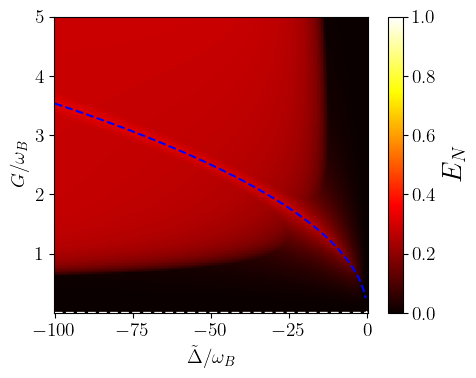

In [2]:
G23_vec=np.sqrt( 2*(Delta_t_vec + np.sqrt(Delta_t_vec**2 + kpa**2))/Omega )
# G12_vec=np.sqrt( -(kpa**2 + Delta_t_vec**2)/(2*Omega*Delta_t_vec))

# Y=parameter_vec0/o1
Y=G_vec*(-g1)/o1#G vector
X=Delta_t_vec/o1#delta vector
Z=phaser;Z1=discriminant

plt.figure(figsize=(5, 4))
plt.rc('font',**{'family':'serif','sans-serif':['Computer Modern Sans serif'],'size':14})
plt.rc('text', usetex=True)
axes = plt.axes()
# axes.plot(Xd,5*np.ones(len(Xd)),'--',color='red')
# plt.axvline(x=0.2, color="green", linestyle="--")
X,Y = np.meshgrid(X,Y)
im = axes.pcolormesh(X,Y,Z, cmap='Blues_r', shading='nearest',vmin=0,vmax=3)#,norm=colors.LogNorm()#Blues_r
#fig.colorbar(im, ax=axes, ticks=np.arange(10000)).set_label(r'$\frac{\zeta_{opt}(r=0,\theta=0)}{\zeta_{opt}(r,\theta)}$', fontsize=20)
plt.colorbar(im, ax=axes).set_label(r'$N_{\rm stable}$')
axes.set_xlabel(r'$\tilde{\Delta}/\omega_B$')
axes.set_ylabel(r'$G/ \omega_B$')
axes.set_facecolor("black")
#plt.xticks(np.arange(0, 1, step=0.2))
# plt.yscale('log')
# axes.plot(parameter_vec1/o1,hbar*oa*(y_vec1**2)/kpa,'--',color='red')
# axes.plot(parameter_vec1/o1,hbar*oa*(y_vec2**2)/kpa,'--',color='brown')
# axes.plot(parameter_vec1/o1,y_vec1/o1,'--',color='red')
# axes.plot(parameter_vec1/o1,y_vec2/o1,'--',color='brown')
# axes.scatter(np.sqrt(3)*kpa/o1,(np.sqrt((8*kpa**3)/(3*np.sqrt(3)*Omega))**2)*hbar*oa/kpa,marker='*',color='orange',s=50)#,label='Critical Point')
axes.plot(Delta_t_vec/o1,G23_vec*(-g1)/o1,'--',color='red')
axes.plot(Delta_t_vec/o1,G12_vec*(-g1)/o1,'--',color='blue')
# axes.scatter(Delta_c,G_c,marker='*',color='orange',s=50)#,label='Critical Point')
plt.ylim(G_vec[0]*(-g1)/o1,G_vec[-1]*(-g1)/o1)
# plt.legend(frameon=False, fontsize=12, labelcolor='white')
# plt.ylim(parameter_vec0[0]/o1,parameter_vec0[-1]/o1)
# plt.ylim((parameter_vec0[0]**2)*hbar*oa/kpa,(parameter_vec0[-1]**2)*hbar*oa/kpa)
# plt.tight_layout()
# plt.savefig("Phases_old.png", dpi=400)
plt.show()

# np.savetxt("phases_o2_by_o1=%.1f.txt" %(o2/o1), Z)

Y=G_vec*(-g1)/o1#G vector
X=Delta_t_vec/o1#delta vector
Z=discriminant

plt.figure(figsize=(5, 4))
plt.rc('font',**{'family':'serif','sans-serif':['Computer Modern Sans serif'],'size':20})
plt.rc('text', usetex=True)
axes = plt.axes()
# axes.plot(Xd,5*np.ones(len(Xd)),'--',color='red')
# plt.axvline(x=0.2, color="green", linestyle="--")
X,Y = np.meshgrid(X,Y)
im = axes.pcolormesh(X,Y,Z, cmap='Blues_r', shading='nearest')#,norm=colors.LogNorm()#Blues_r
#fig.colorbar(im, ax=axes, ticks=np.arange(10000)).set_label(r'$\frac{\zeta_{opt}(r=0,\theta=0)}{\zeta_{opt}(r,\theta)}$', fontsize=20)
plt.colorbar(im, ax=axes).set_label(r'Discriminant', fontsize=20)
axes.plot(Delta_t_vec/o1,G23_vec*(-g1)/o1,'--',color='red')
axes.plot(Delta_t_vec/o1,G12_vec*(-g1)/o1,'--',color='blue')
# axes.scatter(Delta_c,G_c,marker='*',color='orange',s=50)
axes.set_xlabel(r'$\tilde{\Delta}/\omega_B$')
axes.set_ylabel(r'$G/ \omega_B$')
axes.set_facecolor("black")
plt.ylim(G_vec[0]*(-g1)/o1,G_vec[-1]*(-g1)/o1)
#plt.xticks(np.arange(0, 1, step=0.2))
# plt.yscale('log')
plt.show()

Y=G_vec*(-g1)/o1#G vector
X=Delta_t_vec/o1#delta vector
Z=phaser1

cmap = plt.colormaps['rainbow']
colorx = cmap(np.linspace(0, 1, 7))
discrete_cmap = colors.ListedColormap(colorx)
plt.figure(figsize=(5, 4))
plt.rc('font',**{'family':'serif','sans-serif':['Computer Modern Sans serif'],'size':20})
plt.rc('text', usetex=True)
axes = plt.axes()
# axes.plot(Xd,5*np.ones(len(Xd)),'--',color='red')
# plt.axvline(x=0.2, color="green", linestyle="--")
X,Y = np.meshgrid(X,Y)
im = axes.pcolormesh(X,Y,Z, cmap=discrete_cmap, shading='nearest')#,norm=colors.LogNorm()#Blues_r
#fig.colorbar(im, ax=axes, ticks=np.arange(10000)).set_label(r'$\frac{\zeta_{opt}(r=0,\theta=0)}{\zeta_{opt}(r,\theta)}$', fontsize=20)
cbar=plt.colorbar(im, ax=axes, ticks=[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5])#.set_label(r'Phases', fontsize=20)
cbar.ax.set_yticklabels(['1', '2', '3', '4', '5', '6', '7', '8'])
axes.plot(Delta_t_vec/o1,G23_vec*(-g1)/o1,'--',color='white')
axes.plot(Delta_t_vec/o1,G12_vec*(-g1)/o1,'--',color='blue')
# axes.scatter(Delta_c,G_c,marker='*',color='orange',s=50)
axes.set_xlabel(r'$\tilde{\Delta}/\omega_B$')
axes.set_ylabel(r'$G/ \omega_B$')
axes.set_facecolor("black")
plt.ylim(G_vec[0]*(-g1)/o1,G_vec[-1]*(-g1)/o1)
#plt.xticks(np.arange(0, 1, step=0.2))
# plt.yscale('log')
plt.show()

Y=G_vec*(-g1)/o1#G vector
X=Delta_t_vec/o1#delta vector
Z=Entanglement_phDw_max#*root_stability[2,:,:]

plt.figure(figsize=(5, 4))
plt.rc('font',**{'family':'serif','sans-serif':['Computer Modern Sans serif'],'size':14})
plt.rc('text', usetex=True)
axes = plt.axes()
# axes.plot(Xd,5*np.ones(len(Xd)),'--',color='red')
# plt.axvline(x=0.2, color="green", linestyle="--")
X,Y = np.meshgrid(X,Y)
im = axes.pcolormesh(X,Y,Z, cmap='hot', shading='nearest',vmin=0,vmax=1)#,vmin=0,vmax=1/3)
#fig.colorbar(im, ax=axes, ticks=np.arange(10000)).set_label(r'$\frac{\zeta_{opt}(r=0,\theta=0)}{\zeta_{opt}(r,\theta)}$', fontsize=20)
plt.colorbar(im, ax=axes).set_label(r'$E_N$', fontsize=20)
axes.plot(Delta_t_vec/o1,G23_vec*(-g1)/o1,'--',color='white')
axes.plot(Delta_t_vec/o1,G12_vec*(-g1)/o1,'--',color='blue')
# axes.scatter(Delta_c,G_c,marker='*',color='orange',s=50)
# plt.axvline(x=-(o1+o2)/(2*o1),linestyle='dashed',color='black')
# plt.axvline(x=-(-o1+o2)/(2*o1),linestyle='dashed',color='black')
axes.set_xlabel(r'$\tilde{\Delta}/\omega_B$')
axes.set_ylabel(r'$G/ \omega_B$')
axes.set_facecolor("black")
plt.ylim(G_vec[0]*(-g1)/o1,G_vec[-1]*(-g1)/o1)
# plt.xlim(-1,0)
plt.tight_layout()
# plt.savefig("entangle_param.png", dpi=400)
plt.show()
# np.savetxt("Entab2_max_o2_by_o1=%.1f.txt" %(o2/o1), Z)

Y=G_vec*(-g1)/o1#G vector
X=Delta_t_vec/o1#delta vector
Z=Entanglement_DwDw_max#*root_stability[2,:,:]

plt.figure(figsize=(5, 4))
plt.rc('font',**{'family':'serif','sans-serif':['Computer Modern Sans serif'],'size':14})
plt.rc('text', usetex=True)
axes = plt.axes()
# axes.plot(Xd,5*np.ones(len(Xd)),'--',color='red')
# plt.axvline(x=0.2, color="green", linestyle="--")
X,Y = np.meshgrid(X,Y)
im = axes.pcolormesh(X,Y,Z, cmap='hot', shading='nearest',vmin=0,vmax=1)#,vmin=0,vmax=1/3)
#fig.colorbar(im, ax=axes, ticks=np.arange(10000)).set_label(r'$\frac{\zeta_{opt}(r=0,\theta=0)}{\zeta_{opt}(r,\theta)}$', fontsize=20)
plt.colorbar(im, ax=axes).set_label(r'$E_N$', fontsize=20)
axes.plot(Delta_t_vec/o1,G23_vec*(-g1)/o1,'--',color='white')
axes.plot(Delta_t_vec/o1,G12_vec*(-g1)/o1,'--',color='blue')
# axes.scatter(Delta_c,G_c,marker='*',color='orange',s=50)
# plt.axvline(x=-(o1+o2)/(2*o1),linestyle='dashed',color='black')
# plt.axvline(x=-(-o1+o2)/(2*o1),linestyle='dashed',color='black')
axes.set_xlabel(r'$\tilde{\Delta}/\omega_B$')
axes.set_ylabel(r'$G/ \omega_B$')
axes.set_facecolor("black")
plt.ylim(G_vec[0]*(-g1)/o1,G_vec[-1]*(-g1)/o1)
# plt.xlim(-1,0)
plt.tight_layout()
# plt.savefig("entangle_param.png", dpi=400)
plt.show()

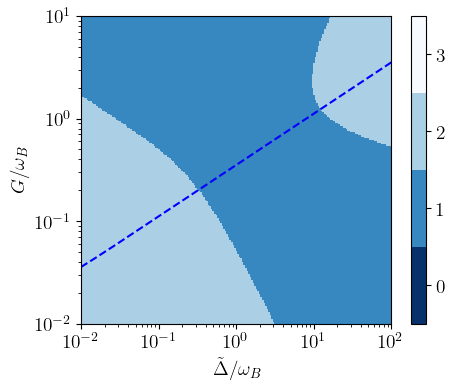

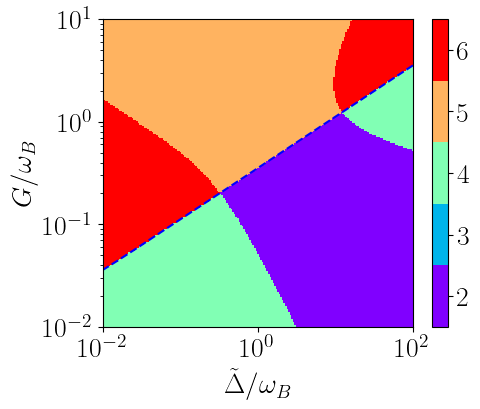

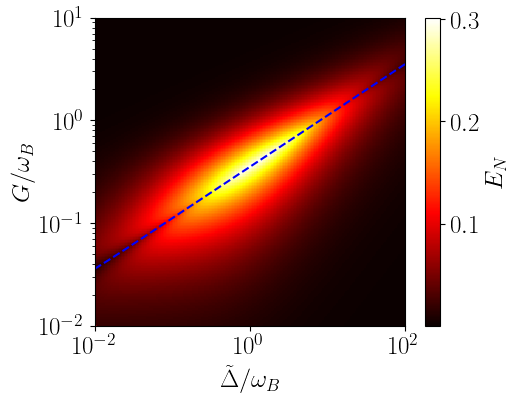

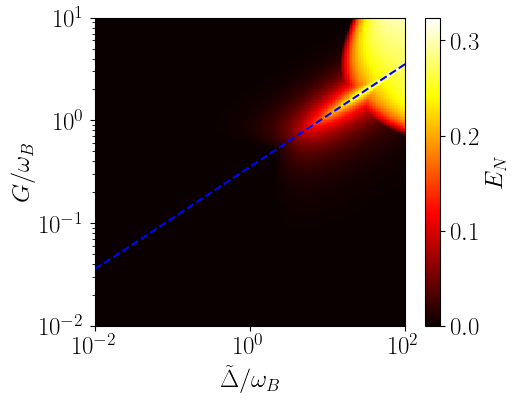

In [251]:
G23_vec=np.sqrt( 2*(Delta_t_vec + np.sqrt(Delta_t_vec**2 + kpa**2))/Omega )

# Y=parameter_vec0/o1
Y=(-g1)*G_vec/o1#G vector
X=-Delta_t_vec/o1#delta vector
Z=phaser;Z1=discriminant

plt.figure(figsize=(5, 4))
plt.rc('font',**{'family':'serif','sans-serif':['Computer Modern Sans serif'],'size':14})
plt.rc('text', usetex=True)
axes = plt.axes()
# axes.plot(Xd,5*np.ones(len(Xd)),'--',color='red')
# plt.axvline(x=0.2, color="green", linestyle="--")
X,Y = np.meshgrid(X,Y)
cmap = plt.colormaps['Blues_r']
# cmap = plt.colormaps['rainbow']
colorx = cmap(np.linspace(0, 1, 4))
discrete_cmap = colors.ListedColormap(colorx)
im = axes.pcolormesh(X,Y,Z, cmap=discrete_cmap, shading='nearest',vmin=0,vmax=3)#,norm=colors.LogNorm()#Blues_r
#fig.colorbar(im, ax=axes, ticks=np.arange(10000)).set_label(r'$\frac{\zeta_{opt}(r=0,\theta=0)}{\zeta_{opt}(r,\theta)}$', fontsize=20)
cbar=plt.colorbar(im, ax=axes, ticks=[3/4 - 3/8,6/4 - 3/8,9/4 - 3/8,3 - 3/8])#.set_label(r'$N_{\rm stable}$')#.set_label(r'Phases', fontsize=20)
cbar.ax.set_yticklabels(['0', '1', '2','3'])
# plt.colorbar(im, ax=axes).set_label(r'$N_{\rm stable}$')
axes.set_xlabel(r'$\tilde{\Delta}/\omega_B$')
axes.set_ylabel(r'$G/ \omega_B$')
axes.set_facecolor("black")
#plt.xticks(np.arange(0, 1, step=0.2))
# plt.yscale('log')
# axes.plot(parameter_vec1/o1,hbar*oa*(y_vec1**2)/kpa,'--',color='red')
# axes.plot(parameter_vec1/o1,hbar*oa*(y_vec2**2)/kpa,'--',color='brown')
# axes.plot(parameter_vec1/o1,y_vec1/o1,'--',color='red')
# axes.plot(parameter_vec1/o1,y_vec2/o1,'--',color='brown')
# axes.scatter(np.sqrt(3)*kpa/o1,(np.sqrt((8*kpa**3)/(3*np.sqrt(3)*Omega))**2)*hbar*oa/kpa,marker='*',color='orange',s=50)#,label='Critical Point')
axes.plot(-Delta_t_vec/o1,(-g1)*G23_vec/o1,'--',color='red')
axes.plot(-Delta_t_vec/o1,(-g1)*G12_vec/o1,'--',color='blue')
# axes.scatter(Delta_c,G_c,marker='*',color='orange',s=50)#,label='Critical Point')
plt.ylim((-g1)*G_vec[0]/o1,(-g1)*G_vec[-1]/o1)
plt.xlim(-Delta_t_vec[-1]/o1,-Delta_t_vec[0]/o1)
# plt.legend(frameon=False, fontsize=12, labelcolor='white')
# plt.ylim(parameter_vec0[0]/o1,parameter_vec0[-1]/o1)
# plt.ylim((parameter_vec0[0]**2)*hbar*oa/kpa,(parameter_vec0[-1]**2)*hbar*oa/kpa)
# plt.tight_layout()
# plt.savefig("Phases_old.png", dpi=400)
plt.xscale('log')
plt.yscale('log')
plt.show()

# np.savetxt("phases_o2_by_o1=%.1f.txt" %(o2/o1), Z)

Y=(-g1)*G_vec/o1#G vector
X=-Delta_t_vec/o1#delta vector
Z=phaser1

cmap = plt.colormaps['rainbow']
colorx = cmap(np.linspace(0, 1, 5))
discrete_cmap = colors.ListedColormap(colorx)
plt.figure(figsize=(5, 4))
plt.rc('font',**{'family':'serif','sans-serif':['Computer Modern Sans serif'],'size':20})
plt.rc('text', usetex=True)
axes = plt.axes()
# axes.plot(Xd,5*np.ones(len(Xd)),'--',color='red')
# plt.axvline(x=0.2, color="green", linestyle="--")
X,Y = np.meshgrid(X,Y)
im = axes.pcolormesh(X,Y,Z, cmap=discrete_cmap, shading='nearest')#,norm=colors.LogNorm()#Blues_r
#fig.colorbar(im, ax=axes, ticks=np.arange(10000)).set_label(r'$\frac{\zeta_{opt}(r=0,\theta=0)}{\zeta_{opt}(r,\theta)}$', fontsize=20)
cbar=plt.colorbar(im, ax=axes, ticks=[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5])#.set_label(r'Phases', fontsize=20)
cbar.ax.set_yticklabels(['1', '2', '3', '4', '5', '6', '7', '8'])
axes.plot(-Delta_t_vec/o1,(-g1)*G23_vec/o1,'--',color='red')
axes.plot(-Delta_t_vec/o1,(-g1)*G12_vec/o1,'--',color='blue')
# axes.scatter(Delta_c,G_c,marker='*',color='orange',s=50)
axes.set_xlabel(r'$\tilde{\Delta}/\omega_B$')
axes.set_ylabel(r'$G/ \omega_B$')
axes.set_facecolor("black")
plt.ylim((-g1)*G_vec[0]/o1,(-g1)*G_vec[-1]/o1)
plt.xlim(-Delta_t_vec[-1]/o1,-Delta_t_vec[0]/o1)
#plt.xticks(np.arange(0, 1, step=0.2))
# plt.yscale('log')
plt.xscale('log')
plt.yscale('log')
plt.show()
# np.savetxt("DPT_3mode_Results/All_phases_o2_by_o1_Z=%.1f.txt" %(o2/o1), Z)
# np.savetxt("DPT_3mode_Results/All_phases_o2_by_o1_line=%.1f.txt" %(o2/o1), np.c_[Delta_t_vec/o1,G12_vec/o1])

Y=(-g1)*G_vec/o1#G vector
X=-Delta_t_vec/o1#delta vector
Z=Entanglement_phDw_max#*root_stability[2,:,:]

plt.figure(figsize=(5, 4))
plt.rc('font',**{'family':'serif','sans-serif':['Computer Modern Sans serif'],'size':18})
plt.rc('text', usetex=True)
axes = plt.axes()
# axes.plot(Xd,5*np.ones(len(Xd)),'--',color='red')
# plt.axvline(x=0.2, color="green", linestyle="--")
X,Y = np.meshgrid(X,Y)
im = axes.pcolormesh(X,Y,Z, cmap='hot', shading='nearest')#,vmin=0,vmax=0.3)#,vmin=0,vmax=1/3)
#fig.colorbar(im, ax=axes, ticks=np.arange(10000)).set_label(r'$\frac{\zeta_{opt}(r=0,\theta=0)}{\zeta_{opt}(r,\theta)}$', fontsize=20)
plt.colorbar(im, ax=axes).set_label(r'$E_N$', fontsize=18)
axes.plot(-Delta_t_vec/o1,(-g1)*G23_vec/o1,'--',color='red')
axes.plot(-Delta_t_vec/o1,(-g1)*G12_vec/o1,'--',color='blue')
# axes.scatter(Delta_c,G_c,marker='*',color='orange',s=50)
# plt.axvline(x=-(o1+o2)/(2*o1),linestyle='dashed',color='black')
# plt.axvline(x=-(-o1+o2)/(2*o1),linestyle='dashed',color='black')
axes.set_xlabel(r'$\tilde{\Delta}/\omega_B$')
axes.set_ylabel(r'$G/ \omega_B$')
axes.set_facecolor("black")
plt.ylim((-g1)*G_vec[0]/o1,(-g1)*G_vec[-1]/o1)
plt.xlim(-Delta_t_vec[-1]/o1,-Delta_t_vec[0]/o1)
plt.xscale('log')
plt.yscale('log')
# plt.tight_layout()
# plt.savefig("entangle_param.png", dpi=400)
plt.show()

Y=(-g1)*G_vec/o1#G vector
X=-Delta_t_vec/o1#delta vector
Z=Entanglement_DwDw_max#*root_stability[2,:,:]

plt.figure(figsize=(5, 4))
plt.rc('font',**{'family':'serif','sans-serif':['Computer Modern Sans serif'],'size':18})
plt.rc('text', usetex=True)
axes = plt.axes()
# axes.plot(Xd,5*np.ones(len(Xd)),'--',color='red')
# plt.axvline(x=0.2, color="green", linestyle="--")
X,Y = np.meshgrid(X,Y)
im = axes.pcolormesh(X,Y,Z, cmap='hot', shading='nearest')#,vmin=0,vmax=0.3)#,vmin=0,vmax=1/3)
#fig.colorbar(im, ax=axes, ticks=np.arange(10000)).set_label(r'$\frac{\zeta_{opt}(r=0,\theta=0)}{\zeta_{opt}(r,\theta)}$', fontsize=20)
plt.colorbar(im, ax=axes).set_label(r'$E_N$', fontsize=18)
axes.plot(-Delta_t_vec/o1,(-g1)*G23_vec/o1,'--',color='red')
axes.plot(-Delta_t_vec/o1,(-g1)*G12_vec/o1,'--',color='blue')
# axes.scatter(Delta_c,G_c,marker='*',color='orange',s=50)
# plt.axvline(x=-(o1+o2)/(2*o1),linestyle='dashed',color='black')
# plt.axvline(x=-(-o1+o2)/(2*o1),linestyle='dashed',color='black')
axes.set_xlabel(r'$\tilde{\Delta}/\omega_B$')
axes.set_ylabel(r'$G/ \omega_B$')
axes.set_facecolor("black")
plt.ylim((-g1)*G_vec[0]/o1,(-g1)*G_vec[-1]/o1)
plt.xlim(-Delta_t_vec[-1]/o1,-Delta_t_vec[0]/o1)
plt.xscale('log')
plt.yscale('log')
# plt.tight_layout()
# plt.savefig("entangle_param.png", dpi=400)
plt.show()

## Full Optical Output Spectral Function Calculation:

In [4]:
#importing necessary libraries:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib.colors as colors
###########################################################################################################################

#defining all functions:
def root_evaluator(G,Delta_t,Omega):
    ns_1=G*G
    root_insider=G**4 - (((4*kpa*kpa)/(Omega*Omega))) - 4*G*G*Delta_t/Omega 
    if(root_insider<0):
        ns_2=ns_1
        ns_3=ns_1
    else:
        ns_2=0.5*G*G - Delta_t/Omega + 0.5*np.real(np.sqrt(root_insider +0j))
        ns_3=0.5*G*G - Delta_t/Omega - 0.5*np.real(np.sqrt(root_insider +0j))
    return ns_1,ns_2,ns_3

def root_adjuster(roots,discriminant):
    if discriminant<0:
        for i in range(len(roots)):
            if(np.imag(roots[i])==0):
                real_soln=roots[i]*np.ones(len(roots))
    else:
        real_soln=roots
    return real_soln

def phase_gap_evaluator(roots,discriminant,A):
    sign=0  #taking 0 stable roots initially (signifying instability region)
    gap=np.zeros(3)
    root_stability_values=np.zeros(3)
    phaser_val=0
    if discriminant>0:
        for i in range(3):
            root_stability_values[i]=(-(np.sign(np.max(np.real(np.linalg.eigvals(A[i,:,:]))))-1)/2)
            sign=sign + (-(np.sign(np.max(np.real(np.linalg.eigvals(A[i,:,:]))))-1)/2)
            gap[i]=np.min(np.abs(np.real(np.linalg.eigvals(A[i,:,:]))))
            phaser_val+=(2**i)*root_stability_values[i]
    else:
        for i in range(3):
            root_stability_values[i]=(-(np.sign(np.max(np.real(np.linalg.eigvals(A[i,:,:]))))-1)/2)
            phaser_val+=(2**i)*root_stability_values[i]
        sign=sign + (-(np.sign(np.max(np.real(np.linalg.eigvals(A[0,:,:]))))-1)/2)
        gap=np.min(np.abs(np.real(np.linalg.eigvals(A[0,:,:]))))*np.ones(3)
    return sign,gap,root_stability_values,phaser_val

def A_evaluator_2Nx2N(Delta_t,kp1,N):
    A=np.zeros((3,2*N +2,2*N +2),dtype=np.complex128)
    # x_as=x_a[sol_ind];p_as=p_a[sol_ind]
    # Delta_ts=Delta_t-Omega*G*G -2*(G1*np.real(beta1)+G2*np.real(beta2))
    Delta_ts=Delta_t-Omega*(n_a[0,iD]-n_a[:,iD])
    for i in range(1,N+1):
        A[:,2*i,2*i]=-kpb_dist[i-1]*np.ones(3)
        A[:,2*i,2*i+1]=-o_dist[i-1]*np.ones(3)
        A[:,2*i+1,2*i]=o_dist[i-1]*np.ones(3)
        A[:,2*i+1,2*i+1]=-kpb_dist[i-1]*np.ones(3)
        # A[0,2*i+1]=-np.sqrt(2)*g_dist[i-1]*x_as;A[0,2*i+1]=np.sqrt(2)*g_dist[i-1]*p_as
##        A[:,0,2*i+1]=np.sqrt(2)*g_dist[i-1]*x_a;A[:,1,2*i+1]=-np.sqrt(2)*g_dist[i-1]*p_a
##        A[:,2*i,0]=np.sqrt(2)*g_dist[i-1]*p_a;A[:,2*i,1]=np.sqrt(2)*g_dist[i-1]*x_a
        A[:,0,2*i]=np.sqrt(2)*g_dist[i-1]*p_a;A[:,1,2*i]=np.sqrt(2)*g_dist[i-1]*x_a
        A[:,2*i+1,0]=np.sqrt(2)*g_dist[i-1]*x_a;A[:,2*i+1,1]=-np.sqrt(2)*g_dist[i-1]*p_a
    A[:,0,0]=-kpa*np.ones(3);A[:,0,1]=Delta_ts;A[:,1,0]=-Delta_ts;A[:,1,1]=-kpa*np.ones(3)
    return A

def Dia_evaluator_2Nx2N(Delta_t,kp1,N):
    Dia=np.zeros(2*N+2)
    Dia[0]=np.sqrt(2*kpa);Dia[1]=np.sqrt(2*kpa)
    for i in range(1,N+1):
        Dia[2*i]=np.sqrt(2*kpb_dist[i-1])
        Dia[2*i+1]=np.sqrt(2*kpb_dist[i-1])
    Dia=np.diag(Dia)
    return Dia

def Chi_evaluator_2Nx2N(Delta_t,kp1,N):
    Chi=np.zeros((2*N +2,2*N +2),dtype=np.complex128)
    n1_i=1/np.expm1(hbar*o_dist/(kb*T))
    Nr=np.sinh(r)**2 + N0*(np.sinh(r)**2 + np.cosh(r)**2)
    Mr=np.sinh(r)*np.cosh(r)*np.exp(1j*theta)*(2*N0+1)
    Chi[0,0]=(2*Nr+1 +Mr+np.conj(Mr));Chi[1,1]=(2*Nr+1 -(Mr+np.conj(Mr)))
    Chi[0,1]=1j*(1 +np.conj(Mr)-Mr);Chi[1,0]=1j*(-1 +np.conj(Mr)-Mr)
    for i in range(1,N+1):
        Chi[2*i,2*i]=(2*n1_i[i-1] + 1);Chi[2*i,2*i+1]=1j
        Chi[2*i+1,2*i]=-1j;Chi[2*i+1,2*i+1]=(2*n1_i[i-1] + 1)
    return 0.5*Chi

def spectrum_evaluator(o,Chi,A,D0):
    M=-(Id + D0@np.linalg.inv(A+1j*o*Id)@D0)
    M_neg=-(Id + D0@np.linalg.inv(A-1j*o*Id)@D0)
    S=M@Chi@(M_neg.T)
    return S[0,0]+S[1,1]#+S[0,1]+S[1,0]

def root_adjuster(roots,discriminant):
    if discriminant<0:
        for i in range(len(roots)):
            if(np.imag(roots[i])==0):
                real_soln=roots[i]*np.ones(len(roots))
    else:
        real_soln=roots
    return real_soln

def phase_gap_evaluator(roots,discriminant,A):
    sign=0  #taking 0 stable roots initially (signifying instability region)
    gap=np.zeros(3)
    root_stability_values=np.zeros(3)
    phaser_val=0
    if discriminant>0:
        for i in range(3):
            root_stability_values[i]=(-(np.sign(np.max(np.real(np.linalg.eigvals(A[i,:,:]))))-1)/2)
            sign=sign + (-(np.sign(np.max(np.real(np.linalg.eigvals(A[i,:,:]))))-1)/2)
            gap[i]=np.min(np.abs(np.real(np.linalg.eigvals(A[i,:,:]))))
            phaser_val+=(2**i)*root_stability_values[i]
    else:
        for i in range(3):
            root_stability_values[i]=(-(np.sign(np.max(np.real(np.linalg.eigvals(A[i,:,:]))))-1)/2)
            phaser_val+=(2**i)*root_stability_values[i]
        sign=sign + (-(np.sign(np.max(np.real(np.linalg.eigvals(A[0,:,:]))))-1)/2)
        gap=np.min(np.abs(np.real(np.linalg.eigvals(A[0,:,:]))))*np.ones(3)
    return sign,gap,root_stability_values,phaser_val

def logarithmic_negativity(V):
    """
    Calculates the logarithmic negativity given a symmetrized covariance
    matrix, see :func:`qutip.continous_variables.covariance_matrix`. Note that
    the two-mode field state that is described by `V` must be Gaussian for this
    function to applicable.

    Parameters
    ----------

    V : *2d array*
        The covariance matrix.

    Returns
    -------

    N : float 
        The logarithmic negativity for the two-mode Gaussian state
        that is described by the the Wigner covariance matrix V.

    """

    A = V[0:2, 0:2]
    B = V[2:4, 2:4]
    C = V[0:2, 2:4]

    sigma = np.linalg.det(A) + np.linalg.det(B) - 2 * np.linalg.det(C)
    nu_ = sigma / 2 - np.sqrt(sigma ** 2 - 4 * np.linalg.det(V)) / 2
    if nu_ < 0.0:
        return 0.0
    nu = np.sqrt(nu_)
    lognu = -np.log(2 * nu)
    # print(nu)
    logneg = max(0, lognu)

    return logneg

def entanglement_finder(A,D,n1,n2):
    LN=np.zeros(3);squeezing=np.zeros(3)
    for i in range(3):
        V=linalg.solve_continuous_lyapunov(A[i,:,:],-D)
        V_block=np.zeros((4,4),dtype=np.complex128)#np.array([[V[2*n1,2*n1],V[2*n1,2*n2]],[V[2*n2,2*n1],V[2*n2,2*n2]]])
        V_block[0:2,0:2]=V[2*n1:2*n1+2,2*n1:2*n1+2];V_block[2:4,2:4]=V[2*n2:2*n2+2,2*n2:2*n2+2]#V11;V22
        V_block[0:2,2:4]=np.array([[V[2*n1,2*n2],V[2*n1,2*n2+1]],[V[2*n1+1,2*n2],V[2*n1+1,2*n2+1]]])#V12
        V_block[2:4,0:2]=V_block[0:2,2:4].T
        LN[i]=np.real(logarithmic_negativity(V_block))#DW-DW
        squeezing[i]=np.real(np.min(np.linalg.eigvals(V_block)))#DW-DW
    return LN,squeezing
###########################################################################################################################
#defining fundamental constants
hbar=1.0545718*1e-34
kb=1.38064852*1e-23

#defining system parameters and vectors:
N=2 #number of pinned DW/CSL modes
Nbins=201#number of bins for parameter variation
N_eff=1#0000
# sol_ind=0#which root to plot

kp1=2*np.pi*1e6;kp2=2*np.pi*1e6;kpa=2*np.pi*2e6#2*np.pi*1e6
g1=-2*np.pi*1e6;g2=-2*np.pi*1e6;G1=g1*np.sqrt(N_eff);G2=g2*np.sqrt(N_eff)
T=2e-3;o1=2*np.pi*1e9;o2=2*np.pi*10e9;oa=2*np.pi*1e12#Delta_a + 3.0*o1#0.000455
#xi=12e11;Pin=(hbar*oa*(xi)**2)/kpa
# Pin=5e-6;xi=np.sqrt((Pin*kpa)/(hbar*oa))
do2=0.00001*o1
Delta=-o1#+do2
r=0;theta=np.pi/4;phi=np.pi/2;N0=0#1/np.expm1(hbar*oa/(kb*T))

o_dist=np.array([o1,o2])#np.ones(N)*o1###np.array([o1,o2])
g_dist=np.ones(N)*G1#np.array([G1,G2])#np.ones(N)*G1
kpb_dist=np.ones(N)*kp1#np.array([kp1,kp2])#np.ones(N)*kp1
Omega=2*np.sum(o_dist*g_dist*g_dist/(o_dist**2 + kpb_dist**2))#2*( o1*G1*G1/(o1**2 + kp1**2) + o2*G2*G2/(o2**2 + kp2**2))
parameter_vec=-np.logspace(2,-2,401)*o1
Delta_t_vec=parameter_vec
# o_vec=np.logspace(-1,np.log10(100),201)*o1
o_vec=np.linspace(0,20,201)*o1
G12_vec=np.sqrt( -(kpa**2 + Delta_t_vec**2)/(2*Omega*Delta_t_vec))+(o1*1e-9)/(-g1)
xi_vec=np.sqrt((Delta_t_vec**2 + kpa**2)*G12_vec*G12_vec)
eig_vals=np.zeros((2*(N+1),len(parameter_vec)),dtype=np.complex128)
ep_check=np.zeros(len(parameter_vec))
S_phi=np.zeros((len(parameter_vec),len(o_vec)))
Log_Neg=np.zeros(len(parameter_vec),dtype=np.complex128)
Id=np.identity(2*N+2);S=np.ones((2*N+2,2*N+2),dtype=np.complex128)

#defining diffusion matrix
D0=2*kpa*np.sinh(r)**2 + kpa*(2*N0*(np.sinh(r)**2 + np.cosh(r)**2) + 1) + 2.*kpa*np.sinh(r)*np.cosh(r)*(1+2*N0)
D1=2*kpa*np.sinh(r)**2 + kpa*(2*N0*(np.sinh(r)**2 + np.cosh(r)**2) + 1) - 2.*kpa*np.sinh(r)*np.cosh(r)*(1+2*N0)
D=np.zeros(2*N+2);D[0]=D0;D[1]=D1;ni_th=1/np.expm1(hbar*o_dist/(kb*T))
for i in range(1,N+1):
    D[2*i]=kpb_dist[i-1]*(2.0*ni_th[i-1]+1.0);D[2*i+1]=kpb_dist[i-1]*(2.0*ni_th[i-1]+1.0)
D=np.diag(D)

#defining transformation from Drift Matrix to Non-Hermitian Hamiltonian:
U=np.zeros((2*N+2,2*N+2),dtype=np.complex128)
for i in range(N+1):
    U[2*i,2*i]=1;U[2*i,2*i+1]=1
    U[2*i+1,2*i]=-1j;U[2*i+1,2*i+1]=1j
U=U/np.sqrt(2)

phaser=np.zeros(len(parameter_vec))  #to study phase transitions (captures number of stable roots)
Delta_d=np.zeros((3,len(parameter_vec)))  #dissipative gap
Delta_vec=np.zeros(len(parameter_vec))
discriminant=np.zeros(len(parameter_vec))  #to study number of roots
n_a=np.zeros((3,len(parameter_vec)),dtype=np.complex128)  #mean photon number
alpha_a=np.zeros((3,len(parameter_vec)),dtype=np.complex128)  #mean photon number
root_stability=np.zeros((3,len(parameter_vec)))  #mean photon number
phaser1=np.zeros(len(parameter_vec))
eigvals=np.zeros((3,2*N+2,len(parameter_vec)),dtype=np.complex128)
Spectra=np.zeros(( 3,len(o_vec),len(parameter_vec))) #stores spectrum
Entanglement_phDw=np.zeros((3,len(parameter_vec))) #stores entanglement
Entanglement_phDw1=np.zeros((3,len(parameter_vec))) #stores entanglement
Entanglement_DwDw=np.zeros((3,len(parameter_vec))) #stores entanglement
Entanglement_max_phDw=np.zeros(len(parameter_vec)) #stores entanglement
Entanglement_max_phDw1=np.zeros(len(parameter_vec)) #stores entanglement
Entanglement_max_DwDw=np.zeros(len(parameter_vec)) #stores entanglement
Squeezing_phDw=np.zeros((3,len(parameter_vec))) #stores Squeezing
Squeezing_phDw1=np.zeros((3,len(parameter_vec))) #stores Squeezing
Squeezing_DwDw=np.zeros((3,len(parameter_vec))) #stores Squeezing
Squeezing_min_phDw=np.zeros(len(parameter_vec)) #stores entanglement
Squeezing_min_phDw1=np.zeros(len(parameter_vec)) #stores entanglement
Squeezing_min_DwDw=np.zeros(len(parameter_vec)) #stores entanglement
H=np.zeros((3,2*N+2,2*N+2),dtype=np.complex128)

for iD,Delta_t in enumerate(parameter_vec):
    G=np.sqrt( -(kpa**2 + Delta_t**2)/(2*Omega*Delta_t))+(o1*1e-9)/(-g1)
    xi=np.sqrt((Delta_t**2 + kpa**2)*G*G)
    # Omega=2*np.sum(o_dist*g_dist*g_dist/(o_dist**2 + kpb_dist**2))
    Delta=Delta_t - Omega*G*G#*(g1*g1)
    a=1;b=2*Delta/Omega;c=(Delta**2 + kpa**2)/(Omega**2);d=-(xi/Omega)**2
    p=[a,b,c,d];discriminant[iD]=np.sign(( 4*(b**2 - 3*a*c)**3 - (2*b**3 - 9*a*b*c + 27*a*a*d)**2 )/(27*a*a))
    n_a[:,iD]=np.array(root_evaluator(G,Delta_t,Omega));alpha=1j*xi/(Delta_t + Omega*(n_a[:,iD]-n_a[0,iD]) + 1j*kpa);phi_a=np.angle(alpha);alpha_a[:,iD]=alpha
    Delta_vec[iD]=Delta_t-Omega*np.real(n_a[0,iD])
    x_a=np.sqrt(2)*np.real(alpha);p_a=np.sqrt(2)*np.imag(alpha)
    beta1=-1j*G1*n_a[:,iD]/(1j*o1 + kp1);beta2=-1j*G2*n_a[:,iD]/(1j*o2 + kp2)
    # Delta_t=Delta + np.real( G1*(beta1+np.conj(beta1))+ G2*(beta2+np.conj(beta2)))
    # kpb_dist=np.array()#np.ones(N)*kp1
    A=A_evaluator_2Nx2N(Delta_t,kp1,N)
    Dia=Dia_evaluator_2Nx2N(Delta_t,kp1,N)
    Chi=Chi_evaluator_2Nx2N(Delta_t,kp1,N)
    sign,gap,root_stability_values,phaser_val=phase_gap_evaluator(n_a[:,iD],discriminant[iD],A)
    Entanglement_DwDw[:,iD],Squeezing_DwDw[:,iD]=entanglement_finder(A,D,1,2)#*root_stability_values
    Entanglement_DwDw[:,iD]=Entanglement_DwDw[:,iD]*root_stability_values;Entanglement_max_DwDw[iD]=np.max(Entanglement_DwDw[:,iD])
    Entanglement_phDw[:,iD],Squeezing_phDw[:,iD]=entanglement_finder(A,D,0,1)#*root_stability_values
    Entanglement_phDw[:,iD]=Entanglement_phDw[:,iD]*root_stability_values;Entanglement_max_phDw[iD]=np.max(Entanglement_phDw[:,iD])
    Entanglement_phDw1[:,iD],Squeezing_phDw1[:,iD]=entanglement_finder(A,D,0,2)#*root_stability_values
    Entanglement_phDw1[:,iD]=Entanglement_phDw1[:,iD]*root_stability_values;Entanglement_max_phDw1[iD]=np.max(Entanglement_phDw1[:,iD])

    Squeezing_DwDw[:,iD]=Squeezing_DwDw[:,iD]*root_stability_values;Squeezing_phDw[:,iD]=Squeezing_phDw[:,iD]*root_stability_values
    Squeezing_min_phDw[iD]=np.min(Squeezing_phDw[:,iD]+ np.ones(3)*(10-10*root_stability_values));Squeezing_min_DwDw[iD]=np.min(Squeezing_DwDw[:,iD] + np.ones(3)*(10-10*root_stability_values))
    Squeezing_phDw1[:,iD]=Squeezing_phDw1[:,iD]*root_stability_values;Squeezing_min_phDw1[iD]=np.min(Squeezing_phDw1[:,iD]+ np.ones(3)*(10-10*root_stability_values))

    # print(root_stability_values)
    for i in range(3):
        H[i,:,:]=1j*np.linalg.inv(U)@A[i,:,:]@U
        eigvals[i,:,iD]=np.linalg.eigvals(H[i,:,:])
        for io,o in enumerate(o_vec):
            Spectra[i,io,iD]=np.real(spectrum_evaluator(o,Chi,A[i,:,:],Dia))

print("calculations completed!")

# np.savetxt("Ent_o2_by_o1_line=%.1f.txt" %(o2/o1), np.c_[-Delta_t_vec/o1,Entanglement_max_phDw,Entanglement_max_phDw1,Entanglement_max_DwDw,Squeezing_min_phDw,Squeezing_min_phDw1,Squeezing_min_DwDw])

calculations completed!


### Plotting Results:

/tmp/ipykernel_81441/1024927478.py:29: RuntimeWarning: invalid value encountered in sqrt
  nu_m[isol,ind1]=np.sqrt((sigmaV - np.sqrt(sigmaV**2 - 4*detV[isol,:]))/2)[ind1]
/tmp/ipykernel_81441/1024927478.py:32: RuntimeWarning: divide by zero encountered in log
  if(-np.log(2 * nu_m[isol,ind1])>0):
/tmp/ipykernel_81441/1024927478.py:33: RuntimeWarning: divide by zero encountered in log
  Log_neg_calc[isol,ind1]=-np.log(2 * nu_m[isol,ind1])


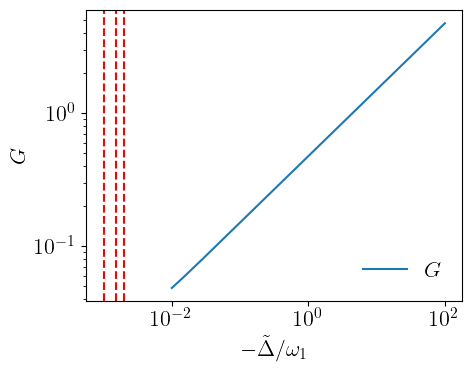

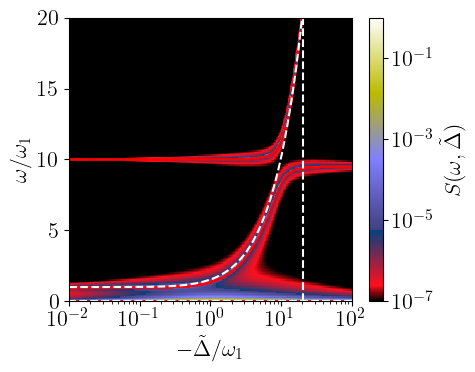

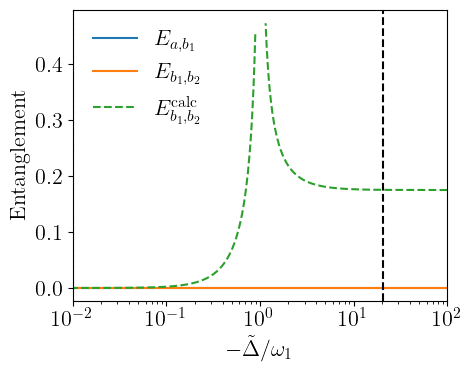

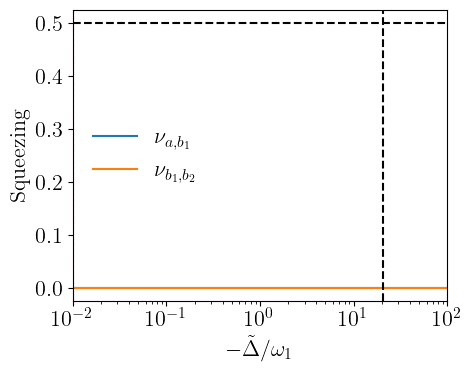

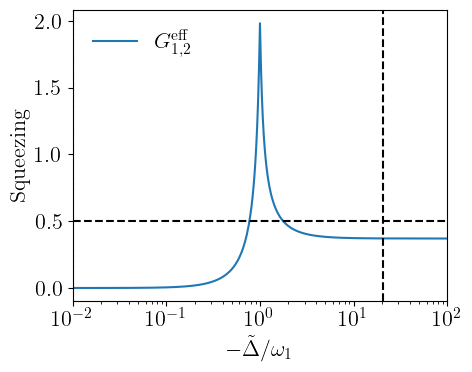

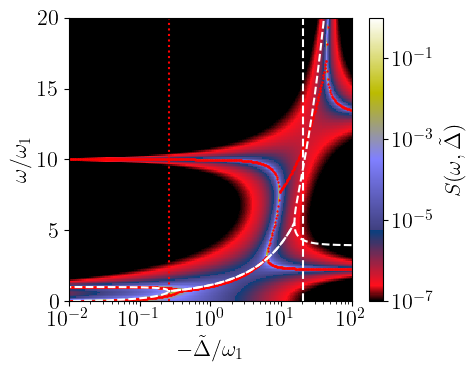

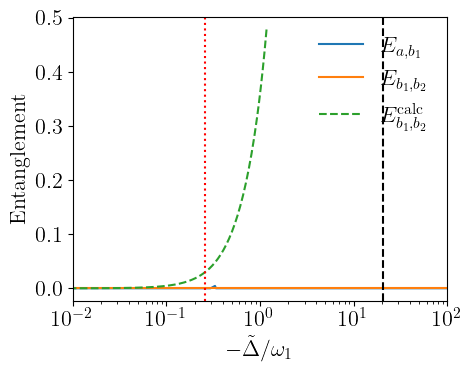

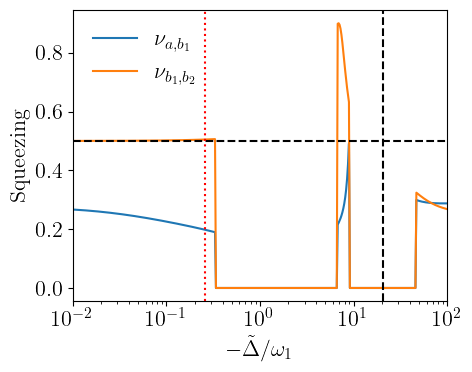

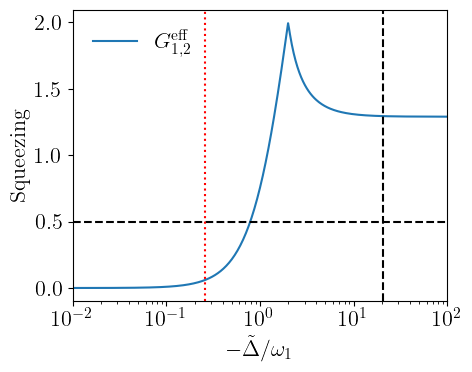

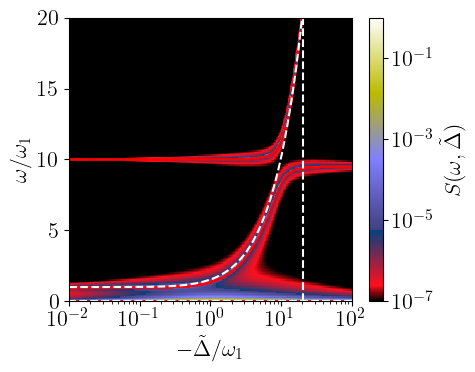

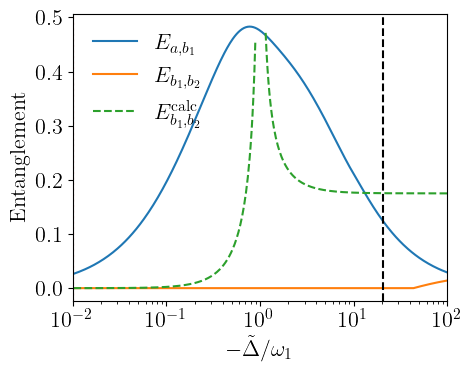

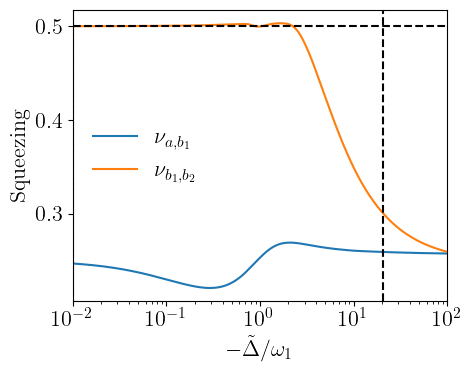

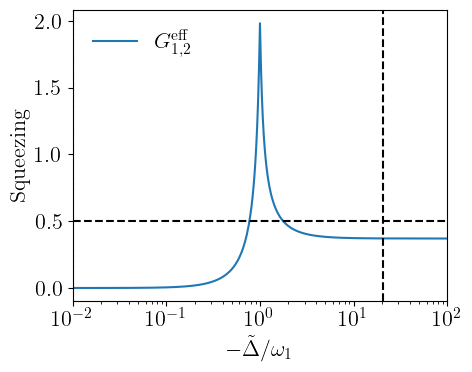

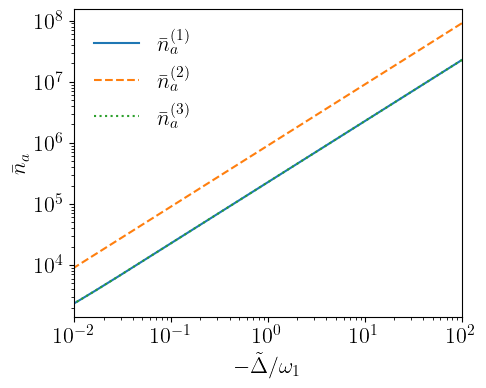

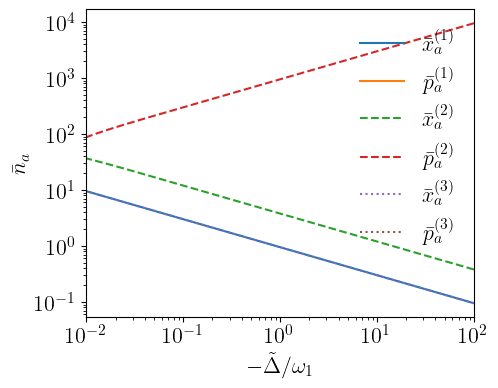

In [5]:
def collective_eigvals(N,isol):
    Delta_x=Delta_t_vec-Omega*(-n_a[isol]+G12_vec**2)
    eig1=-1j*kpa + np.sqrt((Delta_x**2 + o1**2)/2 + np.sqrt( ((Delta_x**2 - o1**2)/2)**2 - 8*(G1**2)*n_a[isol]*Delta_x*o1  ))
    eig2=-1j*kpa - np.sqrt((Delta_x**2 + o1**2)/2 + np.sqrt( ((Delta_x**2 - o1**2)/2)**2 - 8*(G1**2)*n_a[isol]*Delta_x*o1  ))
    eig3=-1j*kpa + np.sqrt((Delta_x**2 + o1**2)/2 - np.sqrt( ((Delta_x**2 - o1**2)/2)**2 - 8*(G1**2)*n_a[isol]*Delta_x*o1  ))
    eig4=-1j*kpa - np.sqrt((Delta_x**2 + o1**2)/2 - np.sqrt( ((Delta_x**2 - o1**2)/2)**2 - 8*(G1**2)*n_a[isol]*Delta_x*o1  ))
    return eig1,eig2,eig3,eig4

# Z=S_vec[1,:,:]
# Zs=np.abs(freq_sense)
X=-parameter_vec/o1
# X=Delta_t_vec/o1
Y=o_vec/o1

###################################3
#Adiabatic Elimination Calculation
G12_eff_vec=np.zeros((3,len(Delta_t_vec)))
detV=np.zeros((3,len(Delta_t_vec)))
nu_m=np.zeros((3,len(Delta_t_vec)))
Log_neg_calc=np.zeros((3,len(Delta_t_vec)))
for isol in range(3):
    Delta_x_vec=Delta_t_vec  - Omega*(G12_vec**2 - n_a[isol,:])
    G12_eff_vec[isol,:]=np.abs(2*Delta_x_vec*n_a[isol,:]*G1*G2/(Delta_x_vec**2 + (kpa-kp1 + 1j*o1)**2))
    o_eff=o1+G12_eff_vec[isol,:]/2
    detV[isol,:]=((1+2*ni_th[0])**4)*(G12_eff_vec[isol,:]**4 + 8*(G12_eff_vec[isol,:]**2)*(kp1**2 - o_eff**2) + 16*(kp1**2 + o_eff**2)**2)/(256*(-(G12_eff_vec[isol,:]**2)*o_eff**2 + (kp1**2 + o_eff**2)**2))
    sigmaV=((1+2*ni_th[0])**2)*( (G12_eff_vec[isol,:]**2)*(3*kp1**2 - o_eff**2) + 4*(kp1**2 + o_eff**2)**2 )/(8*(-(G12_eff_vec[isol,:]**2)*o_eff**2 + (kp1**2 + o_eff**2)**2))
    for ind1 in range(len(Delta_x_vec)):
        if((sigmaV - np.sqrt(sigmaV**2 - 4*detV[isol,:]))[ind1]/2>0):
            nu_m[isol,ind1]=np.sqrt((sigmaV - np.sqrt(sigmaV**2 - 4*detV[isol,:]))/2)[ind1]
        else:
            nu_m[isol,ind1]=0
        if(-np.log(2 * nu_m[isol,ind1])>0):
            Log_neg_calc[isol,ind1]=-np.log(2 * nu_m[isol,ind1])
        else:
            Log_neg_calc[isol,ind1]=0

plt.figure(figsize=(5, 4))
plt.rc('font',**{'family':'serif','sans-serif':['Computer Modern Sans serif'],'size':16})
plt.rc('text', usetex=True)
axes = plt.axes()
# axes.plot(Xd,5*np.ones(len(Xd)),'--',color='red')
# plt.axvline(x=0.2, color="green", linestyle="--")
plt.plot(X,G12_vec*(-g1)/o1,label=r'$G$')
plt.axvline(x=kp1/o1,linestyle='dashed',color='red')
plt.axvline(x=(kpa+kp1)/(2*o1),linestyle='dashed',color='red')
plt.axvline(x=kpa/o1,linestyle='dashed',color='red')
axes.set_xlabel(r'$-\tilde{\Delta}/\omega_1$')
axes.set_ylabel(r'$G$')
# plt.axvline(x=1,linestyle='dashed',color='white')
plt.xscale('log')
plt.yscale('log')
plt.legend(frameon=False)#, fontsize=12)#, labelcolor='white')
# plt.ylim(parameter_vec0[0]/o1,parameter_vec0[-1]/o1)
# plt.ylim(o_vec[0]/o1,o_vec[-1]/o1)
# plt.xticks(np.array([0,1,2,3]))
plt.tight_layout()
# plt.savefig("Phases_old.png", dpi=400)
plt.show()

for isol in range(3):
    X=-parameter_vec/o1
    # X=Delta_t_vec/o1
    Y=o_vec/o1
    Z=Spectra[isol,:,:]-1
    # Z0=Z
    # eigvals0=eigvals
    # Z1=Z
    # eigvals1=eigvals
    # Z2=Z
    # eigvals2=eigvals
    eigenvals=collective_eigvals(N,isol)
    #calculating EP locations:
    Delta_x=Delta_t_vec + Omega*(-G12_vec**2 + n_a[isol])
    
    to_optimize=((Delta_x**2 - o1**2)/2)**2 - 8*(G1**2)*n_a[isol]*Delta_x*o1#np.abs( (((Delta_t_vec + Omega*(-G12_vec**2 + n_a[isol]))**2 - kpa**2)/2)**2 - 8*g1*g1*n_a[isol]*o1)
    to_optimize1=(Delta_x**2 + o1**2)/2 - np.sqrt(to_optimize)
    iDx=np.argmin(np.abs(to_optimize[50:70]))+50;iDx1=np.argmin(np.abs(to_optimize))
    ##################################################################################################
    plt.figure(figsize=(5, 4))
    plt.rc('font',**{'family':'serif','sans-serif':['Computer Modern Sans serif'],'size':16})
    plt.rc('text', usetex=True)
    axes = plt.axes()
    # axes.plot(Xd,5*np.ones(len(Xd)),'--',color='red')
    # plt.axvline(x=0.2, color="green", linestyle="--")
    X,Y = np.meshgrid(X,Y)
    im = axes.pcolormesh(X,Y,Z, cmap='gist_stern', shading='nearest',norm=colors.LogNorm(vmin=1e-7,vmax=1e0))#,vmin=1.0,vmax=1.1)#,norm=colors.LogNorm())#,vmin=0,vmax=10
    #fig.colorbar(im, ax=axes, ticks=np.arange(10000)).set_label(r'$\frac{\zeta_{opt}(r=0,\theta=0)}{\zeta_{opt}(r,\theta)}$', fontsize=20)
    plt.colorbar(im, ax=axes).set_label(r'$S(\omega,\tilde{\Delta})$')
    for i in range(4):
        plt.plot(-parameter_vec/o1,np.real(eigenvals[i])/o1,linestyle='dashed',color='white')
    for i in range(6):
        plt.scatter(-parameter_vec/o1,np.real(eigvals[isol,i,:])/o1,s=0.5,color='red')
        # plt.scatter(-parameter_vec/o1,np.imag(eigvals[isol,i,:])/o1,s=0.5,color='white')
        # plt.plot(-parameter_vec/o1,np.real(eigvals[i,:])/o1,linestyle='dashed',color='red')
    axes.set_xlabel(r'$-\tilde{\Delta}/\omega_1$')
    axes.set_ylabel(r'$\omega/\omega_1$')
    plt.axvline(x=-Delta_t_vec[iDx]/o1,linestyle='dashed',color='white')
    plt.axvline(x=-Delta_t_vec[iDx1]/o1,linestyle='dotted',color='red')
    # axes.plot(-Delta_t_vec/o1,0.5*np.log10(np.abs(to_optimize)/(o1*o1*o1*o1)),linestyle='dashed',color='black')
    # axes.plot(-Delta_t_vec/o1,np.log10(np.abs(to_optimize1)/(o1*o1)),linestyle='dashed',color='purple')
    # plt.axvline(x=1,linestyle='dashed',color='white')
    # plt.axvline(x=kp1/o1,linestyle='dashed',color='white')
    # plt.axvline(x=kp1/o1,linestyle='dashed',color='white')
    # plt.axvline(x=(kpa+kp1)/(2*o1),linestyle='dashed',color='white')
    # plt.axvline(x=kpa/o1,linestyle='dashed',color='white')
    axes.set_facecolor("black")
    #plt.xticks(np.arange(0, 1, step=0.2))
    plt.xscale('log')
    # plt.yscale('log')
    # plt.legend(frameon=False, fontsize=12, labelcolor='white')
    # plt.ylim(parameter_vec0[0]/o1,parameter_vec0[-1]/o1)
    plt.ylim(o_vec[0]/o1,o_vec[-1]/o1)
    plt.xlim(-parameter_vec[-1]/o1,-parameter_vec[0]/o1)
    # plt.xticks(np.array([0,1,2,3]))
    plt.tight_layout()
    # plt.savefig("Phases_old.png", dpi=400)
    plt.show()

    X=-parameter_vec/o1

    plt.figure(figsize=(5, 4))
    plt.rc('font',**{'family':'serif','sans-serif':['Computer Modern Sans serif'],'size':16})
    plt.rc('text', usetex=True)
    axes = plt.axes()
    # axes.plot(Xd,5*np.ones(len(Xd)),'--',color='red')
    # plt.axvline(x=0.2, color="green", linestyle="--")
    plt.plot(X,Entanglement_phDw[isol,:],label=r'$E_{a,b_1}$')
    plt.plot(X,Entanglement_DwDw[isol,:],label=r'$E_{b_1,b_2}$')
    plt.plot(X,Log_neg_calc[isol,:],'--',label=r'$E^{\rm calc}_{b_1,b_2}$')
    axes.set_xlabel(r'$-\tilde{\Delta}/\omega_1$')
    axes.set_ylabel(r'Entanglement')
    # plt.axvline(x=kp1/o1,linestyle='dashed',color='red')
    # plt.axvline(x=(kpa+kp1)/(2*o1),linestyle='dashed',color='red')
    # plt.axvline(x=kpa/o1,linestyle='dashed',color='red')
    # plt.axvline(x=N/np.sqrt(2),linestyle='dashed',color='red')
    # plt.axvline(x=1,linestyle='dashed',color='red')
    # plt.axhline(y=0,linestyle='dashed',color='black')
    plt.axvline(x=-Delta_t_vec[iDx]/o1,linestyle='dashed',color='black')
    plt.axvline(x=-Delta_t_vec[iDx1]/o1,linestyle='dotted',color='red')
    plt.xscale('log')
    # plt.yscale('log')
    plt.legend(frameon=False)#, fontsize=12)#, labelcolor='white')
    plt.xlim(-parameter_vec[-1]/o1,-parameter_vec[0]/o1)
    # plt.ylim(o_vec[0]/o1,o_vec[-1]/o1)
    # plt.xticks(np.array([0,1,2,3]))
    plt.tight_layout()
    # plt.savefig("Phases_old.png", dpi=400)
    plt.show()

    plt.figure(figsize=(5, 4))
    plt.rc('font',**{'family':'serif','sans-serif':['Computer Modern Sans serif'],'size':16})
    plt.rc('text', usetex=True)
    axes = plt.axes()
    # axes.plot(Xd,5*np.ones(len(Xd)),'--',color='red')
    # plt.axvline(x=0.2, color="green", linestyle="--")
    plt.plot(X,Squeezing_phDw[isol,:],label=r'$\nu_{a,b_1}$')
    plt.plot(X,Squeezing_DwDw[isol,:],label=r'$\nu_{b_1,b_2}$')
    plt.axhline(y=0.5,linestyle='dashed',color='black')
    axes.set_xlabel(r'$-\tilde{\Delta}/\omega_1$')
    axes.set_ylabel(r'Squeezing')
    # plt.axvline(x=kp1/o1,linestyle='dashed',color='red')
    # plt.axvline(x=(kpa+kp1)/(2*o1),linestyle='dashed',color='red')
    # plt.axvline(x=kpa/o1,linestyle='dashed',color='red')
    # plt.axvline(x=1,linestyle='dashed',color='red')
    # plt.axvline(x=N/np.sqrt(2),linestyle='dashed',color='red')
    plt.axvline(x=-Delta_t_vec[iDx]/o1,linestyle='dashed',color='black')
    plt.axvline(x=-Delta_t_vec[iDx1]/o1,linestyle='dotted',color='red')
    plt.xscale('log')
    plt.xlim(-parameter_vec[-1]/o1,-parameter_vec[0]/o1)
    # plt.yscale('log')
    plt.legend(frameon=False)#, fontsize=12)#, labelcolor='white')
    # plt.ylim(parameter_vec0[0]/o1,parameter_vec0[-1]/o1)
    # plt.ylim(o_vec[0]/o1,o_vec[-1]/o1)
    # plt.xticks(np.array([0,1,2,3]))
    plt.tight_layout()
    # plt.savefig("Phases_old.png", dpi=400)
    plt.show()

    plt.figure(figsize=(5, 4))
    plt.rc('font',**{'family':'serif','sans-serif':['Computer Modern Sans serif'],'size':16})
    plt.rc('text', usetex=True)
    axes = plt.axes()
    # axes.plot(Xd,5*np.ones(len(Xd)),'--',color='red')
    # plt.axvline(x=0.2, color="green", linestyle="--")
    plt.plot(X,np.abs(G12_eff_vec[isol,:])/(o1+G12_eff_vec[isol,:]/2),label=r'$G^{\rm eff}_{1,2}$')
    # plt.plot(X,Squeezing_DwDw[isol,:],label=r'$\nu_{b_1,b_2}$')
    plt.axhline(y=0.5,linestyle='dashed',color='black')
    axes.set_xlabel(r'$-\tilde{\Delta}/\omega_1$')
    axes.set_ylabel(r'Squeezing')
    # plt.axvline(x=kp1/o1,linestyle='dashed',color='red')
    # plt.axvline(x=kpa/o1,linestyle='dashed',color='red')
    # plt.axvline(x=(kpa+kp1)/(2*o1),linestyle='dashed',color='red')
    # plt.axvline(x=1,linestyle='dashed',color='red')
    plt.axvline(x=-Delta_t_vec[iDx]/o1,linestyle='dashed',color='black')
    plt.axvline(x=-Delta_t_vec[iDx1]/o1,linestyle='dotted',color='red')
    plt.xscale('log')
    plt.xlim(-parameter_vec[-1]/o1,-parameter_vec[0]/o1)
    # plt.yscale('log')
    plt.legend(frameon=False)#, fontsize=12)#, labelcolor='white')
    # plt.ylim(parameter_vec0[0]/o1,parameter_vec0[-1]/o1)
    # plt.ylim(o_vec[0]/o1,o_vec[-1]/o1)
    # plt.xticks(np.array([0,1,2,3]))
    plt.tight_layout()
    # plt.savefig("Phases_old.png", dpi=400)
    plt.show()

plt.figure(figsize=(5, 4))
plt.rc('font',**{'family':'serif','sans-serif':['Computer Modern Sans serif'],'size':16})
plt.rc('text', usetex=True)
axes = plt.axes()
# axes.plot(Xd,5*np.ones(len(Xd)),'--',color='red')
# plt.axvline(x=0.2, color="green", linestyle="--")
linestyles=['solid','dashed','dotted']
for isol in range(3):
    plt.plot(X,np.real(n_a[isol,:]),linestyle=linestyles[isol],label=r'$\bar{n}^{(%d)}_a$' %(isol+1))
    plt.axvline(x=kpa/o1,linestyle='dashed',color='black')
    plt.axvline(x=(kpa+kp1)/(2*o1),linestyle='dashed',color='black')
    plt.axvline(x=kp1/o1,linestyle='dashed',color='black')
axes.set_xlabel(r'$-\tilde{\Delta}/\omega_1$')
axes.set_ylabel(r'$\bar{n}_a$')
# plt.axvline(x=1,linestyle='dashed',color='white')
plt.xscale('log')
plt.xlim(-parameter_vec[-1]/o1,-parameter_vec[0]/o1)
plt.yscale('log')
plt.legend(frameon=False)#, fontsize=12)#, labelcolor='white')
# plt.ylim(parameter_vec0[0]/o1,parameter_vec0[-1]/o1)
# plt.ylim(o_vec[0]/o1,o_vec[-1]/o1)
# plt.xticks(np.array([0,1,2,3]))
# plt.tight_layout()
# plt.savefig("Phases_old.png", dpi=400)
plt.show()

plt.figure(figsize=(5, 4))
plt.rc('font',**{'family':'serif','sans-serif':['Computer Modern Sans serif'],'size':16})
plt.rc('text', usetex=True)
axes = plt.axes()
# axes.plot(Xd,5*np.ones(len(Xd)),'--',color='red')
# plt.axvline(x=0.2, color="green", linestyle="--")
linestyles=['solid','dashed','dotted']
for isol in range(3):
    plt.plot(X,np.real(alpha_a[isol,:]),linestyle=linestyles[isol],label=r'$\bar{x}^{(%d)}_a$' %(isol+1))
    plt.plot(X,np.imag(alpha_a[isol,:]),linestyle=linestyles[isol],label=r'$\bar{p}^{(%d)}_a$' %(isol+1))
    plt.axvline(x=kpa/o1,linestyle='dashed',color='black')
    plt.axvline(x=(kpa+kp1)/(2*o1),linestyle='dashed',color='black')
    plt.axvline(x=kp1/o1,linestyle='dashed',color='black')
axes.set_xlabel(r'$-\tilde{\Delta}/\omega_1$')
axes.set_ylabel(r'$\bar{n}_a$')
# plt.axvline(x=1,linestyle='dashed',color='white')
plt.xscale('log')
plt.xlim(-parameter_vec[-1]/o1,-parameter_vec[0]/o1)
plt.yscale('log')
plt.legend(frameon=False)#, fontsize=12)#, labelcolor='white')
# plt.ylim(parameter_vec0[0]/o1,parameter_vec0[-1]/o1)
# plt.ylim(o_vec[0]/o1,o_vec[-1]/o1)
# plt.xticks(np.array([0,1,2,3]))
# plt.tight_layout()
# plt.savefig("Phases_old.png", dpi=400)
plt.show()

# Z_k1_o1o2_1=Spectra[1,:,:]-1
# eigvals_k1_o1o2_1=eigvals[1,:,:]
# Z_k2_o1o2_1=Spectra[2,:,:]-1
# eigvals_k2_o1o2_1=eigvals[2,:,:]
# np.savetxt("spectra_k1_o1o2_1.txt",Z_k1_o1o2_1)
# np.savetxt("spectra_k2_o1o2_1.txt",Z_k2_o1o2_1)

Z_k1_o1o2_10=Spectra[1,:,:]-1
eigvals_k1_o1o2_10=eigvals[1,:,:]
Z_k2_o1o2_10=Spectra[2,:,:]-1
eigvals_k2_o1o2_10=eigvals[2,:,:]
# np.savetxt("spectra_k1_o1o2_10.txt",Z_k1_o1o2_10)
# np.savetxt("spectra_k2_o1o2_10.txt",Z_k2_o1o2_10)

# eigvals0=eigvals
# eigvals1=eigvals
# eigvals2=eigvals
# np.savetxt("spectra_o2_by_o1=1.0.txt",Z0)
# np.savetxt("spectra_o2_by_o1=1by3.txt",Z1)
# np.savetxt("spectra_o2_by_o1=1.5.txt",Z2)

[]

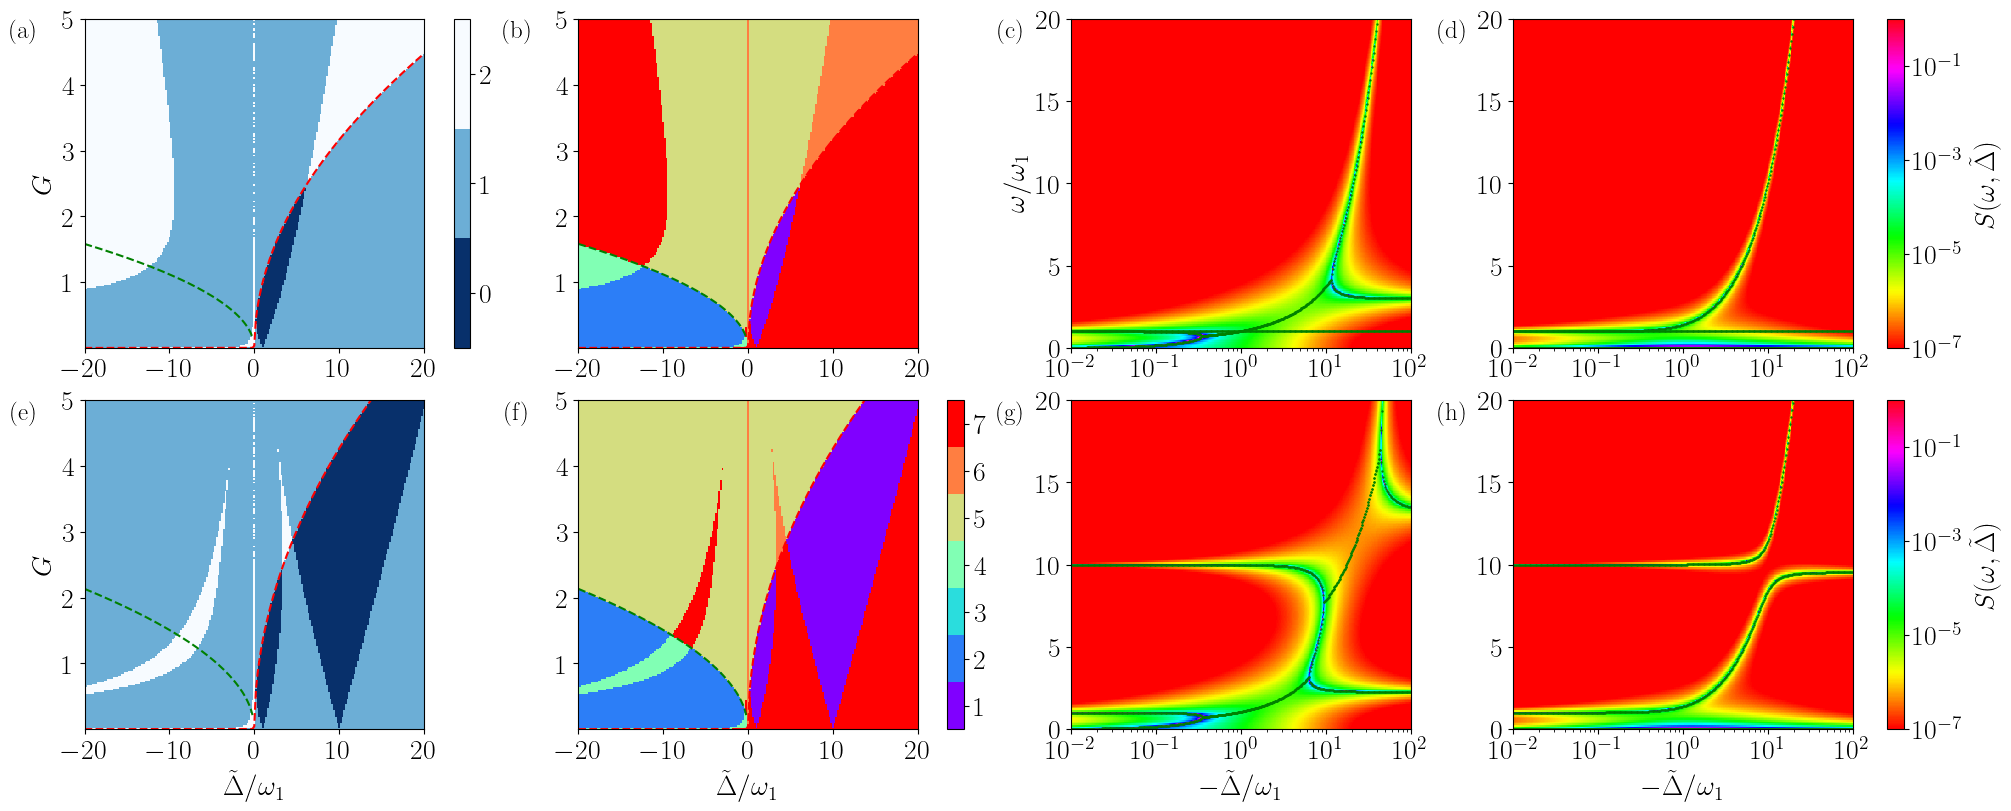

In [7]:
cmap = plt.colormaps['rainbow']
colorx = cmap(np.linspace(0, 1, 7))
discrete_cmap = colors.ListedColormap(colorx)

Zp1=np.loadtxt("All_phases_o2_by_o1_Z=1.0.txt")
Zp10=np.loadtxt("All_phases_o2_by_o1_Z=10.0.txt")
Zp0p1=np.loadtxt("All_phases_o2_by_o1_Z=0.1.txt")

Z_k1_o1o2_1=np.loadtxt("spectra_k1_o1o2_1.txt")
Z_k2_o1o2_1=np.loadtxt("spectra_k2_o1o2_1.txt")

Z_k1_o1o2_10=np.loadtxt("spectra_k1_o1o2_10.txt")
Z_k2_o1o2_10=np.loadtxt("spectra_k2_o1o2_10.txt")

Zsp1=np.loadtxt("stability_o2_by_o1=1.0.txt")
Zsp10=np.loadtxt("stability_o2_by_o1=10.0.txt")
Zsp0p1=np.loadtxt("stability_o2_by_o1=0.1.txt")

Xp=np.loadtxt("All_phases_o2_by_o1_line=1.0.txt")[:,0]
Gp1=np.loadtxt("All_phases_o2_by_o1_line=1.0.txt")[:,1]
Gp10=np.loadtxt("All_phases_o2_by_o1_line=10.0.txt")[:,1]
Gp0p1=np.loadtxt("All_phases_o2_by_o1_line=0.1.txt")[:,1]
G23p1=np.loadtxt("All_phases_o2_by_o1_line=1.0.txt")[:,2]
G23p10=np.loadtxt("All_phases_o2_by_o1_line=10.0.txt")[:,2]
G23p0p1=np.loadtxt("All_phases_o2_by_o1_line=0.1.txt")[:,2]

G_vec0=np.linspace(0.001,5,Nbins)*o1
Delta_t_vec0=np.linspace(-20,20,Nbins)*o1

cmap = plt.colormaps['rainbow']
colorx = cmap(np.linspace(0, 1, 7))
discrete_cmap = colors.ListedColormap(colorx)

cmap1 = plt.colormaps['Blues_r']
# cmap = plt.colormaps['rainbow']
colorx1 = cmap1(np.linspace(0, 1, 3))
discrete_cmap1 = colors.ListedColormap(colorx1)

cmap2='hsv'#'gist_stern'

# Y=G_vec0/o1
# X=Delta_t_vec0/o1
Y=np.linspace(0.001,5,201)
X=np.linspace(-20,20,Nbins)
X,Y = np.meshgrid(X,Y)
X1,Y1 = np.meshgrid(-Delta_t_vec/o1,o_vec/o1)
# Subplots environment for clubbing and labelling multiple figures
import matplotlib.transforms as mtransforms
ncols=4;nrows=2
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(20, 8),layout="constrained", sharex=False)#, sharey=True);,layout="constrained"
plt.rc('font',**{'family':'serif','sans-serif':['Computer Modern Sans serif'],'size':20})
plt.rc('text', usetex=True)
# add an artist, in this case a nice label in the middle...
label_list=['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)','(i)']
# axs[1].set_ylim(1e-38,1e-29)
for row in range(nrows):
    for col in range(ncols):
        trans = mtransforms.ScaledTranslation(-0.6, 0, fig.dpi_scale_trans)
        # axs[row].annotate(label_list[row], (0.5, 0.5),transform=axs[row].transAxes+trans,ha='center', va='center', fontsize=14,color='black')
        axs[row,col].text(0.0, 1.0, label_list[col+row*ncols], transform=axs[row,col].transAxes + trans,
            fontsize='18', ha='center', va='top', fontfamily='serif',
            bbox=dict(facecolor='1', edgecolor='none', pad=0.3))
# Adjust the padding between subplots
# plt.subplots_adjust(left=0.1, right=0.9, bottom=0.12, top=0.9, wspace=0.1, hspace=0.1)
# o2=0.1*o1
# Omega=2*( o1*G1*G1/(o1**2 + kp1**2) + o2*G2*G2/(o2**2 + kp2**2))
im=axs[0,0].pcolormesh(X,Y,Zsp1, cmap=discrete_cmap1, shading='nearest')#,norm=colors.LogNorm()
cbar=plt.colorbar(im, ax=axs[0,0], ticks=[2/3 - 1/3,4/3 - 1/3,2 - 1/3])#.set_label(r'Phases', fontsize=20)
cbar.ax.set_yticklabels(['0', '1', '2'])
# axs[0].pcolormesh(X,Y,Zsp0p1, cmap=discrete_cmap, shading='nearest')
# plt.colorbar(im, ax=axs[0]).set_label(r'$N_{\rm stable}$')
axs[0,0].plot(Xp,Gp1,'--',color='green')
axs[0,0].plot(Xp,G23p1,'--',color='red')

axs[0,1].pcolormesh(X,Y,Zp1, cmap=discrete_cmap, shading='nearest')#,norm=colors.LogNorm()
axs[0,1].plot(Xp,Gp1,'--',color='green')
axs[0,1].plot(Xp,G23p1,'--',color='red')

axs[0,2].pcolormesh(X1,Y1,Z_k1_o1o2_1, cmap=cmap2, shading='nearest',norm=colors.LogNorm(vmin=1e-7,vmax=1e0))
for i in range(6):
    axs[0,2].scatter(-parameter_vec/o1,np.real(eigvals_k1_o1o2_1[i,:])/o1,s=0.5,color='green')

im = axs[0,3].pcolormesh(X1,Y1,Z_k2_o1o2_1, cmap=cmap2, shading='nearest',norm=colors.LogNorm(vmin=1e-7,vmax=1e0))
plt.colorbar(im, ax=axs[0,3]).set_label(r'$S(\omega,\tilde{\Delta})$')
for i in range(6):
    axs[0,3].scatter(-parameter_vec/o1,np.real(eigvals_k2_o1o2_1[i,:])/o1,s=0.5,color='green')

axs[1,0].pcolormesh(X,Y,Zsp10, cmap=discrete_cmap1, shading='nearest')#,norm=colors.LogNorm()
axs[1,0].plot(Xp,Gp10,'--',color='green')
axs[1,0].plot(Xp,G23p10,'--',color='red')

im=axs[1,1].pcolormesh(X,Y,Zp10, cmap=discrete_cmap, shading='nearest')#,norm=colors.LogNorm()
cbar=plt.colorbar(im, ax=axs[1,1], ticks=[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5])#.set_label(r'Phases', fontsize=20)
cbar.ax.set_yticklabels(['1', '2', '3', '4', '5', '6', '7', '8'])
axs[1,1].plot(Xp,Gp10,'--',color='green')
axs[1,1].plot(Xp,G23p10,'--',color='red')

axs[1,2].pcolormesh(X1,Y1,Z_k1_o1o2_10, cmap=cmap2, shading='nearest',norm=colors.LogNorm(vmin=1e-7,vmax=1e0))
for i in range(6):
    axs[1,2].scatter(-parameter_vec/o1,np.real(eigvals_k1_o1o2_10[i,:])/o1,s=0.5,color='green')

# axs[1,3].pcolormesh(X1,Y1,Z_k2_o1o2_10, cmap='gist_stern', shading='nearest',norm=colors.LogNorm(vmin=1e-7,vmax=1e0))
im = axs[1,3].pcolormesh(X1,Y1,Z_k2_o1o2_10, cmap=cmap2, shading='nearest',norm=colors.LogNorm(vmin=1e-7,vmax=1e0))
plt.colorbar(im, ax=axs[1,3]).set_label(r'$S(\omega,\tilde{\Delta})$')
for i in range(6):
    axs[1,3].scatter(-parameter_vec/o1,np.real(eigvals_k2_o1o2_10[i,:])/o1,s=0.5,color='green')

for i in range(2):
    for j in range(2):
        axs[i,j].set_xlim(Delta_t_vec0[0]/o1,Delta_t_vec0[-1]/o1)
        axs[i,j].set_ylim(G_vec0[0]/o1,G_vec0[-1]/o1)
        axs[i,2+j].set_xlim(-parameter_vec[-1]/o1,-parameter_vec[0]/o1)
        axs[i,2+j].set_ylim(o_vec[0]/o1,o_vec[-1]/o1)
        axs[i,2+j].set_xscale("log")

# axs[1,2].set_xscale("log")
axs[1,0].set_xlabel(r'$\tilde{\Delta}/\omega_1$')
axs[1,1].set_xlabel(r'$\tilde{\Delta}/\omega_1$')
axs[1,2].set_xlabel(r'$-\tilde{\Delta}/\omega_1$')
axs[1,3].set_xlabel(r'$-\tilde{\Delta}/\omega_1$')
axs[0,0].set_ylabel(r'$G$')
axs[1,0].set_ylabel(r'$G$')
axs[0,2].set_ylabel(r'$\omega/\omega_1$')
# axs[1,2].set_ylabel(r'$\omega/\omega_1$')
# axs[1].set_facecolor("black")

# axs[2].set_yscale("log")
# axs[1].set_yscale("log")
# axs[0].set_yscale("log")
# axs[0].legend(prop={'weight': 'normal', "size": 14, 'stretch': 'normal'},frameon=False, labelcolor='white')
# axs[1].legend(prop={'weight': 'normal', "size": 14, 'stretch': 'normal'},frameon=False, labelcolor='white')
# axs[2].legend(prop={'weight': 'normal', "size": 14, 'stretch': 'normal'},frameon=False, labelcolor='white')
# plt.tight_layout()
# plt.savefig("phases_x.png",dpi=400)
plt.plot()

In [90]:
Delta_t_vec

array([-6.28318531e+11, -6.14016255e+11, -6.00039538e+11, -5.86380971e+11,
       -5.73033311e+11, -5.59989480e+11, -5.47242563e+11, -5.34785802e+11,
       -5.22612591e+11, -5.10716476e+11, -4.99091149e+11, -4.87730448e+11,
       -4.76628347e+11, -4.65778962e+11, -4.55176538e+11, -4.44815455e+11,
       -4.34690219e+11, -4.24795462e+11, -4.15125937e+11, -4.05676517e+11,
       -3.96442192e+11, -3.87418066e+11, -3.78599354e+11, -3.69981380e+11,
       -3.61559576e+11, -3.53329475e+11, -3.45286714e+11, -3.37427029e+11,
       -3.29746252e+11, -3.22240311e+11, -3.14905226e+11, -3.07737108e+11,
       -3.00732156e+11, -2.93886657e+11, -2.87196980e+11, -2.80659578e+11,
       -2.74270986e+11, -2.68027816e+11, -2.61926759e+11, -2.55964578e+11,
       -2.50138112e+11, -2.44444274e+11, -2.38880043e+11, -2.33442469e+11,
       -2.28128670e+11, -2.22935827e+11, -2.17861188e+11, -2.12902062e+11,
       -2.08055820e+11, -2.03319891e+11, -1.98691765e+11, -1.94168989e+11,
       -1.89749163e+11, -

In [11]:
np.min(Spectra[1,:,:])

0.011454084271889734

[]

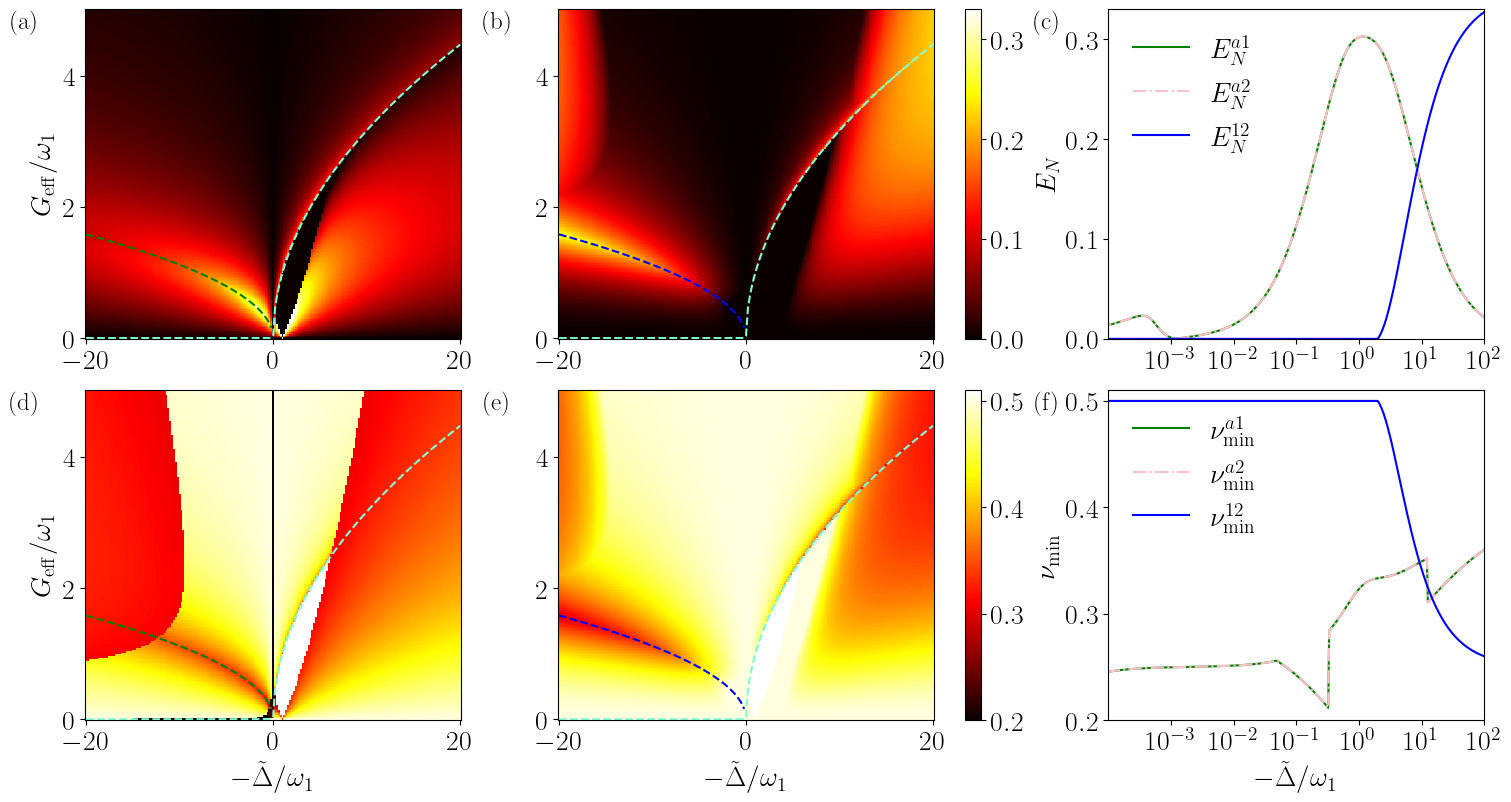

In [11]:
ZEabp1=np.loadtxt("Entab_max_o2_by_o1=1.0.txt")
ZEabp10=np.loadtxt("Entab_max_o2_by_o1=10.0.txt")
ZEabp0p1=np.loadtxt("Entab_max_o2_by_o1=0.1.txt")
ZE12p1=np.loadtxt("Ent12_max_o2_by_o1=1.0.txt")
ZE12p10=np.loadtxt("Ent12_max_o2_by_o1=10.0.txt")
ZE12p0p1=np.loadtxt("Ent12_max_o2_by_o1=0.1.txt")

ZSabp1=np.loadtxt("Squeeab_min_o2_by_o1=1.0.txt")
ZSabp10=np.loadtxt("Squeeab_min_o2_by_o1=10.0.txt")
ZSabp0p1=np.loadtxt("Squeeab_min_o2_by_o1=0.1.txt")
ZS12p1=np.loadtxt("Squee12_min_o2_by_o1=1.0.txt")
ZS12p10=np.loadtxt("Squee12_min_o2_by_o1=10.0.txt")
ZS12p0p1=np.loadtxt("Squee12_min_o2_by_o1=0.1.txt")

Xp=np.loadtxt("All_phases_o2_by_o1_line=1.0.txt")[:,0]
Gp1=np.loadtxt("All_phases_o2_by_o1_line=1.0.txt")[:,1]
Gp10=np.loadtxt("All_phases_o2_by_o1_line=10.0.txt")[:,1]
Gp0p1=np.loadtxt("All_phases_o2_by_o1_line=0.1.txt")[:,1]
G23p1=np.loadtxt("All_phases_o2_by_o1_line=1.0.txt")[:,2]
G23p10=np.loadtxt("All_phases_o2_by_o1_line=10.0.txt")[:,2]
G23p0p1=np.loadtxt("All_phases_o2_by_o1_line=0.1.txt")[:,2]

line_data=np.loadtxt("Ent_o2_by_o1_line=1.0.txt")
Xpline=line_data[:,0]
Entanglement_max_phDw=line_data[:,1]
Entanglement_max_phDw1=line_data[:,2]
Entanglement_max_DwDw=line_data[:,3]
Squeezing_min_phDw=line_data[:,4]
Squeezing_min_phDw1=line_data[:,5]
Squeezing_min_DwDw=line_data[:,6]

Y=np.linspace(0.001,5,201)
X=np.linspace(-20,20,Nbins)
X0=X
Y0=Y
X,Y = np.meshgrid(X,Y)
# Subplots environment for clubbing and labelling multiple figures
import matplotlib.transforms as mtransforms
ncols=3;nrows=2
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(15, 8),layout="constrained", sharex=False)#, sharey=True);,layout="constrained"
plt.rc('font',**{'family':'serif','sans-serif':['Computer Modern Sans serif'],'size':20})
plt.rc('text', usetex=True)
# add an artist, in this case a nice label in the middle...
label_list=['(a)','(b)','(c)','(d)','(e)','(f)','(g)']
# axs[1].set_ylim(1e-38,1e-29)
for row in range(nrows):
    for col in range(ncols):
        trans = mtransforms.ScaledTranslation(-0.6, 0, fig.dpi_scale_trans)
        # axs[row].annotate(label_list[row], (0.5, 0.5),transform=axs[row].transAxes+trans,ha='center', va='center', fontsize=14,color='black')
        axs[row,col].text(0.0, 1.0, label_list[col+row*ncols], transform=axs[row,col].transAxes + trans,
            fontsize='18', ha='center', va='top', fontfamily='serif',
            bbox=dict(facecolor='1', edgecolor='none', pad=0.3))
# Adjust the padding between subplots
# plt.subplots_adjust(left=0.1, right=0.9, bottom=0.12, top=0.9, wspace=0.1, hspace=0.1)

axs[0,0].pcolormesh(X,Y,ZEabp1, cmap='hot', shading='nearest',vmin=0,vmax=0.33)#,norm=colors.LogNorm(vmin=1,vmax=1e8))
axs[0,0].plot(X0,Gp1,'--',color='green')
axs[0,0].plot(X0,G23p1,'--',color='aquamarine')
# axs[0,0].set_xscale("log")

im1=axs[0,1].pcolormesh(X,Y,ZE12p1, cmap='hot', shading='nearest',vmin=0,vmax=0.33)#,norm=colors.LogNorm(vmin=1,vmax=1e8))
# axs[0,1].colorbar(im, ax=axes).set_label(r'$E^{\rm max}_N$')#, fontsize=18)
fig.colorbar(im1, ax=axs[0,1])#.set_label(r'$E^{\rm max}_N$')#, fontsize=14)
axs[0,1].plot(X0,Gp1,'--',color='blue')
axs[0,1].plot(X0,G23p1,'--',color='aquamarine')
# axs[0,1].set_xscale("log")

axs[0,2].plot(Xpline,Entanglement_max_phDw,color='green',label=r'$E^{a1}_N$')
axs[0,2].plot(Xpline,Entanglement_max_phDw,linestyle='dashdot',color='pink',label=r'$E^{a2}_N$')
axs[0,2].plot(Xpline,Entanglement_max_DwDw,color='blue',label=r'$E^{12}_N$')
axs[0,2].set_xscale("log")
# axs[0,2].set_yscale("log")

axs[1,0].pcolormesh(X,Y,ZSabp1, cmap='hot', shading='nearest',vmin=0.2,vmax=0.51)#,norm=colors.LogNorm(vmin=1,vmax=1e8))
axs[1,0].plot(X0,Gp1,'--',color='green')
axs[1,0].plot(X0,G23p1,'--',color='aquamarine')
# axs[1,0].set_xscale("log")

im2=axs[1,1].pcolormesh(X,Y,ZS12p1, cmap='hot', shading='nearest',vmin=0.2,vmax=0.51)#,norm=colors.LogNorm(vmin=1,vmax=1e8))
# axs[1,1].colorbar(im, ax=axes).set_label(r'$\nu_{\rm min}$')
fig.colorbar(im2, ax=axs[1,1])#.set_label(r'$\nu_{\rm min}$')#, fontsize=14)
axs[1,1].plot(X0,Gp1,'--',color='blue')
axs[1,1].plot(X0,G23p1,'--',color='aquamarine')
# axs[1,1].set_xscale("log")

axs[1,2].plot(Xpline,Squeezing_min_phDw,color='green',label=r'$\nu^{a1}_{\rm min}$')
axs[1,2].plot(Xpline,Squeezing_min_phDw1,linestyle='dashdot',color='pink',label=r'$\nu^{a2}_{\rm min}$')
axs[1,2].plot(Xpline,Squeezing_min_DwDw,color='blue',label=r'$\nu^{12}_{\rm min}$')
# for i in range(3):
#     axs[1,2].plot(Xpline,Squeezing_phDw[i,:],label=r'$\nu^{ab}_{%d}$' %(i+1))
#     axs[1,2].plot(Xpline,Squeezing_DwDw[i,:],label=r'$\nu^{12}_{%d}$' %(i+1))
axs[1,2].set_xscale("log")

# axs[0].set_xlim(-parameter_vec[-1]/o1,-parameter_vec[0]/o1)
# axs[2].set_ylim(o_vec[0]/o1,o_vec[-1]/o1)
# axs[1].set_ylim(o_vec[0]/o1,o_vec[-1]/o1)
# axs[0].set_ylim(o_vec[0]/o1,o_vec[-1]/o1)
axs[1,0].set_xlabel(r'$-\tilde{\Delta}/\omega_1$')
axs[1,1].set_xlabel(r'$-\tilde{\Delta}/\omega_1$')
axs[1,2].set_xlabel(r'$-\tilde{\Delta}/\omega_1$')
axs[1,0].set_ylabel(r'$G_{\rm eff}/\omega_1$')
axs[0,0].set_ylabel(r'$G_{\rm eff}/\omega_1$')
axs[0,2].set_ylabel(r'$E_N$')
axs[1,2].set_ylabel(r'$\nu_{\rm min}$')
axs[0,2].set_xticks([1e-3,1e-2,1e-1,1,10,1e2])
axs[1,2].set_xticks([1e-3,1e-2,1e-1,1,10,1e2])
axs[0,2].set_xlim(1e-4,1e2)
axs[1,2].set_xlim(1e-4,1e2)
axs[0,2].set_ylim(0,0.33)
axs[1,2].set_ylim(0.2,0.51)
# axs[1].set_facecolor("black")

# axs[2].set_yscale("log")
# axs[1].set_yscale("log")
# axs[0].set_xscale("log")
# axs[0].set_xticks([0.1,1,10,100])
axs[0,2].legend(prop={'weight': 'normal', "size": 20, 'stretch': 'normal'},frameon=False)#, labelcolor='white')
axs[1,2].legend(prop={'weight': 'normal', "size": 20, 'stretch': 'normal'},frameon=False)
# axs[1].legend(prop={'weight': 'normal', "size": 14, 'stretch': 'normal'},frameon=False, labelcolor='white')
# axs[2].legend(prop={'weight': 'normal', "size": 14, 'stretch': 'normal'},frameon=False, labelcolor='white')
# plt.tight_layout()
# plt.savefig("entangled_phases.png",dpi=400)
plt.plot()

[]

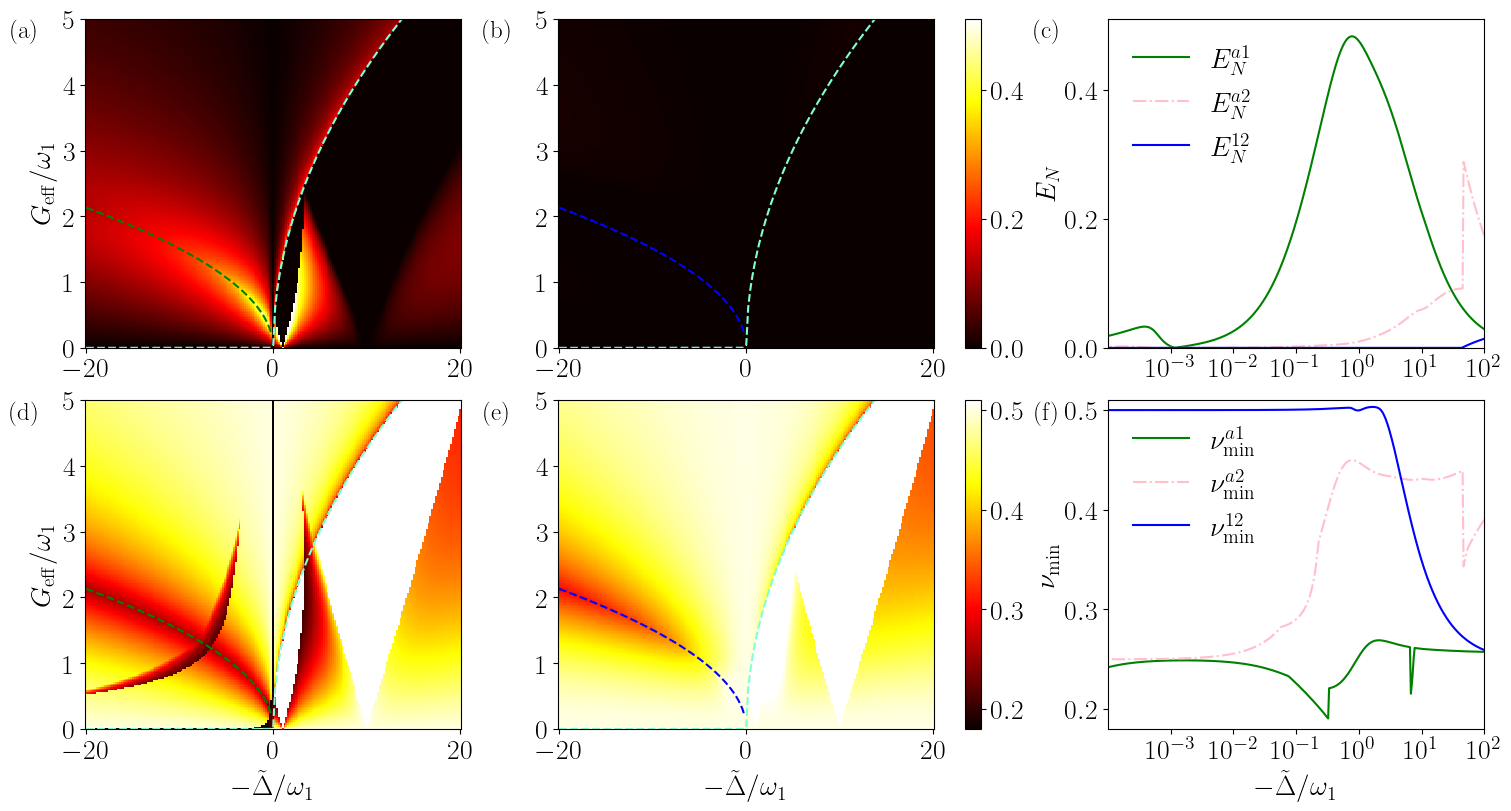

In [10]:
ZEabp1=np.loadtxt("Entab_max_o2_by_o1=1.0.txt")
ZEabp10=np.loadtxt("Entab_max_o2_by_o1=10.0.txt")
ZEabp0p1=np.loadtxt("Entab_max_o2_by_o1=0.1.txt")
ZE12p1=np.loadtxt("Ent12_max_o2_by_o1=1.0.txt")
ZE12p10=np.loadtxt("Ent12_max_o2_by_o1=10.0.txt")
ZE12p0p1=np.loadtxt("Ent12_max_o2_by_o1=0.1.txt")

ZSabp1=np.loadtxt("Squeeab_min_o2_by_o1=1.0.txt")
ZSabp10=np.loadtxt("Squeeab_min_o2_by_o1=10.0.txt")
ZSabp0p1=np.loadtxt("Squeeab_min_o2_by_o1=0.1.txt")
ZS12p1=np.loadtxt("Squee12_min_o2_by_o1=1.0.txt")
ZS12p10=np.loadtxt("Squee12_min_o2_by_o1=10.0.txt")
ZS12p0p1=np.loadtxt("Squee12_min_o2_by_o1=0.1.txt")

Xp=np.loadtxt("All_phases_o2_by_o1_line=1.0.txt")[:,0]
Gp1=np.loadtxt("All_phases_o2_by_o1_line=1.0.txt")[:,1]
Gp10=np.loadtxt("All_phases_o2_by_o1_line=10.0.txt")[:,1]
Gp0p1=np.loadtxt("All_phases_o2_by_o1_line=0.1.txt")[:,1]
G23p1=np.loadtxt("All_phases_o2_by_o1_line=1.0.txt")[:,2]
G23p10=np.loadtxt("All_phases_o2_by_o1_line=10.0.txt")[:,2]
G23p0p1=np.loadtxt("All_phases_o2_by_o1_line=0.1.txt")[:,2]

line_data=np.loadtxt("Ent_o2_by_o1_line=10.0.txt")
Xpline=line_data[:,0]
Entanglement_max_phDw=line_data[:,1]
Entanglement_max_phDw1=line_data[:,2]
Entanglement_max_DwDw=line_data[:,3]
Squeezing_min_phDw=line_data[:,4]
Squeezing_min_phDw1=line_data[:,5]
Squeezing_min_DwDw=line_data[:,6]

Y=np.linspace(0.001,5,201)
X=np.linspace(-20,20,Nbins)
X0=X
Y0=Y
X,Y = np.meshgrid(X,Y)
# Subplots environment for clubbing and labelling multiple figures
import matplotlib.transforms as mtransforms
ncols=3;nrows=2
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(15, 8),layout="constrained", sharex=False)#, sharey=True);,layout="constrained"
plt.rc('font',**{'family':'serif','sans-serif':['Computer Modern Sans serif'],'size':20})
plt.rc('text', usetex=True)
# add an artist, in this case a nice label in the middle...
label_list=['(a)','(b)','(c)','(d)','(e)','(f)','(g)']
# axs[1].set_ylim(1e-38,1e-29)
for row in range(nrows):
    for col in range(ncols):
        trans = mtransforms.ScaledTranslation(-0.6, 0, fig.dpi_scale_trans)
        # axs[row].annotate(label_list[row], (0.5, 0.5),transform=axs[row].transAxes+trans,ha='center', va='center', fontsize=14,color='black')
        axs[row,col].text(0.0, 1.0, label_list[col+row*ncols], transform=axs[row,col].transAxes + trans,
            fontsize='18', ha='center', va='top', fontfamily='serif',
            bbox=dict(facecolor='1', edgecolor='none', pad=0.3))
# Adjust the padding between subplots
# plt.subplots_adjust(left=0.1, right=0.9, bottom=0.12, top=0.9, wspace=0.1, hspace=0.1)

axs[0,0].pcolormesh(X,Y,ZEabp10, cmap='hot', shading='nearest',vmin=0,vmax=0.51)#,norm=colors.LogNorm(vmin=1,vmax=1e8))
axs[0,0].plot(X0,Gp10,'--',color='green')
axs[0,0].plot(X0,G23p10,'--',color='aquamarine')
# axs[0,0].set_xscale("log")

im1=axs[0,1].pcolormesh(X,Y,ZE12p10, cmap='hot', shading='nearest',vmin=0,vmax=0.51)#,norm=colors.LogNorm(vmin=1,vmax=1e8))
# axs[0,1].colorbar(im, ax=axes).set_label(r'$E^{\rm max}_N$')#, fontsize=18)
fig.colorbar(im1, ax=axs[0,1])#.set_label(r'$E^{\rm max}_N$')#, fontsize=14)
axs[0,1].plot(X0,Gp10,'--',color='blue')
axs[0,1].plot(X0,G23p10,'--',color='aquamarine')
# axs[0,1].set_xscale("log")

axs[0,2].plot(Xpline,Entanglement_max_phDw,color='green',label=r'$E^{a1}_N$')
axs[0,2].plot(Xpline,Entanglement_max_phDw1,linestyle='dashdot',color='pink',label=r'$E^{a2}_N$')
axs[0,2].plot(Xpline,Entanglement_max_DwDw,color='blue',label=r'$E^{12}_N$')
axs[0,2].set_xscale("log")
# axs[0,2].set_yscale("log")

axs[1,0].pcolormesh(X,Y,ZSabp10, cmap='hot', shading='nearest',vmin=0.18,vmax=0.51)#,norm=colors.LogNorm(vmin=1,vmax=1e8))
axs[1,0].plot(X0,Gp10,'--',color='green')
axs[1,0].plot(X0,G23p10,'--',color='aquamarine')
# axs[1,0].set_xscale("log")

im2=axs[1,1].pcolormesh(X,Y,ZS12p10, cmap='hot', shading='nearest',vmin=0.18,vmax=0.51)#,norm=colors.LogNorm(vmin=1,vmax=1e8))
# axs[1,1].colorbar(im, ax=axes).set_label(r'$\nu_{\rm min}$')
fig.colorbar(im2, ax=axs[1,1])#.set_label(r'$\nu_{\rm min}$')#, fontsize=14)
axs[1,1].plot(X0,Gp10,'--',color='blue')
axs[1,1].plot(X0,G23p10,'--',color='aquamarine')
# axs[1,1].set_xscale("log")

axs[1,2].plot(Xpline,Squeezing_min_phDw,color='green',label=r'$\nu^{a1}_{\rm min}$')
axs[1,2].plot(Xpline,Squeezing_min_phDw1,linestyle='dashdot',color='pink',label=r'$\nu^{a2}_{\rm min}$')
axs[1,2].plot(Xpline,Squeezing_min_DwDw,color='blue',label=r'$\nu^{12}_{\rm min}$')
# for i in range(3):
#     axs[1,2].plot(Xpline,Squeezing_phDw[i,:],label=r'$\nu^{ab}_{%d}$' %(i+1))
#     axs[1,2].plot(Xpline,Squeezing_DwDw[i,:],label=r'$\nu^{12}_{%d}$' %(i+1))
axs[1,2].set_xscale("log")

# axs[0].set_xlim(-parameter_vec[-1]/o1,-parameter_vec[0]/o1)
# axs[2].set_ylim(o_vec[0]/o1,o_vec[-1]/o1)
# axs[1].set_ylim(o_vec[0]/o1,o_vec[-1]/o1)
# axs[0].set_ylim(o_vec[0]/o1,o_vec[-1]/o1)
axs[1,0].set_xlabel(r'$-\tilde{\Delta}/\omega_1$')
axs[1,1].set_xlabel(r'$-\tilde{\Delta}/\omega_1$')
axs[1,2].set_xlabel(r'$-\tilde{\Delta}/\omega_1$')
axs[1,0].set_ylabel(r'$G_{\rm eff}/\omega_1$')
axs[0,0].set_ylabel(r'$G_{\rm eff}/\omega_1$')
axs[0,2].set_ylabel(r'$E_N$')
axs[1,2].set_ylabel(r'$\nu_{\rm min}$')
axs[0,2].set_xticks([1e-3,1e-2,1e-1,1,10,1e2])
axs[1,2].set_xticks([1e-3,1e-2,1e-1,1,10,1e2])
axs[0,2].set_xlim(1e-4,1e2)
axs[1,2].set_xlim(1e-4,1e2)
axs[0,2].set_ylim(0,0.51)
axs[1,2].set_ylim(0.18,0.51)

axs[0,0].set_ylim(0,5);axs[0,1].set_ylim(0,5);axs[1,0].set_ylim(0,5);axs[1,1].set_ylim(0,5)
# axs[1].set_facecolor("black")

# axs[2].set_yscale("log")
# axs[1].set_yscale("log")
# axs[0].set_xscale("log")
# axs[0].set_xticks([0.1,1,10,100])
axs[0,2].legend(prop={'weight': 'normal', "size": 20, 'stretch': 'normal'},frameon=False)#, labelcolor='white')
axs[1,2].legend(prop={'weight': 'normal', "size": 20, 'stretch': 'normal'},frameon=False)
# axs[1].legend(prop={'weight': 'normal', "size": 14, 'stretch': 'normal'},frameon=False, labelcolor='white')
# axs[2].legend(prop={'weight': 'normal', "size": 14, 'stretch': 'normal'},frameon=False, labelcolor='white')
# plt.tight_layout()
# plt.savefig("entangled_phases_10.png",dpi=400)
plt.plot()

### Combining plots of $E_{b_1,b_2}$ for both cases:

[]

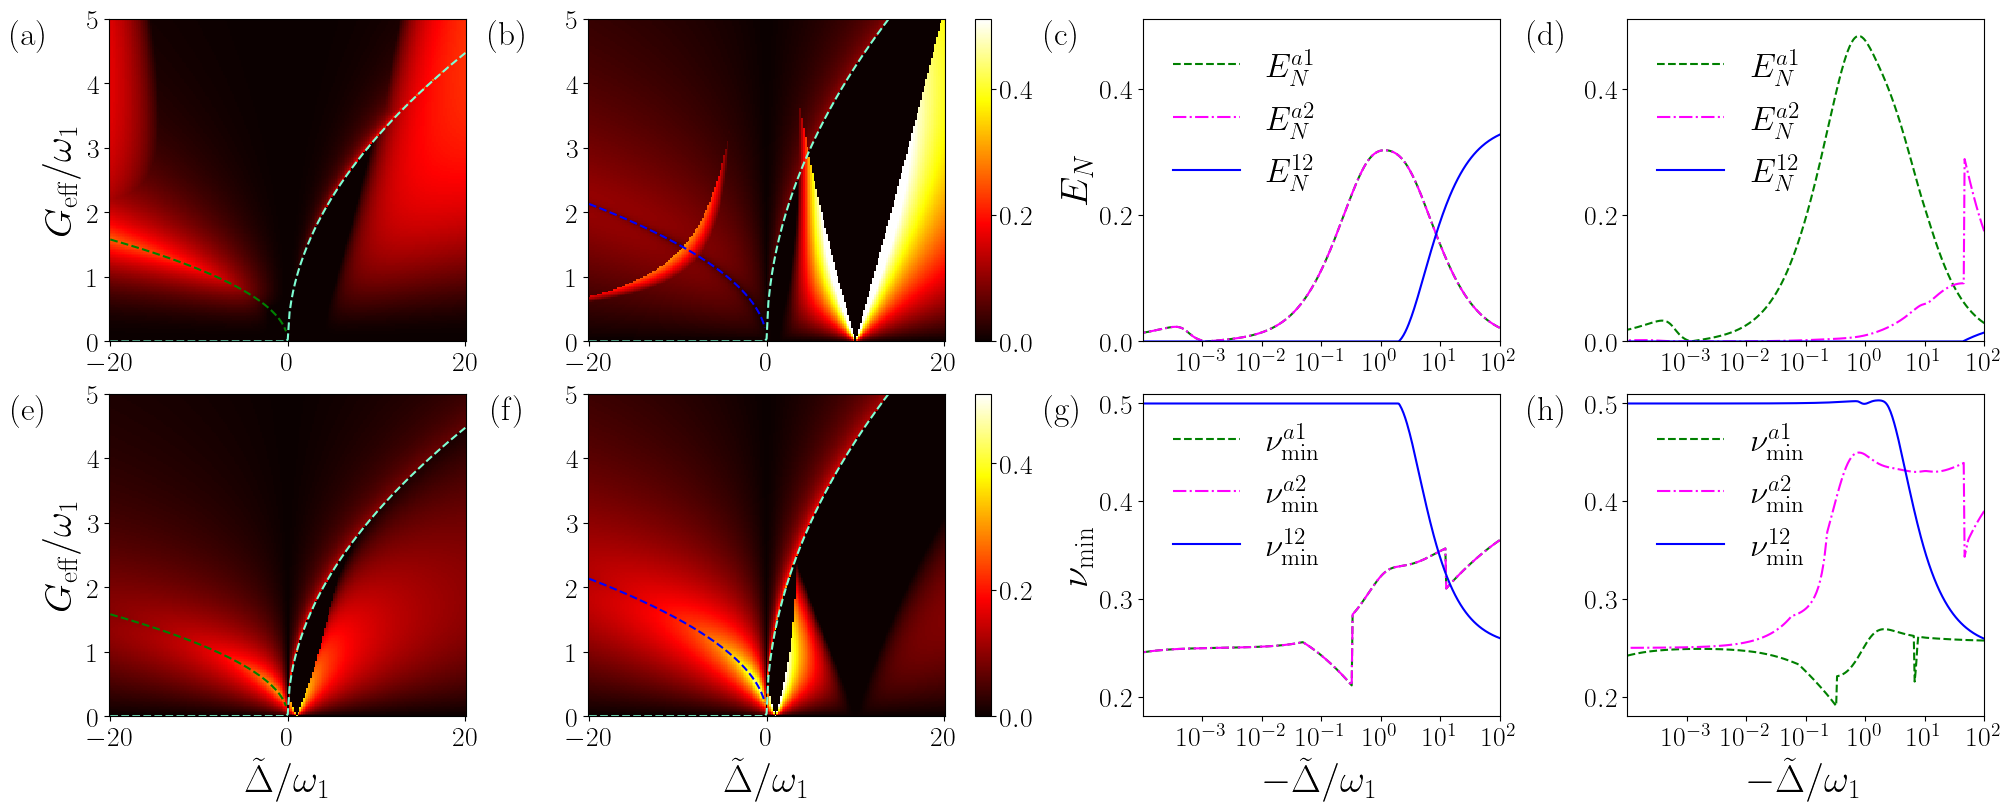

In [9]:
ZEabp1=np.loadtxt("Entab_max_o2_by_o1=1.0.txt")
ZEabp10=np.loadtxt("Entab_max_o2_by_o1=10.0.txt")
ZEabp0p1=np.loadtxt("Entab_max_o2_by_o1=0.1.txt")
ZE12p1=np.loadtxt("Ent12_max_o2_by_o1=1.0.txt")
ZE12p10=np.loadtxt("Entab2_max_o2_by_o1=10.0.txt")
ZE12p0p1=np.loadtxt("Ent12_max_o2_by_o1=0.1.txt")

ZSabp1=np.loadtxt("Squeeab_min_o2_by_o1=1.0.txt")
ZSabp10=np.loadtxt("Squeeab_min_o2_by_o1=10.0.txt")
ZSabp0p1=np.loadtxt("Squeeab_min_o2_by_o1=0.1.txt")
ZS12p1=np.loadtxt("Squee12_min_o2_by_o1=1.0.txt")
ZS12p10=np.loadtxt("Squee12_min_o2_by_o1=10.0.txt")
ZS12p0p1=np.loadtxt("Squee12_min_o2_by_o1=0.1.txt")

Xp=np.loadtxt("All_phases_o2_by_o1_line=1.0.txt")[:,0]
Gp1=np.loadtxt("All_phases_o2_by_o1_line=1.0.txt")[:,1]
Gp10=np.loadtxt("All_phases_o2_by_o1_line=10.0.txt")[:,1]
Gp0p1=np.loadtxt("All_phases_o2_by_o1_line=0.1.txt")[:,1]
G23p1=np.loadtxt("All_phases_o2_by_o1_line=1.0.txt")[:,2]
G23p10=np.loadtxt("All_phases_o2_by_o1_line=10.0.txt")[:,2]
G23p0p1=np.loadtxt("All_phases_o2_by_o1_line=0.1.txt")[:,2]

line_data=np.loadtxt("Ent_o2_by_o1_line=1.0.txt")
Xpline=line_data[:,0]
Entanglement_max_phDw=line_data[:,1]
Entanglement_max_phDw1=line_data[:,2]
Entanglement_max_DwDw=line_data[:,3]
Squeezing_min_phDw=line_data[:,4]
Squeezing_min_phDw1=line_data[:,5]
Squeezing_min_DwDw=line_data[:,6]

line_data10=np.loadtxt("Ent_o2_by_o1_line=10.0.txt")
# Xpline=line_data[:,0]
Entanglement_max_phDw_10=line_data10[:,1]
Entanglement_max_phDw1_10=line_data10[:,2]
Entanglement_max_DwDw_10=line_data10[:,3]
Squeezing_min_phDw_10=line_data10[:,4]
Squeezing_min_phDw1_10=line_data10[:,5]
Squeezing_min_DwDw_10=line_data10[:,6]

Y=np.linspace(0.001,5,201)
X=np.linspace(-20,20,Nbins)
X0=X
Y0=Y
X,Y = np.meshgrid(X,Y)
# Subplots environment for clubbing and labelling multiple figures
import matplotlib.transforms as mtransforms
ncols=4;nrows=2
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(20, 8),layout="constrained", sharex=False)#, sharey=True);,layout="constrained"
plt.rc('font',**{'family':'serif','sans-serif':['Computer Modern Sans serif'],'size':20})
plt.rc('text', usetex=True)
# add an artist, in this case a nice label in the middle...
label_list=['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)']
# axs[1].set_ylim(1e-38,1e-29)
for row in range(nrows):
    for col in range(ncols):
        trans = mtransforms.ScaledTranslation(-0.8, 0, fig.dpi_scale_trans)
        # axs[row].annotate(label_list[row], (0.5, 0.5),transform=axs[row].transAxes+trans,ha='center', va='center', fontsize=14,color='black')
        axs[row,col].text(0.0, 1.0, label_list[col+row*ncols], transform=axs[row,col].transAxes + trans,
            fontsize='24', ha='center', va='top', fontfamily='serif',
            bbox=dict(facecolor='1', edgecolor='none', pad=0.3))
# Adjust the padding between subplots
# plt.subplots_adjust(left=0.1, right=0.9, bottom=0.12, top=0.9, wspace=0.1, hspace=0.1)

axs[0,0].pcolormesh(X,Y,ZE12p1, cmap='hot', shading='nearest',vmin=0,vmax=0.51)#,norm=colors.LogNorm(vmin=1,vmax=1e8))
axs[0,0].plot(X0,Gp1,'--',color='green')
axs[0,0].plot(X0,G23p1,'--',color='aquamarine')
# axs[0,0].set_xscale("log")

im1=axs[0,1].pcolormesh(X,Y,ZE12p10, cmap='hot', shading='nearest',vmin=0,vmax=0.51)#,norm=colors.LogNorm(vmin=1,vmax=1e8))
# axs[0,1].colorbar(im, ax=axes).set_label(r'$E^{\rm max}_N$')#, fontsize=18)
fig.colorbar(im1, ax=axs[0,1])#.set_label(r'$E^{\rm max}_N$')#, fontsize=14)
axs[0,1].plot(X0,Gp10,'--',color='blue')
axs[0,1].plot(X0,G23p10,'--',color='aquamarine')
# axs[0,1].set_xscale("log")

axs[0,2].plot(Xpline,Entanglement_max_phDw,linestyle='dashed',color='green',label=r'$E^{a1}_N$')
axs[0,2].plot(Xpline,Entanglement_max_phDw1,linestyle='dashdot',color='magenta',label=r'$E^{a2}_N$')
axs[0,2].plot(Xpline,Entanglement_max_DwDw,color='blue',label=r'$E^{12}_N$')
axs[0,2].set_xscale("log")
# axs[0,2].set_yscale("log")

axs[0,3].plot(Xpline,Entanglement_max_phDw_10,linestyle='dashed',color='green',label=r'$E^{a1}_N$')
axs[0,3].plot(Xpline,Entanglement_max_phDw1_10,linestyle='dashdot',color='magenta',label=r'$E^{a2}_N$')
axs[0,3].plot(Xpline,Entanglement_max_DwDw_10,color='blue',label=r'$E^{12}_N$')
axs[0,3].set_xscale("log")

axs[1,0].pcolormesh(X,Y,ZEabp1, cmap='hot', shading='nearest',vmin=0,vmax=0.51)#,norm=colors.LogNorm(vmin=1,vmax=1e8))
axs[1,0].plot(X0,Gp1,'--',color='green')
axs[1,0].plot(X0,G23p1,'--',color='aquamarine')
# axs[1,0].set_xscale("log")

im2=axs[1,1].pcolormesh(X,Y,ZEabp10, cmap='hot', shading='nearest',vmin=0,vmax=0.51)#,norm=colors.LogNorm(vmin=1,vmax=1e8))
# axs[1,1].colorbar(im, ax=axes).set_label(r'$\nu_{\rm min}$')
fig.colorbar(im2, ax=axs[1,1])#.set_label(r'$\nu_{\rm min}$')#, fontsize=14)
axs[1,1].plot(X0,Gp10,'--',color='blue')
axs[1,1].plot(X0,G23p10,'--',color='aquamarine')
# axs[1,1].set_xscale("log")

axs[1,2].plot(Xpline,Squeezing_min_phDw,linestyle='dashed',color='green',label=r'$\nu^{a1}_{\rm min}$')
axs[1,2].plot(Xpline,Squeezing_min_phDw1,linestyle='dashdot',color='magenta',label=r'$\nu^{a2}_{\rm min}$')
axs[1,2].plot(Xpline,Squeezing_min_DwDw,color='blue',label=r'$\nu^{12}_{\rm min}$')
axs[1,2].set_xscale("log")

axs[1,3].plot(Xpline,Squeezing_min_phDw_10,linestyle='dashed',color='green',label=r'$\nu^{a1}_{\rm min}$')
axs[1,3].plot(Xpline,Squeezing_min_phDw1_10,linestyle='dashdot',color='magenta',label=r'$\nu^{a2}_{\rm min}$')
axs[1,3].plot(Xpline,Squeezing_min_DwDw_10,color='blue',label=r'$\nu^{12}_{\rm min}$')
axs[1,3].set_xscale("log")

# axs[0].set_xlim(-parameter_vec[-1]/o1,-parameter_vec[0]/o1)
# axs[2].set_ylim(o_vec[0]/o1,o_vec[-1]/o1)
# axs[1].set_ylim(o_vec[0]/o1,o_vec[-1]/o1)
# axs[0].set_ylim(o_vec[0]/o1,o_vec[-1]/o1)
axs[1,0].set_xlabel(r'$\tilde{\Delta}/\omega_1$',fontsize=28)
axs[1,1].set_xlabel(r'$\tilde{\Delta}/\omega_1$',fontsize=28)
axs[1,2].set_xlabel(r'$-\tilde{\Delta}/\omega_1$',fontsize=28)
axs[1,3].set_xlabel(r'$-\tilde{\Delta}/\omega_1$',fontsize=28)
axs[1,0].set_ylabel(r'$G_{\rm eff}/\omega_1$',fontsize=28)
axs[0,0].set_ylabel(r'$G_{\rm eff}/\omega_1$',fontsize=28)
axs[0,2].set_ylabel(r'$E_N$',fontsize=28)
axs[1,2].set_ylabel(r'$\nu_{\rm min}$',fontsize=28)
axs[0,2].set_xticks([1e-3,1e-2,1e-1,1,10,1e2])
axs[1,2].set_xticks([1e-3,1e-2,1e-1,1,10,1e2])
axs[0,3].set_xticks([1e-3,1e-2,1e-1,1,10,1e2])
axs[1,3].set_xticks([1e-3,1e-2,1e-1,1,10,1e2])
axs[0,2].set_xlim(1e-4,1e2)
axs[1,2].set_xlim(1e-4,1e2)
axs[0,3].set_xlim(1e-4,1e2)
axs[1,3].set_xlim(1e-4,1e2)
axs[0,2].set_ylim(0,0.51)
axs[1,2].set_ylim(0.18,0.51)
axs[0,3].set_ylim(0,0.51)
axs[1,3].set_ylim(0.18,0.51)

axs[0,0].set_ylim(0,5);axs[0,1].set_ylim(0,5);axs[1,0].set_ylim(0,5);axs[1,1].set_ylim(0,5)
# axs[1].set_facecolor("black")

# axs[2].set_yscale("log")
# axs[1].set_yscale("log")
# axs[0].set_xscale("log")
# axs[0].set_xticks([0.1,1,10,100])
axs[0,2].legend(prop={'weight': 'normal', "size": 24, 'stretch': 'normal'},frameon=False)#, labelcolor='white')
axs[1,2].legend(prop={'weight': 'normal', "size": 24, 'stretch': 'normal'},frameon=False)
axs[0,3].legend(prop={'weight': 'normal', "size": 24, 'stretch': 'normal'},frameon=False)#, labelcolor='white')
axs[1,3].legend(prop={'weight': 'normal', "size": 24, 'stretch': 'normal'},frameon=False)
# axs[1].legend(prop={'weight': 'normal', "size": 14, 'stretch': 'normal'},frameon=False, labelcolor='white')
# axs[2].legend(prop={'weight': 'normal', "size": 14, 'stretch': 'normal'},frameon=False, labelcolor='white')
# plt.tight_layout()
# plt.savefig("entangled_phases_2x4_v2.png",dpi=400)
plt.plot()

### Remixing of Plots:

[]

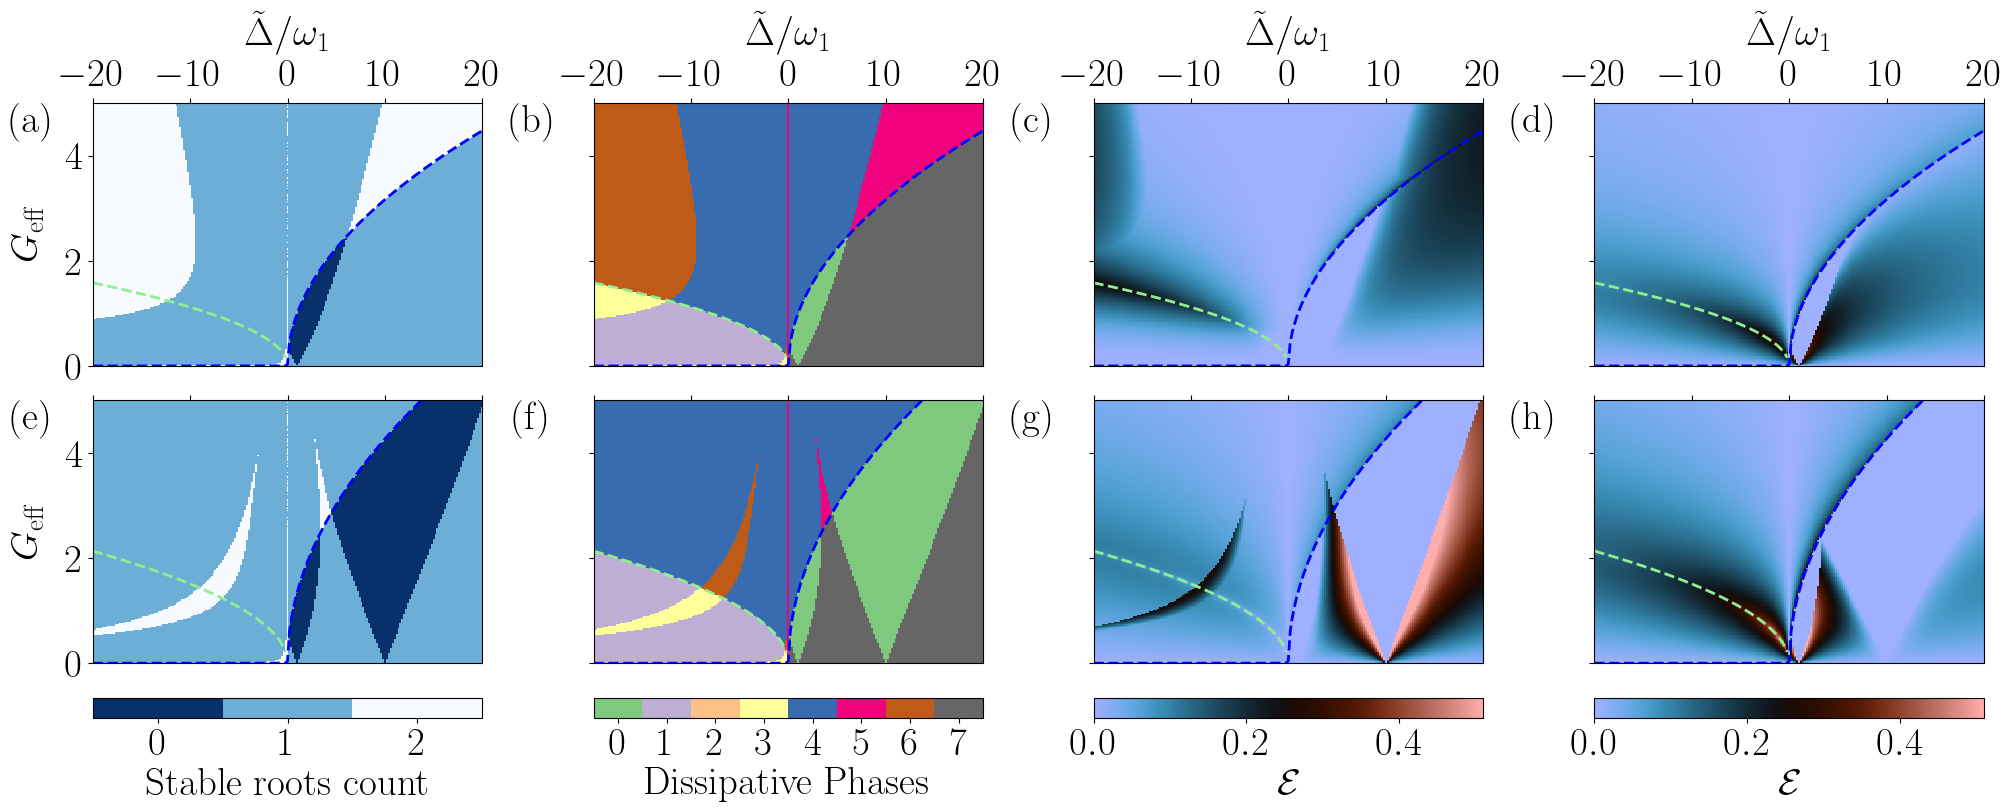

In [175]:
cmap = plt.colormaps['Accent']
colorx = cmap(np.linspace(0, 1, 8))
discrete_cmap = colors.ListedColormap(colorx)

cmap1 = plt.colormaps['Blues_r']
# cmap = plt.colormaps['rainbow']
colorx1 = cmap1(np.linspace(0, 1, 3))
discrete_cmap1 = colors.ListedColormap(colorx1)
cmap_ent='berlin'#'terrain_r'

Y=np.linspace(0.001,5,201)
X=np.linspace(-20,20,Nbins)
X,Y = np.meshgrid(X,Y)
# X1,Y1 = np.meshgrid(-Delta_t_vec/o1,o_vec/o1)
# Subplots environment for clubbing and labelling multiple figures
import matplotlib.transforms as mtransforms
ncols=4;nrows=2
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(20, 8),layout="constrained", sharex=True, sharey=True)#;,layout="constrained"
plt.rc('font',**{'family':'serif','sans-serif':['Computer Modern Sans serif'],'size':28})
plt.rc('text', usetex=True)
# add an artist, in this case a nice label in the middle...
label_list=['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)','(i)']
# axs[1].set_ylim(1e-38,1e-29)
for row in range(nrows):
    for col in range(ncols):
        trans = mtransforms.ScaledTranslation(-0.6, 0, fig.dpi_scale_trans)
        # axs[row].annotate(label_list[row], (0.5, 0.5),transform=axs[row].transAxes+trans,ha='center', va='center', fontsize=18,color='black')
        axs[row,col].text(0.0, 1.0, label_list[col+row*ncols], transform=axs[row,col].transAxes + trans,
            fontsize='28', ha='center', va='top', fontfamily='serif',
            bbox=dict(facecolor='1', edgecolor='none', pad=0.3))
# Adjust the padding between subplots
# plt.subplots_adjust(left=0.1, right=0.9, bottom=0.12, top=0.9, wspace=0.1, hspace=0.1)
# o2=0.1*o1
# Omega=2*( o1*G1*G1/(o1**2 + kp1**2) + o2*G2*G2/(o2**2 + kp2**2))
im=axs[0,0].pcolormesh(X,Y,Zsp1, cmap=discrete_cmap1, shading='nearest')#,norm=colors.LogNorm()
# cbar=plt.colorbar(im, ax=axs[0,0], ticks=[2/3 - 1/3,4/3 - 1/3,2 - 1/3],location='top',label=r'Stable roots count')#, location='top',label=r'Stable roots count')#.set_label(r'Phases', fontsize=20)
# axs[0].pcolormesh(X,Y,Zsp0p1, cmap=discrete_cmap, shading='nearest')
# plt.colorbar(im, ax=axs[0]).set_label(r'$N_{\rm stable}$')
lw0=2.0
axs[0,0].plot(Xp,Gp1,'--',lw=lw0,color='lightgreen')
axs[0,0].plot(Xp,G23p1,'--',lw=lw0,color='blue')

im=axs[0,1].pcolormesh(X,Y,Zp1, cmap=discrete_cmap, shading='nearest')#,norm=colors.LogNorm()
# cbar=plt.colorbar(im, ax=axs[0,1], ticks=[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5],location='top',label=r'Dissipative Phases')#, location='top',label=r'Dissipative Phases')#.set_label(r'Phases', fontsize=20)
# cbar.ax.set_xticklabels(['1', '2', '3', '4', '5', '6', '7', '8'])
axs[0,1].plot(Xp,Gp1,'--',lw=lw0,color='lightgreen')
axs[0,1].plot(Xp,G23p1,'--',lw=lw0,color='blue')

im1=axs[0,2].pcolormesh(X,Y,ZE12p1, cmap=cmap_ent, shading='nearest',vmin=0,vmax=0.51)#,norm=colors.LogNorm(vmin=1,vmax=1e8))
# fig.colorbar(im1, ax=axs[0,2],location='top',label=r'$\mathcal{E}$')#,location='top',label=r'Entanglement $\mathcal{E}$')#.set_label(r'$E^{\rm max}_N$')#, fontsize=18)
axs[0,2].plot(X0,Gp1,'--',lw=lw0,color='lightgreen')
axs[0,2].plot(X0,G23p1,'--',lw=lw0,color='blue')
# axs[0,0].set_xscale("log")

im1=axs[1,2].pcolormesh(X,Y,ZE12p10, cmap=cmap_ent, shading='nearest',vmin=0,vmax=0.51)#,norm=colors.LogNorm(vmin=1,vmax=1e8))
fig.colorbar(im1, ax=axs[1,2],location='bottom',label=r'$\mathcal{E}$')
axs[1,2].plot(X0,Gp10,'--',lw=lw0,color='lightgreen')
axs[1,2].plot(X0,G23p10,'--',lw=lw0,color='blue')

# axs[0,2].pcolormesh(X1,Y1,Z_k1_o1o2_1, cmap=cmap2, shading='nearest',norm=colors.LogNorm(vmin=1e-7,vmax=1e0))
# for i in range(6):
#     axs[0,2].scatter(-parameter_vec/o1,np.real(eigvals_k1_o1o2_1[i,:])/o1,s=0.5,color='lightgreen')

# im = axs[0,3].pcolormesh(X1,Y1,Z_k2_o1o2_1, cmap=cmap2, shading='nearest',norm=colors.LogNorm(vmin=1e-7,vmax=1e0))
# plt.colorbar(im, ax=axs[0,3]).set_label(r'$S(\omega,\tilde{\Delta})$')
# for i in range(6):
#     axs[0,3].scatter(-parameter_vec/o1,np.real(eigvals_k2_o1o2_1[i,:])/o1,s=0.5,color='lightgreen')

im=axs[1,0].pcolormesh(X,Y,Zsp10, cmap=discrete_cmap1, shading='nearest')#,norm=colors.LogNorm()
cbar=plt.colorbar(im, ax=axs[1,0], ticks=[2/3 - 1/3,4/3 - 1/3,2 - 1/3],location='bottom',label=r'Stable roots count')
cbar.ax.set_xticklabels(['0', '1', '2'])
# cbar=plt.colorbar(im, ax=axs[1,0], ticks=[2/3 - 1/3,4/3 - 1/3,2 - 1/3])#.set_label(r'Phases', fontsize=20)
# cbar.ax.set_yticklabels(['0', '1', '2'])
axs[1,0].plot(Xp,Gp10,'--',lw=lw0,color='lightgreen')
axs[1,0].plot(Xp,G23p10,'--',lw=lw0,color='blue')

im=axs[1,1].pcolormesh(X,Y,Zp10, cmap=discrete_cmap, shading='nearest')#,norm=colors.LogNorm()
cbar=plt.colorbar(im, ax=axs[1,1], ticks=[7/8-7/16,14/8-7/16,21/8-7/16,28/8-7/16,35/8-7/16,42/8-7/16,49/8-7/16,56/8-7/16],location='bottom',label=r'Dissipative Phases')
cbar.ax.set_xticklabels(['0', '1', '2', '3', '4', '5', '6', '7'])
# cbar=plt.colorbar(im, ax=axs[1,1], ticks=[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5])#.set_label(r'Phases', fontsize=20)
# cbar.ax.set_yticklabels(['1', '2', '3', '4', '5', '6', '7', '8'])
axs[1,1].plot(Xp,Gp10,'--',lw=lw0,color='lightgreen')
axs[1,1].plot(Xp,G23p10,'--',lw=lw0,color='blue')

# axs[1,2].pcolormesh(X1,Y1,Z_k1_o1o2_10, cmap=cmap2, shading='nearest',norm=colors.LogNorm(vmin=1e-7,vmax=1e0))
# for i in range(6):
#     axs[1,2].scatter(-parameter_vec/o1,np.real(eigvals_k1_o1o2_10[i,:])/o1,s=0.5,color='lightgreen')

# # axs[1,3].pcolormesh(X1,Y1,Z_k2_o1o2_10, cmap='gist_stern', shading='nearest',norm=colors.LogNorm(vmin=1e-7,vmax=1e0))
# im = axs[1,3].pcolormesh(X1,Y1,Z_k2_o1o2_10, cmap=cmap2, shading='nearest',norm=colors.LogNorm(vmin=1e-7,vmax=1e0))
# plt.colorbar(im, ax=axs[1,3]).set_label(r'$S(\omega,\tilde{\Delta})$')
# for i in range(6):
#     axs[1,3].scatter(-parameter_vec/o1,np.real(eigvals_k2_o1o2_10[i,:])/o1,s=0.5,color='lightgreen')

im2=axs[0,3].pcolormesh(X,Y,ZEabp1, cmap=cmap_ent, shading='nearest',vmin=0,vmax=0.51)#,norm=colors.LogNorm(vmin=1,vmax=1e8))
# fig.colorbar(im2, ax=axs[0,3],location='top',label=r'$\mathcal{E}$')#.set_label(r'$\nu_{\rm min}$')#, fontsize=18)
axs[0,3].plot(X0,Gp1,'--',lw=lw0,color='lightgreen')
axs[0,3].plot(X0,G23p1,'--',lw=lw0,color='blue')#aquamarine
# axs[1,0].set_xscale("log")

im2=axs[1,3].pcolormesh(X,Y,ZEabp10, cmap=cmap_ent, shading='nearest',vmin=0,vmax=0.51)#,norm=colors.LogNorm(vmin=1,vmax=1e8))
fig.colorbar(im2, ax=axs[1,3],location='bottom',label=r'$\mathcal{E}$')
axs[1,3].plot(X0,Gp10,'--',lw=lw0,color='lightgreen')
axs[1,3].plot(X0,G23p10,'--',lw=lw0,color='blue')

for i in range(2):
    for j in range(4):
        axs[i,j].set_xlim(Delta_t_vec0[0]/o1,Delta_t_vec0[-1]/o1)
        axs[i,j].set_ylim(G_vec0[0]/o1,G_vec0[-1]/o1)
        # axs[i,2+j].set_xlim(-parameter_vec[-1]/o1,-parameter_vec[0]/o1)
        # axs[i,2+j].set_ylim(o_vec[0]/o1,o_vec[-1]/o1)
        # axs[i,2+j].set_xscale("log")

# axs[1,2].set_xscale("log")
axs[0,0].set_xlabel(r'$\tilde{\Delta}/\omega_1$', labelpad=10)
axs[0,0].xaxis.set_label_position("top")
axs[0,0].tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
axs[1,0].tick_params(top=True, labeltop=False, bottom=False, labelbottom=False)
axs[0,1].set_xlabel(r'$\tilde{\Delta}/\omega_1$', labelpad=10)
axs[0,1].xaxis.set_label_position("top")
axs[0,1].tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
axs[1,1].tick_params(top=True, labeltop=False, bottom=False, labelbottom=False)
axs[0,2].set_xlabel(r'$\tilde{\Delta}/\omega_1$', labelpad=10)
axs[0,2].xaxis.set_label_position("top")
axs[0,2].tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
axs[1,2].tick_params(top=True, labeltop=False, bottom=False, labelbottom=False)
axs[0,3].set_xlabel(r'$\tilde{\Delta}/\omega_1$', labelpad=10)
axs[0,3].xaxis.set_label_position("top")
axs[0,3].tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
axs[1,3].tick_params(top=True, labeltop=False, bottom=False, labelbottom=False)
axs[0,0].set_ylabel(r'$G_{\rm{eff}}$', labelpad=15, rotation=90)
axs[1,0].set_ylabel(r'$G_{\rm{eff}}$', labelpad=15, rotation=90)
axs[0,0].set_xticks([-20,-10,0,10,20])
axs[0,0].set_yticks([0,2,4])
# axs[0,2].set_ylabel(r'$\omega/\omega_1$')
# axs[1,2].set_ylabel(r'$\omega/\omega_1$')
# axs[1].set_facecolor("black")

# axs[2].set_yscale("log")
# axs[1].set_yscale("log")
# axs[0].set_yscale("log")
# axs[0].legend(prop={'weight': 'normal', "size": 18, 'stretch': 'normal'},frameon=False, labelcolor='white')
# axs[1].legend(prop={'weight': 'normal', "size": 18, 'stretch': 'normal'},frameon=False, labelcolor='white')
# axs[2].legend(prop={'weight': 'normal', "size": 18, 'stretch': 'normal'},frameon=False, labelcolor='white')
# plt.tight_layout()
plt.savefig("phases_x_mixed_re_bottom.png",dpi=400)
plt.plot()

[]

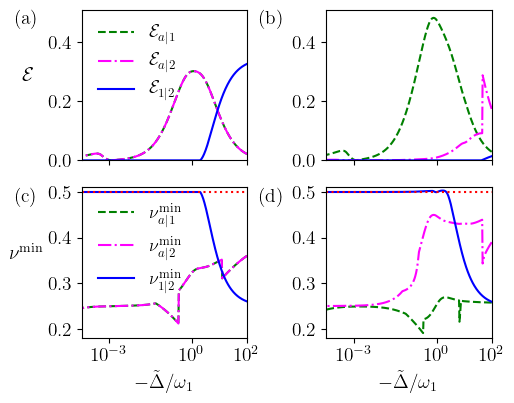

In [150]:
Y=np.linspace(0.001,5,201)
X=np.linspace(-20,20,Nbins)
X0=X
Y0=Y
X,Y = np.meshgrid(X,Y)
# Subplots environment for clubbing and labelling multiple figures
import matplotlib.transforms as mtransforms
ncols=2;nrows=2
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(5, 4), sharex=True, sharey=False)#;,layout="constrained"
plt.rc('font',**{'family':'serif','sans-serif':['Computer Modern Sans serif'],'size':14})
plt.rc('text', usetex=True)
# add an artist, in this case a nice label in the middle...
label_list=['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)']
# axs[1].set_ylim(1e-38,1e-29)
for row in range(nrows):
    for col in range(ncols):
        trans = mtransforms.ScaledTranslation(-0.55, 0, fig.dpi_scale_trans)
        # axs[row].annotate(label_list[row], (0.5, 0.5),transform=axs[row].transAxes+trans,ha='center', va='center', fontsize=18,color='black')
        axs[row,col].text(0.0, 1.0, label_list[col+row*ncols], transform=axs[row,col].transAxes + trans,
            fontsize='14', ha='center', va='top', fontfamily='serif',
            bbox=dict(facecolor='none', edgecolor='none', pad=0.0))
# Adjust the padding between subplots
# plt.subplots_adjust(left=0.1, right=0.9, bottom=0.12, top=0.9, wspace=0.1, hspace=0.1)

# axs[0,0].pcolormesh(X,Y,ZE12p1, cmap='hot', shading='nearest',vmin=0,vmax=0.51)#,norm=colors.LogNorm(vmin=1,vmax=1e8))
# axs[0,0].plot(X0,Gp1,'--',color='green')
# axs[0,0].plot(X0,G23p1,'--',color='aquamarine')
# # axs[0,0].set_xscale("log")

# im1=axs[0,1].pcolormesh(X,Y,ZE12p10, cmap='hot', shading='nearest',vmin=0,vmax=0.51)#,norm=colors.LogNorm(vmin=1,vmax=1e8))
# # axs[0,1].colorbar(im, ax=axes).set_label(r'$\mathcal{E}_{\rm max}$')#, fontsize=18)
# fig.colorbar(im1, ax=axs[0,1])#.set_label(r'$\mathcal{E}_{\rm max}$')#, fontsize=18)
# axs[0,1].plot(X0,Gp10,'--',color='blue')
# axs[0,1].plot(X0,G23p10,'--',color='aquamarine')
# # axs[0,1].set_xscale("log")

axs[0,0].plot(Xpline,Entanglement_max_phDw,linestyle='dashed',color='green',label=r'$\mathcal{E}_{a|1}$')
axs[0,0].plot(Xpline,Entanglement_max_phDw1,linestyle='dashdot',color='magenta',label=r'$\mathcal{E}_{a|2}$')
axs[0,0].plot(Xpline,Entanglement_max_DwDw,color='blue',label=r'$\mathcal{E}_{1|2}$')
axs[0,0].set_xscale("log")
# axs[0,2].set_yscale("log")

axs[0,1].plot(Xpline,Entanglement_max_phDw_10,linestyle='dashed',color='green',label=r'$\mathcal{E}_{a|1}$')
axs[0,1].plot(Xpline,Entanglement_max_phDw1_10,linestyle='dashdot',color='magenta',label=r'$\mathcal{E}_{a|2}$')
axs[0,1].plot(Xpline,Entanglement_max_DwDw_10,color='blue',label=r'$\mathcal{E}_{1|2}$')
axs[0,1].set_xscale("log")

# axs[1,0].pcolormesh(X,Y,ZEabp1, cmap='hot', shading='nearest',vmin=0,vmax=0.51)#,norm=colors.LogNorm(vmin=1,vmax=1e8))
# axs[1,0].plot(X0,Gp1,'--',color='green')
# axs[1,0].plot(X0,G23p1,'--',color='aquamarine')
# axs[1,0].set_xscale("log")

# im2=axs[1,1].pcolormesh(X,Y,ZEabp10, cmap='hot', shading='nearest',vmin=0,vmax=0.51)#,norm=colors.LogNorm(vmin=1,vmax=1e8))
# # axs[1,1].colorbar(im, ax=axes).set_label(r'$\nu_{\rm{min}}$')
# fig.colorbar(im2, ax=axs[1,1])#.set_label(r'$\nu_{\rm{min}}$')#, fontsize=18)
# axs[1,1].plot(X0,Gp10,'--',color='blue')
# axs[1,1].plot(X0,G23p10,'--',color='aquamarine')
# axs[1,1].set_xscale("log")

axs[1,0].plot(Xpline,Squeezing_min_phDw,linestyle='dashed',color='green',label=r'$\nu_{a|1}^{\rm{min}}$')
axs[1,0].plot(Xpline,Squeezing_min_phDw1,linestyle='dashdot',color='magenta',label=r'$\nu_{a|2}^{\rm{min}}$')
axs[1,0].plot(Xpline,Squeezing_min_DwDw,color='blue',label=r'$\nu_{1|2}^{\rm{min}}$')
axs[1,0].set_xscale("log")

axs[1,1].plot(Xpline,Squeezing_min_phDw_10,linestyle='dashed',color='green',label=r'$\nu_{a|1}^{\rm{min}}$')
axs[1,1].plot(Xpline,Squeezing_min_phDw1_10,linestyle='dashdot',color='magenta',label=r'$\nu_{a|2}^{\rm{min}}$')
axs[1,1].plot(Xpline,Squeezing_min_DwDw_10,color='blue',label=r'$\nu_{1|2}^{\rm{min}}$')
axs[1,1].set_xscale("log")

# axs[0].set_xlim(-parameter_vec[-1]/o1,-parameter_vec[0]/o1)
# axs[2].set_ylim(o_vec[0]/o1,o_vec[-1]/o1)
# axs[1].set_ylim(o_vec[0]/o1,o_vec[-1]/o1)
# axs[0].set_ylim(o_vec[0]/o1,o_vec[-1]/o1)
# axs[1,0].set_xlabel(r'$\tilde{\Delta}/\omega_1$',fontsize=28)
# axs[1,1].set_xlabel(r'$\tilde{\Delta}/\omega_1$',fontsize=28)
axs[1,0].set_xlabel(r'$-\tilde{\Delta}/\omega_1$',fontsize=14)
axs[1,1].set_xlabel(r'$-\tilde{\Delta}/\omega_1$',fontsize=14)
# axs[1,0].set_ylabel(r'$G_{\rm eff}/\omega_1$',fontsize=28)
# axs[0,0].set_ylabel(r'$G_{\rm eff}/\omega_1$',fontsize=28)
axs[0,0].set_ylabel(r'$\mathcal{E}$',fontsize=14,rotation=0,labelpad=15)
axs[1,0].set_ylabel(r'$\nu^{\rm{min}}$',fontsize=14,rotation=0,labelpad=15)
# axs[0,0].set_xticks([1e-3,1e-2,1e-1,1,10,1e2])
# axs[1,0].set_xticks([1e-3,1e-2,1e-1,1,10,1e2])
# axs[0,1].set_xticks([1e-3,1e-2,1e-1,1,10,1e2])
# axs[1,1].set_xticks([1e-3,1e-2,1e-1,1,10,1e2])
axs[1,1].set_xticks([1e-3,1,1e2])
axs[1,0].set_yticks([0.2,0.3,0.4,0.5])
axs[1,1].set_yticks([0.2,0.3,0.4,0.5])
axs[1,0].axhline(y=0.5,ls='dotted',color='red')
axs[1,1].axhline(y=0.5,ls='dotted',color='red')
axs[0,0].set_xlim(1e-4,1e2)
axs[1,0].set_xlim(1e-4,1e2)
axs[0,1].set_xlim(1e-4,1e2)
axs[1,1].set_xlim(1e-4,1e2)
axs[0,0].set_ylim(0,0.51)
axs[1,0].set_ylim(0.18,0.51)
axs[0,1].set_ylim(0,0.51)
axs[1,1].set_ylim(0.18,0.51)

# axs[0,0].set_ylim(0,5);axs[0,1].set_ylim(0,5);axs[1,0].set_ylim(0,5);axs[1,1].set_ylim(0,5)
# axs[1].set_facecolor("black")

# axs[2].set_yscale("log")
# axs[1].set_yscale("log")
# axs[0].set_xscale("log")
# axs[0].set_xticks([0.1,1,10,100])
axs[0,0].legend(prop={'weight': 'normal', "size": 13, 'stretch': 'normal'},frameon=False)#, labelcolor='white')
axs[1,0].legend(prop={'weight': 'normal', "size": 13, 'stretch': 'normal'},frameon=False)
# axs[0,1].legend(prop={'weight': 'normal', "size": 12, 'stretch': 'normal'},frameon=False)#, labelcolor='white')
# axs[1,1].legend(prop={'weight': 'normal', "size": 12, 'stretch': 'normal'},frameon=False)
# axs[1].legend(prop={'weight': 'normal', "size": 18, 'stretch': 'normal'},frameon=False, labelcolor='white')
# axs[2].legend(prop={'weight': 'normal', "size": 18, 'stretch': 'normal'},frameon=False, labelcolor='white')
# plt.tight_layout()
plt.subplots_adjust(left=0.15, right=0.97, top=0.97, bottom=0.15, wspace=0.48, hspace=0.18)
plt.savefig("line_plots_re1.pdf",dpi=400)
plt.plot()

[]

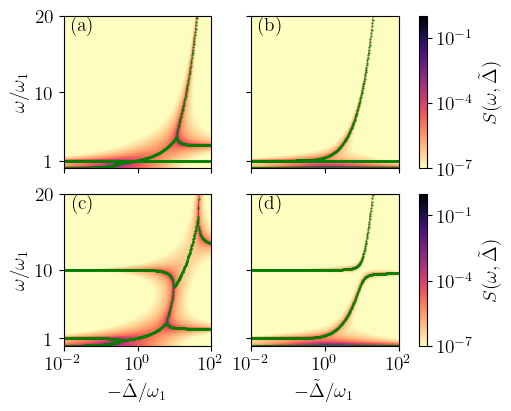

In [162]:
cmap = plt.colormaps['rainbow']
colorx = cmap(np.linspace(0, 1, 7))
discrete_cmap = colors.ListedColormap(colorx)

Zp1=np.loadtxt("All_phases_o2_by_o1_Z=1.0.txt")
Zp10=np.loadtxt("All_phases_o2_by_o1_Z=10.0.txt")
Zp0p1=np.loadtxt("All_phases_o2_by_o1_Z=0.1.txt")

Z_k1_o1o2_1=np.loadtxt("spectra_k1_o1o2_1.txt")
Z_k2_o1o2_1=np.loadtxt("spectra_k2_o1o2_1.txt")

Z_k1_o1o2_10=np.loadtxt("spectra_k1_o1o2_10.txt")
Z_k2_o1o2_10=np.loadtxt("spectra_k2_o1o2_10.txt")

Zsp1=np.loadtxt("stability_o2_by_o1=1.0.txt")
Zsp10=np.loadtxt("stability_o2_by_o1=10.0.txt")
Zsp0p1=np.loadtxt("stability_o2_by_o1=0.1.txt")

Xp=np.loadtxt("All_phases_o2_by_o1_line=1.0.txt")[:,0]
Gp1=np.loadtxt("All_phases_o2_by_o1_line=1.0.txt")[:,1]
Gp10=np.loadtxt("All_phases_o2_by_o1_line=10.0.txt")[:,1]
Gp0p1=np.loadtxt("All_phases_o2_by_o1_line=0.1.txt")[:,1]
G23p1=np.loadtxt("All_phases_o2_by_o1_line=1.0.txt")[:,2]
G23p10=np.loadtxt("All_phases_o2_by_o1_line=10.0.txt")[:,2]
G23p0p1=np.loadtxt("All_phases_o2_by_o1_line=0.1.txt")[:,2]

G_vec0=np.linspace(0.001,5,Nbins)*o1
Delta_t_vec0=np.linspace(-20,20,Nbins)*o1

cmap = plt.colormaps['rainbow']
colorx = cmap(np.linspace(0, 1, 7))
discrete_cmap = colors.ListedColormap(colorx)

cmap1 = plt.colormaps['Blues_r']
# cmap = plt.colormaps['rainbow']
colorx1 = cmap1(np.linspace(0, 1, 3))
discrete_cmap1 = colors.ListedColormap(colorx1)

cmap2='magma_r'#'hsv'#'gist_stern'

# Y=G_vec0/o1
# X=Delta_t_vec0/o1
Y=np.linspace(0.001,5,201)
X=np.linspace(-20,20,Nbins)
X,Y = np.meshgrid(X,Y)
X1,Y1 = np.meshgrid(-Delta_t_vec/o1,o_vec/o1)
# Subplots environment for clubbing and labelling multiple figures
import matplotlib.transforms as mtransforms
ncols=2;nrows=2
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(5, 4), sharex=True, sharey=True, layout="constrained")
plt.rc('font',**{'family':'serif','sans-serif':['Computer Modern Sans serif'],'size':14})
plt.rc('text', usetex=True)
# add an artist, in this case a nice label in the middle...
label_list=['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)','(i)']
# axs[1].set_ylim(1e-38,1e-29)
for row in range(nrows):
    for col in range(ncols):
        trans = mtransforms.ScaledTranslation(0.2, 0, fig.dpi_scale_trans)#-0.6 0
        # axs[row].annotate(label_list[row], (0.5, 0.5),transform=axs[row].transAxes+trans,ha='center', va='center', fontsize=14,color='black')
        axs[row,col].text(0.0, 1.0, label_list[col+row*ncols], transform=axs[row,col].transAxes + trans,
            fontsize='14', ha='center', va='top', fontfamily='serif',
            bbox=dict(facecolor='none', edgecolor='none', pad=-0.3))
# Adjust the padding between subplots
# plt.subplots_adjust(left=0.1, right=0.9, bottom=0.12, top=0.9, wspace=0.1, hspace=0.1)
# o2=0.1*o1
# Omega=2*( o1*G1*G1/(o1**2 + kp1**2) + o2*G2*G2/(o2**2 + kp2**2))
# im=axs[0,0].pcolormesh(X,Y,Zsp1, cmap=discrete_cmap1, shading='nearest')#,norm=colors.LogNorm()
# cbar=plt.colorbar(im, ax=axs[0,0], ticks=[2/3 - 1/3,4/3 - 1/3,2 - 1/3])#.set_label(r'Phases', fontsize=20)
# cbar.ax.set_yticklabels(['0', '1', '2'])
# # axs[0].pcolormesh(X,Y,Zsp0p1, cmap=discrete_cmap, shading='nearest')
# # plt.colorbar(im, ax=axs[0]).set_label(r'$N_{\rm stable}$')
# axs[0,0].plot(Xp,Gp1,'--',color='green')
# axs[0,0].plot(Xp,G23p1,'--',color='red')

# axs[0,1].pcolormesh(X,Y,Zp1, cmap=discrete_cmap, shading='nearest')#,norm=colors.LogNorm()
# axs[0,1].plot(Xp,Gp1,'--',color='green')
# axs[0,1].plot(Xp,G23p1,'--',color='red')

axs[0,0].pcolormesh(X1,Y1,Z_k1_o1o2_1, cmap=cmap2, shading='nearest',norm=colors.LogNorm(vmin=1e-7,vmax=1e0))
for i in range(6):
    axs[0,0].scatter(-parameter_vec/o1,np.real(eigvals_k1_o1o2_1[i,:])/o1,s=0.3,color='green')

im = axs[0,1].pcolormesh(X1,Y1,Z_k2_o1o2_1, cmap=cmap2, shading='nearest',norm=colors.LogNorm(vmin=1e-7,vmax=1e0))
plt.colorbar(im, ax=axs[0,1]).set_label(r'$S(\omega,\tilde{\Delta})$')
for i in range(6):
    axs[0,1].scatter(-parameter_vec/o1,np.real(eigvals_k2_o1o2_1[i,:])/o1,s=0.3,color='green')

# axs[1,0].pcolormesh(X,Y,Zsp10, cmap=discrete_cmap1, shading='nearest')#,norm=colors.LogNorm()
# axs[1,0].plot(Xp,Gp10,'--',color='green')
# axs[1,0].plot(Xp,G23p10,'--',color='red')

# im=axs[1,1].pcolormesh(X,Y,Zp10, cmap=discrete_cmap, shading='nearest')#,norm=colors.LogNorm()
# cbar=plt.colorbar(im, ax=axs[1,1], ticks=[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5])#.set_label(r'Phases', fontsize=20)
# cbar.ax.set_yticklabels(['1', '2', '3', '4', '5', '6', '7', '8'])
# axs[1,1].plot(Xp,Gp10,'--',color='green')
# axs[1,1].plot(Xp,G23p10,'--',color='red')

axs[1,0].pcolormesh(X1,Y1,Z_k1_o1o2_10, cmap=cmap2, shading='nearest',norm=colors.LogNorm(vmin=1e-7,vmax=1e0))
for i in range(6):
    axs[1,0].scatter(-parameter_vec/o1,np.real(eigvals_k1_o1o2_10[i,:])/o1,s=0.3,color='green')

# axs[1,3].pcolormesh(X1,Y1,Z_k2_o1o2_10, cmap='gist_stern', shading='nearest',norm=colors.LogNorm(vmin=1e-7,vmax=1e0))
im = axs[1,1].pcolormesh(X1,Y1,Z_k2_o1o2_10, cmap=cmap2, shading='nearest',norm=colors.LogNorm(vmin=1e-7,vmax=1e0))
plt.colorbar(im, ax=axs[1,1]).set_label(r'$S(\omega,\tilde{\Delta})$')
for i in range(6):
    axs[1,1].scatter(-parameter_vec/o1,np.real(eigvals_k2_o1o2_10[i,:])/o1,s=0.3,color='green')

for i in range(2):
    for j in range(2):
        # axs[i,j].set_xlim(Delta_t_vec0[0]/o1,Delta_t_vec0[-1]/o1)
        # axs[i,j].set_ylim(G_vec0[0]/o1,G_vec0[-1]/o1)
        axs[i,j].set_xlim(-parameter_vec[-1]/o1,-parameter_vec[0]/o1)
        axs[i,j].set_ylim(o_vec[0]/o1,o_vec[-1]/o1)
        axs[i,j].set_xscale("log")

# axs[1,2].set_xscale("log")
# axs[1,0].set_xlabel(r'$\tilde{\Delta}/\omega_1$')
# axs[1,1].set_xlabel(r'$\tilde{\Delta}/\omega_1$')
axs[1,0].set_xlabel(r'$-\tilde{\Delta}/\omega_1$')
axs[1,1].set_xlabel(r'$-\tilde{\Delta}/\omega_1$')
# axs[0,0].set_ylabel(r'$G$')
# axs[1,0].set_ylabel(r'$G$')
axs[0,0].set_ylabel(r'$\omega/\omega_1$')
axs[1,0].set_ylabel(r'$\omega/\omega_1$')
axs[0,0].set_yticks([1,10,20])
# axs[1].set_facecolor("black")

# axs[2].set_yscale("log")
# axs[1].set_yscale("log")
# axs[0].set_yscale("log")
# for i in range(2):
#     for j in range(2):
#         axs[i,j].set_yscale('log')
#         axs[i,j].set_ylim(1e-1,20)
# axs[0].legend(prop={'weight': 'normal', "size": 14, 'stretch': 'normal'},frameon=False, labelcolor='white')
# axs[1].legend(prop={'weight': 'normal', "size": 14, 'stretch': 'normal'},frameon=False, labelcolor='white')
# axs[2].legend(prop={'weight': 'normal', "size": 14, 'stretch': 'normal'},frameon=False, labelcolor='white')
# plt.tight_layout()
# plt.subplots_adjust(left=0.13, right=0.85, top=0.95, bottom=0.18, wspace=0.2, hspace=0.15)
# plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.savefig("spectrum_plot.png",dpi=400)
plt.plot()

[]

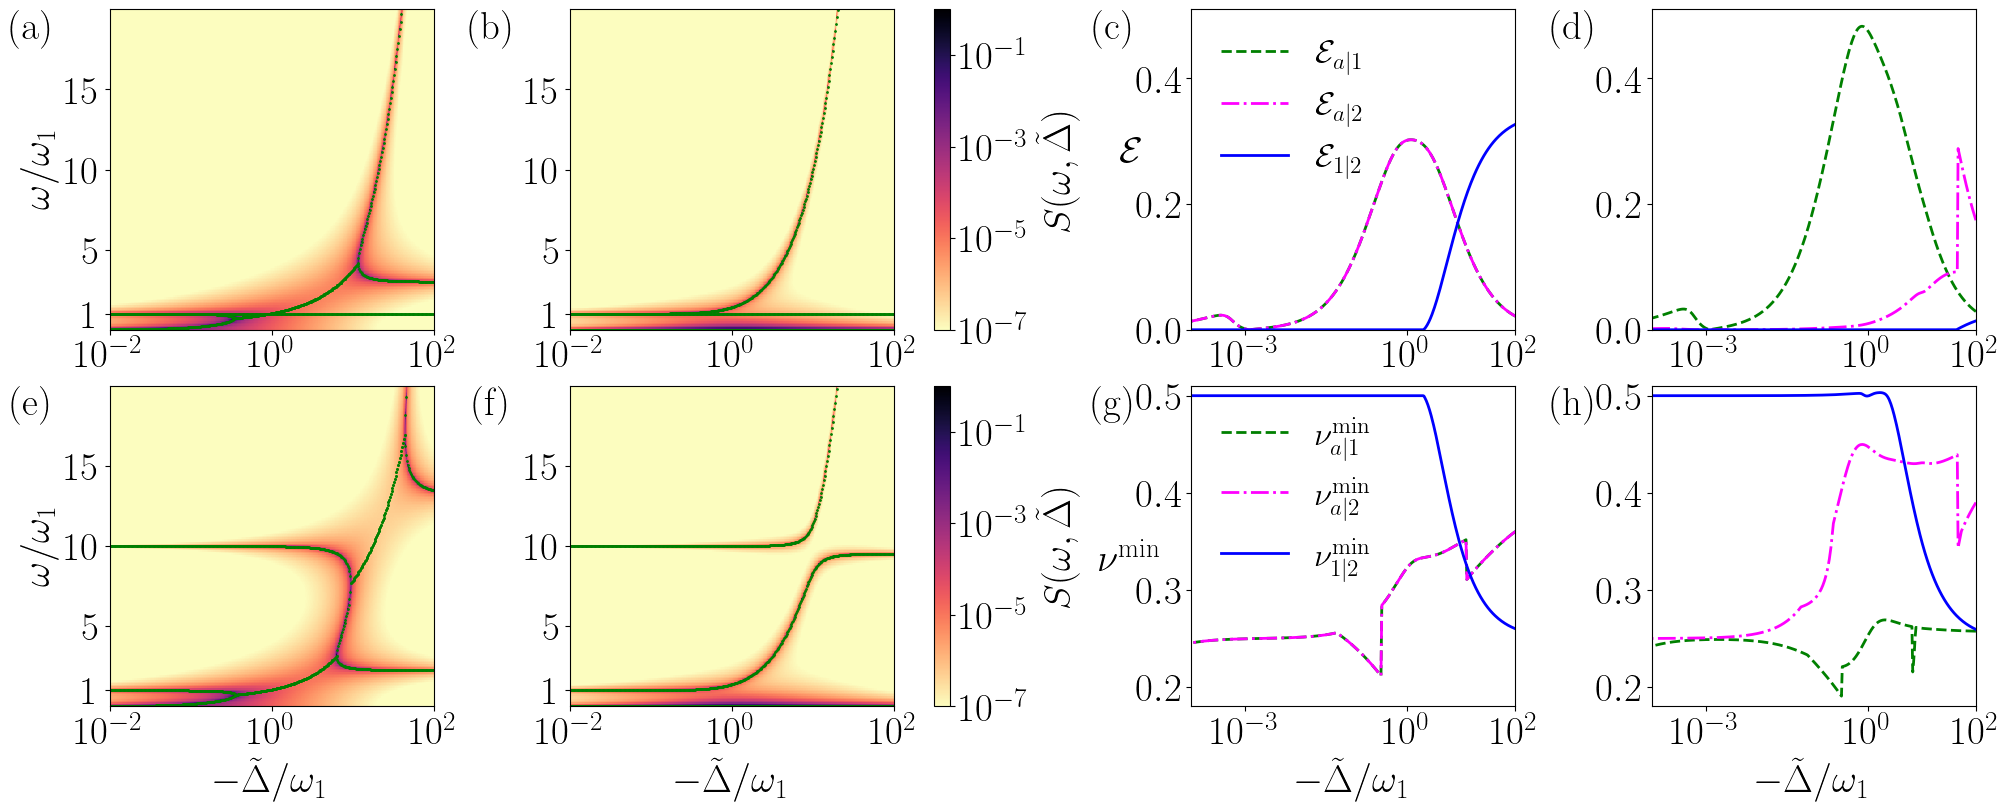

In [ ]:
cmap = plt.colormaps['rainbow']
colorx = cmap(np.linspace(0, 1, 7))
discrete_cmap = colors.ListedColormap(colorx)

Zp1=np.loadtxt("All_phases_o2_by_o1_Z=1.0.txt")
Zp10=np.loadtxt("All_phases_o2_by_o1_Z=10.0.txt")
Zp0p1=np.loadtxt("All_phases_o2_by_o1_Z=0.1.txt")

Z_k1_o1o2_1=np.loadtxt("spectra_k1_o1o2_1.txt")
Z_k2_o1o2_1=np.loadtxt("spectra_k2_o1o2_1.txt")

Z_k1_o1o2_10=np.loadtxt("spectra_k1_o1o2_10.txt")
Z_k2_o1o2_10=np.loadtxt("spectra_k2_o1o2_10.txt")

Zsp1=np.loadtxt("stability_o2_by_o1=1.0.txt")
Zsp10=np.loadtxt("stability_o2_by_o1=10.0.txt")
Zsp0p1=np.loadtxt("stability_o2_by_o1=0.1.txt")

Xp=np.loadtxt("All_phases_o2_by_o1_line=1.0.txt")[:,0]
Gp1=np.loadtxt("All_phases_o2_by_o1_line=1.0.txt")[:,1]
Gp10=np.loadtxt("All_phases_o2_by_o1_line=10.0.txt")[:,1]
Gp0p1=np.loadtxt("All_phases_o2_by_o1_line=0.1.txt")[:,1]
G23p1=np.loadtxt("All_phases_o2_by_o1_line=1.0.txt")[:,2]
G23p10=np.loadtxt("All_phases_o2_by_o1_line=10.0.txt")[:,2]
G23p0p1=np.loadtxt("All_phases_o2_by_o1_line=0.1.txt")[:,2]

G_vec0=np.linspace(0.001,5,Nbins)*o1
Delta_t_vec0=np.linspace(-20,20,Nbins)*o1

cmap = plt.colormaps['rainbow']
colorx = cmap(np.linspace(0, 1, 7))
discrete_cmap = colors.ListedColormap(colorx)

cmap1 = plt.colormaps['Blues_r']
# cmap = plt.colormaps['rainbow']
colorx1 = cmap1(np.linspace(0, 1, 3))
discrete_cmap1 = colors.ListedColormap(colorx1)

cmap2='magma_r'#'hsv'#'gist_stern'

# Y=G_vec0/o1
# X=Delta_t_vec0/o1
Y=np.linspace(0.001,5,201)
X=np.linspace(-20,20,Nbins)
X,Y = np.meshgrid(X,Y)
X1,Y1 = np.meshgrid(-Delta_t_vec/o1,o_vec/o1)
# Subplots environment for clubbing and labelling multiple figures
import matplotlib.transforms as mtransforms
ncols=4;nrows=2
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(20, 8), sharex=False, sharey=False, layout="constrained")
plt.rc('font',**{'family':'serif','sans-serif':['Computer Modern Sans serif'],'size':28})
plt.rc('text', usetex=True)
# add an artist, in this case a nice label in the middle...
label_list=['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)','(i)']
# axs[1].set_ylim(1e-38,1e-29)
for row in range(nrows):
    for col in range(ncols):
        trans = mtransforms.ScaledTranslation(0.2, 0, fig.dpi_scale_trans)#-0.6 0
        # axs[row].annotate(label_list[row], (0.5, 0.5),transform=axs[row].transAxes+trans,ha='center', va='center', fontsize=14,color='black')
        axs[row,col].text(-0.3, 1.0, label_list[col+row*ncols], transform=axs[row,col].transAxes + trans,
            fontsize='28', ha='center', va='top', fontfamily='serif',
            bbox=dict(facecolor='none', edgecolor='none', pad=-0.3))
# Adjust the padding between subplots
# plt.subplots_adjust(left=0.1, right=0.9, bottom=0.12, top=0.9, wspace=0.1, hspace=0.1)
# o2=0.1*o1
# Omega=2*( o1*G1*G1/(o1**2 + kp1**2) + o2*G2*G2/(o2**2 + kp2**2))
# im=axs[0,0].pcolormesh(X,Y,Zsp1, cmap=discrete_cmap1, shading='nearest')#,norm=colors.LogNorm()
# cbar=plt.colorbar(im, ax=axs[0,0], ticks=[2/3 - 1/3,4/3 - 1/3,2 - 1/3])#.set_label(r'Phases', fontsize=20)
# cbar.ax.set_yticklabels(['0', '1', '2'])
# # axs[0].pcolormesh(X,Y,Zsp0p1, cmap=discrete_cmap, shading='nearest')
# # plt.colorbar(im, ax=axs[0]).set_label(r'$N_{\rm stable}$')
# axs[0,0].plot(Xp,Gp1,'--',color='green')
# axs[0,0].plot(Xp,G23p1,'--',color='red')

# axs[0,1].pcolormesh(X,Y,Zp1, cmap=discrete_cmap, shading='nearest')#,norm=colors.LogNorm()
# axs[0,1].plot(Xp,Gp1,'--',color='green')
# axs[0,1].plot(Xp,G23p1,'--',color='red')
lw0=2
axs[0,2].plot(Xpline,Entanglement_max_phDw,linestyle='dashed',lw=lw0,color='green',label=r'$\mathcal{E}_{a|1}$')
axs[0,2].plot(Xpline,Entanglement_max_phDw1,linestyle='dashdot',lw=lw0,color='magenta',label=r'$\mathcal{E}_{a|2}$')
axs[0,2].plot(Xpline,Entanglement_max_DwDw,color='blue',lw=lw0,label=r'$\mathcal{E}_{1|2}$')
axs[0,2].set_xscale("log")
# axs[0,2].set_yscale("log")

axs[0,3].plot(Xpline,Entanglement_max_phDw_10,linestyle='dashed',lw=lw0,color='green',label=r'$\mathcal{E}_{a|1}$')
axs[0,3].plot(Xpline,Entanglement_max_phDw1_10,linestyle='dashdot',lw=lw0,color='magenta',label=r'$\mathcal{E}_{a|2}$')
axs[0,3].plot(Xpline,Entanglement_max_DwDw_10,color='blue',lw=lw0,label=r'$\mathcal{E}_{1|2}$')
axs[0,3].set_xscale("log")

axs[1,2].plot(Xpline,Squeezing_min_phDw,linestyle='dashed',lw=lw0,color='green',label=r'$\nu_{a|1}^{\rm{min}}$')
axs[1,2].plot(Xpline,Squeezing_min_phDw1,linestyle='dashdot',lw=lw0,color='magenta',label=r'$\nu_{a|2}^{\rm{min}}$')
axs[1,2].plot(Xpline,Squeezing_min_DwDw,color='blue',lw=lw0,label=r'$\nu_{1|2}^{\rm{min}}$')
axs[1,2].set_xscale("log")

axs[1,3].plot(Xpline,Squeezing_min_phDw_10,linestyle='dashed',lw=lw0,color='green',label=r'$\nu_{a|1}^{\rm{min}}$')
axs[1,3].plot(Xpline,Squeezing_min_phDw1_10,linestyle='dashdot',lw=lw0,color='magenta',label=r'$\nu_{a|2}^{\rm{min}}$')
axs[1,3].plot(Xpline,Squeezing_min_DwDw_10,color='blue',lw=lw0,label=r'$\nu_{1|2}^{\rm{min}}$')
axs[1,3].set_xscale("log")

s0=1
axs[0,0].pcolormesh(X1,Y1,Z_k1_o1o2_1, cmap=cmap2, shading='nearest',norm=colors.LogNorm(vmin=1e-7,vmax=1e0))
for i in range(6):
    axs[0,0].scatter(-parameter_vec/o1,np.real(eigvals_k1_o1o2_1[i,:])/o1,s=s0,color='green')

im = axs[0,1].pcolormesh(X1,Y1,Z_k2_o1o2_1, cmap=cmap2, shading='nearest',norm=colors.LogNorm(vmin=1e-7,vmax=1e0))
plt.colorbar(im, ax=axs[0,1]).set_label(r'$S(\omega,\tilde{\Delta})$')
for i in range(6):
    axs[0,1].scatter(-parameter_vec/o1,np.real(eigvals_k2_o1o2_1[i,:])/o1,s=s0,color='green')

# axs[1,0].pcolormesh(X,Y,Zsp10, cmap=discrete_cmap1, shading='nearest')#,norm=colors.LogNorm()
# axs[1,0].plot(Xp,Gp10,'--',color='green')
# axs[1,0].plot(Xp,G23p10,'--',color='red')

# im=axs[1,1].pcolormesh(X,Y,Zp10, cmap=discrete_cmap, shading='nearest')#,norm=colors.LogNorm()
# cbar=plt.colorbar(im, ax=axs[1,1], ticks=[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5])#.set_label(r'Phases', fontsize=20)
# cbar.ax.set_yticklabels(['1', '2', '3', '4', '5', '6', '7', '8'])
# axs[1,1].plot(Xp,Gp10,'--',color='green')
# axs[1,1].plot(Xp,G23p10,'--',color='red')

axs[1,0].pcolormesh(X1,Y1,Z_k1_o1o2_10, cmap=cmap2, shading='nearest',norm=colors.LogNorm(vmin=1e-7,vmax=1e0))
for i in range(6):
    axs[1,0].scatter(-parameter_vec/o1,np.real(eigvals_k1_o1o2_10[i,:])/o1,s=s0,color='green')

# axs[1,3].pcolormesh(X1,Y1,Z_k2_o1o2_10, cmap='gist_stern', shading='nearest',norm=colors.LogNorm(vmin=1e-7,vmax=1e0))
im = axs[1,1].pcolormesh(X1,Y1,Z_k2_o1o2_10, cmap=cmap2, shading='nearest',norm=colors.LogNorm(vmin=1e-7,vmax=1e0))
plt.colorbar(im, ax=axs[1,1]).set_label(r'$S(\omega,\tilde{\Delta})$')
for i in range(6):
    axs[1,1].scatter(-parameter_vec/o1,np.real(eigvals_k2_o1o2_10[i,:])/o1,s=s0,color='green')

for i in range(2):
    for j in range(2):
        # axs[i,j].set_xlim(Delta_t_vec0[0]/o1,Delta_t_vec0[-1]/o1)
        # axs[i,j].set_ylim(G_vec0[0]/o1,G_vec0[-1]/o1)
        axs[i,j].set_xlim(-parameter_vec[-1]/o1,-parameter_vec[0]/o1)
        axs[i,j].set_ylim(o_vec[0]/o1,o_vec[-1]/o1)
        axs[i,j].set_xscale("log")
        # axs[i,j].set_yscale("log")
        axs[i,j].set_yticks([1,5,10,15])
        # axs[i,j].set_ylim(1e-2,20)

for i in range(2):
    for j in range(2,4):
        # axs[i,j].set_xlim(Delta_t_vec0[0]/o1,Delta_t_vec0[-1]/o1)
        # axs[i,j].set_ylim(G_vec0[0]/o1,G_vec0[-1]/o1)
        axs[i,j].set_xlim(-parameter_vec[-1]/o1,-parameter_vec[0]/o1)
        # axs[i,j].set_ylim(o_vec[0]/o1,o_vec[-1]/o1)
        axs[i,j].set_xscale("log")

# axs[1,2].set_xscale("log")
# axs[1,0].set_xlabel(r'$\tilde{\Delta}/\omega_1$')
# axs[1,1].set_xlabel(r'$\tilde{\Delta}/\omega_1$')
axs[1,0].set_xlabel(r'$-\tilde{\Delta}/\omega_1$')
axs[1,1].set_xlabel(r'$-\tilde{\Delta}/\omega_1$')
axs[1,2].set_xlabel(r'$-\tilde{\Delta}/\omega_1$')
axs[1,3].set_xlabel(r'$-\tilde{\Delta}/\omega_1$')
# axs[0,0].set_ylabel(r'$G$')
# axs[1,0].set_ylabel(r'$G$')
axs[0,0].set_ylabel(r'$\omega/\omega_1$')
axs[1,0].set_ylabel(r'$\omega/\omega_1$')
# axs[1].set_facecolor("black")

axs[0,2].set_ylabel(r'$\mathcal{E}$',fontsize=28,rotation=0)
axs[1,2].set_ylabel(r'$\nu^{\rm{min}}$',fontsize=28,rotation=0)
axs[1,2].yaxis.label.set_position((0, 0.4)) 
# axs[0,0].set_xticks([1e-3,1e-2,1e-1,1,10,1e2])
# axs[1,0].set_xticks([1e-3,1e-2,1e-1,1,10,1e2])
# axs[0,1].set_xticks([1e-3,1e-2,1e-1,1,10,1e2])
# axs[1,1].set_xticks([1e-3,1e-2,1e-1,1,10,1e2])
axs[1,3].set_xticks([1e-3,1,1e2])
axs[1,2].set_xticks([1e-3,1,1e2])
axs[0,2].set_xticks([1e-3,1,1e2])
axs[0,3].set_xticks([1e-3,1,1e2])
axs[0,2].set_xlim(1e-4,1e2)
axs[1,2].set_xlim(1e-4,1e2)
axs[0,3].set_xlim(1e-4,1e2)
axs[1,3].set_xlim(1e-4,1e2)
axs[0,2].set_ylim(0,0.51)
axs[1,2].set_ylim(0.18,0.51)
axs[0,3].set_ylim(0,0.51)
axs[1,3].set_ylim(0.18,0.51)

axs[0,2].legend(prop={'weight': 'normal', "size": 24, 'stretch': 'normal'},frameon=False)#, labelcolor='white')
axs[1,2].legend(prop={'weight': 'normal', "size": 24, 'stretch': 'normal'},frameon=False)

# axs[2].set_yscale("log")
# axs[1].set_yscale("log")
# axs[0].set_yscale("log")
# for i in range(2):
#     for j in range(2):
#         axs[i,j].set_yscale('log')
#         axs[i,j].set_ylim(1e-1,20)
# axs[0].legend(prop={'weight': 'normal', "size": 14, 'stretch': 'normal'},frameon=False, labelcolor='white')
# axs[1].legend(prop={'weight': 'normal', "size": 14, 'stretch': 'normal'},frameon=False, labelcolor='white')
# axs[2].legend(prop={'weight': 'normal', "size": 14, 'stretch': 'normal'},frameon=False, labelcolor='white')
# plt.tight_layout()
# plt.subplots_adjust(left=0.13, right=0.85, top=0.95, bottom=0.18, wspace=0.2, hspace=0.15)
# plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.savefig("spectrum_ent_squeez_plot.png",dpi=400)
plt.plot()

[]

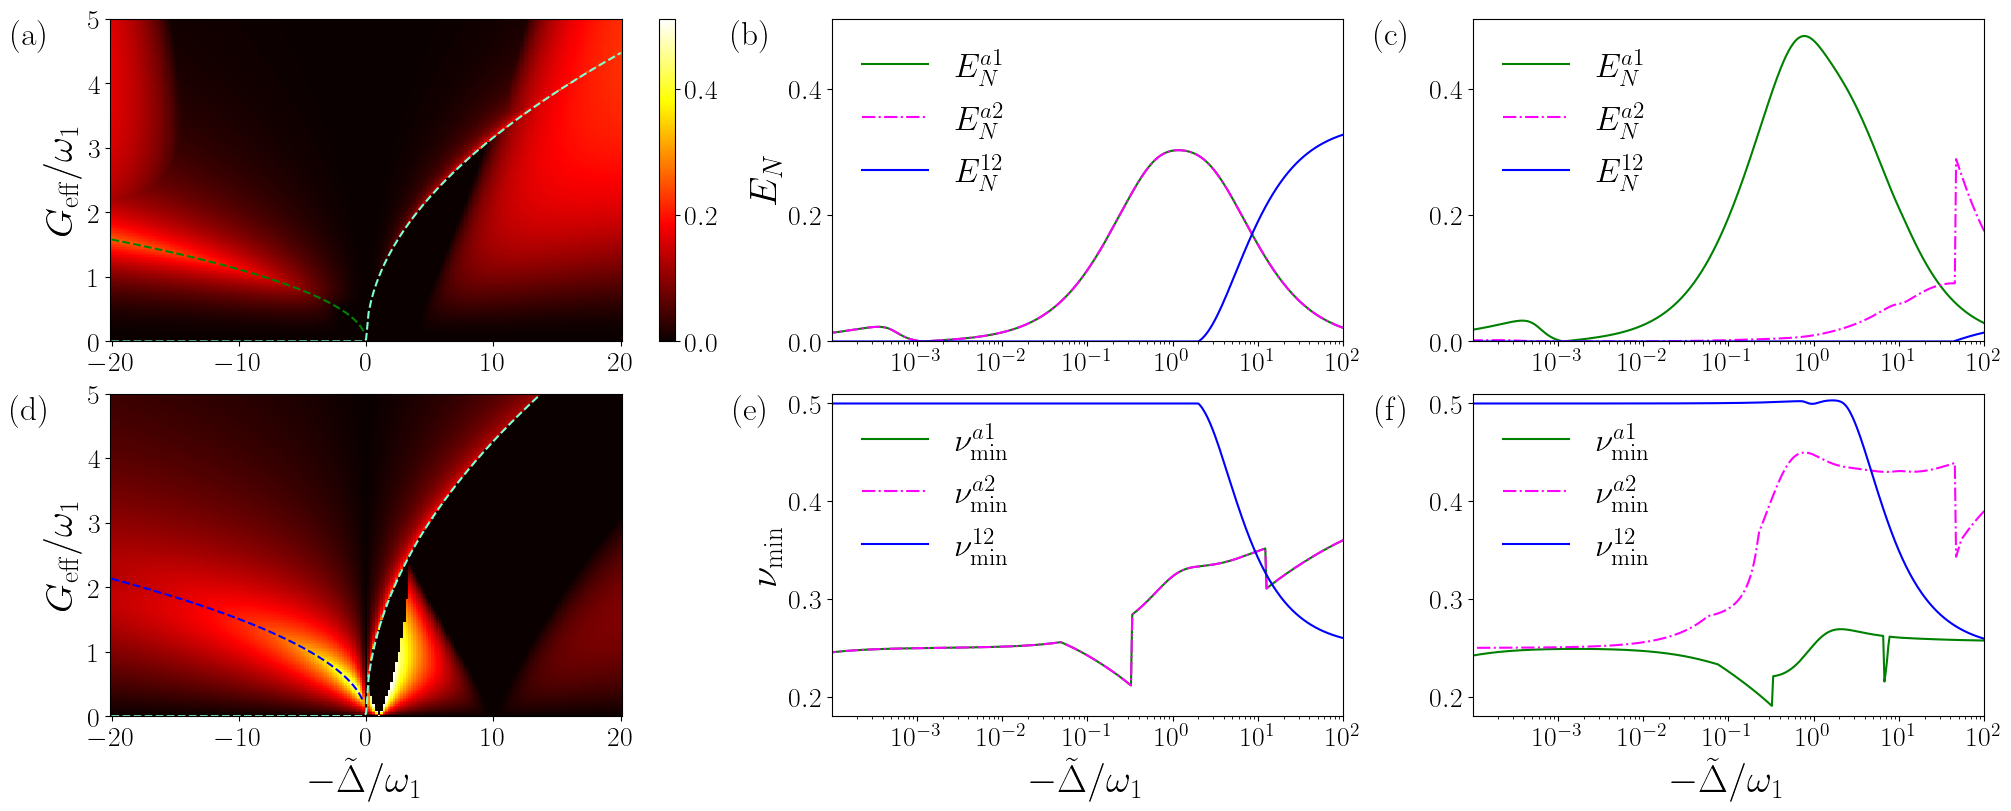

In [6]:
ZEabp1=np.loadtxt("Entab_max_o2_by_o1=1.0.txt")
ZEabp10=np.loadtxt("Entab_max_o2_by_o1=10.0.txt")
ZEabp0p1=np.loadtxt("Entab_max_o2_by_o1=0.1.txt")
ZE12p1=np.loadtxt("Ent12_max_o2_by_o1=1.0.txt")
ZE12p10=np.loadtxt("Entab2_max_o2_by_o1=10.0.txt")
ZE12p0p1=np.loadtxt("Ent12_max_o2_by_o1=0.1.txt")

ZSabp1=np.loadtxt("Squeeab_min_o2_by_o1=1.0.txt")
ZSabp10=np.loadtxt("Squeeab_min_o2_by_o1=10.0.txt")
ZSabp0p1=np.loadtxt("Squeeab_min_o2_by_o1=0.1.txt")
ZS12p1=np.loadtxt("Squee12_min_o2_by_o1=1.0.txt")
ZS12p10=np.loadtxt("Squee12_min_o2_by_o1=10.0.txt")
ZS12p0p1=np.loadtxt("Squee12_min_o2_by_o1=0.1.txt")

Xp=np.loadtxt("All_phases_o2_by_o1_line=1.0.txt")[:,0]
Gp1=np.loadtxt("All_phases_o2_by_o1_line=1.0.txt")[:,1]
Gp10=np.loadtxt("All_phases_o2_by_o1_line=10.0.txt")[:,1]
Gp0p1=np.loadtxt("All_phases_o2_by_o1_line=0.1.txt")[:,1]
G23p1=np.loadtxt("All_phases_o2_by_o1_line=1.0.txt")[:,2]
G23p10=np.loadtxt("All_phases_o2_by_o1_line=10.0.txt")[:,2]
G23p0p1=np.loadtxt("All_phases_o2_by_o1_line=0.1.txt")[:,2]

line_data=np.loadtxt("Ent_o2_by_o1_line=1.0.txt")
Xpline=line_data[:,0]
Entanglement_max_phDw=line_data[:,1]
Entanglement_max_phDw1=line_data[:,2]
Entanglement_max_DwDw=line_data[:,3]
Squeezing_min_phDw=line_data[:,4]
Squeezing_min_phDw1=line_data[:,5]
Squeezing_min_DwDw=line_data[:,6]

line_data10=np.loadtxt("Ent_o2_by_o1_line=10.0.txt")
# Xpline=line_data[:,0]
Entanglement_max_phDw_10=line_data10[:,1]
Entanglement_max_phDw1_10=line_data10[:,2]
Entanglement_max_DwDw_10=line_data10[:,3]
Squeezing_min_phDw_10=line_data10[:,4]
Squeezing_min_phDw1_10=line_data10[:,5]
Squeezing_min_DwDw_10=line_data10[:,6]

Y=np.linspace(0.001,5,201)
X=np.linspace(-20,20,Nbins)
X0=X
Y0=Y
X,Y = np.meshgrid(X,Y)
# Subplots environment for clubbing and labelling multiple figures
import matplotlib.transforms as mtransforms
ncols=3;nrows=2
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(20, 8),layout="constrained", sharex=False)#, sharey=True);,layout="constrained"
plt.rc('font',**{'family':'serif','sans-serif':['Computer Modern Sans serif'],'size':20})
plt.rc('text', usetex=True)
# add an artist, in this case a nice label in the middle...
label_list=['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)']
# axs[1].set_ylim(1e-38,1e-29)
for row in range(nrows):
    for col in range(ncols):
        trans = mtransforms.ScaledTranslation(-0.8, 0, fig.dpi_scale_trans)
        # axs[row].annotate(label_list[row], (0.5, 0.5),transform=axs[row].transAxes+trans,ha='center', va='center', fontsize=14,color='black')
        axs[row,col].text(0.0, 1.0, label_list[col+row*ncols], transform=axs[row,col].transAxes + trans,
            fontsize='24', ha='center', va='top', fontfamily='serif',
            bbox=dict(facecolor='1', edgecolor='none', pad=0.3))
# Adjust the padding between subplots
# plt.subplots_adjust(left=0.1, right=0.9, bottom=0.12, top=0.9, wspace=0.1, hspace=0.1)

axs[0,0].pcolormesh(X,Y,ZE12p1, cmap='hot', shading='nearest',vmin=0,vmax=0.51)#,norm=colors.LogNorm(vmin=1,vmax=1e8))
axs[0,0].plot(X0,Gp1,'--',color='green')
axs[0,0].plot(X0,G23p1,'--',color='aquamarine')
# axs[0,0].set_xscale("log")

# im1=axs[0,1].pcolormesh(X,Y,ZE12p10, cmap='hot', shading='nearest',vmin=0,vmax=0.51)#,norm=colors.LogNorm(vmin=1,vmax=1e8))
# # axs[0,1].colorbar(im, ax=axes).set_label(r'$E^{\rm max}_N$')#, fontsize=18)
# fig.colorbar(im1, ax=axs[0,1])#.set_label(r'$E^{\rm max}_N$')#, fontsize=14)
# axs[0,1].plot(X0,Gp10,'--',color='blue')
# axs[0,1].plot(X0,G23p10,'--',color='aquamarine')
# # axs[0,1].set_xscale("log")

axs[0,1].plot(Xpline,Entanglement_max_phDw,color='green',label=r'$E^{a1}_N$')
axs[0,1].plot(Xpline,Entanglement_max_phDw1,linestyle='dashdot',color='magenta',label=r'$E^{a2}_N$')
axs[0,1].plot(Xpline,Entanglement_max_DwDw,color='blue',label=r'$E^{12}_N$')
axs[0,1].set_xscale("log")
# axs[0,2].set_yscale("log")

axs[0,2].plot(Xpline,Entanglement_max_phDw_10,color='green',label=r'$E^{a1}_N$')
axs[0,2].plot(Xpline,Entanglement_max_phDw1_10,linestyle='dashdot',color='magenta',label=r'$E^{a2}_N$')
axs[0,2].plot(Xpline,Entanglement_max_DwDw_10,color='blue',label=r'$E^{12}_N$')
axs[0,2].set_xscale("log")

# axs[1,0].pcolormesh(X,Y,ZEabp1, cmap='hot', shading='nearest',vmin=0,vmax=0.51)#,norm=colors.LogNorm(vmin=1,vmax=1e8))
# axs[1,0].plot(X0,Gp1,'--',color='green')
# axs[1,0].plot(X0,G23p1,'--',color='aquamarine')
# axs[1,0].set_xscale("log")

im2=axs[1,0].pcolormesh(X,Y,ZEabp10, cmap='hot', shading='nearest',vmin=0,vmax=0.51)#,norm=colors.LogNorm(vmin=1,vmax=1e8))
# axs[1,1].colorbar(im, ax=axes).set_label(r'$\nu_{\rm min}$')
fig.colorbar(im2, ax=axs[0,0])#.set_label(r'$\nu_{\rm min}$')#, fontsize=14)
axs[1,0].plot(X0,Gp10,'--',color='blue')
axs[1,0].plot(X0,G23p10,'--',color='aquamarine')
# axs[1,1].set_xscale("log")

axs[1,1].plot(Xpline,Squeezing_min_phDw,color='green',label=r'$\nu^{a1}_{\rm min}$')
axs[1,1].plot(Xpline,Squeezing_min_phDw1,linestyle='dashdot',color='magenta',label=r'$\nu^{a2}_{\rm min}$')
axs[1,1].plot(Xpline,Squeezing_min_DwDw,color='blue',label=r'$\nu^{12}_{\rm min}$')
axs[1,1].set_xscale("log")

axs[1,2].plot(Xpline,Squeezing_min_phDw_10,color='green',label=r'$\nu^{a1}_{\rm min}$')
axs[1,2].plot(Xpline,Squeezing_min_phDw1_10,linestyle='dashdot',color='magenta',label=r'$\nu^{a2}_{\rm min}$')
axs[1,2].plot(Xpline,Squeezing_min_DwDw_10,color='blue',label=r'$\nu^{12}_{\rm min}$')
axs[1,2].set_xscale("log")

# axs[0].set_xlim(-parameter_vec[-1]/o1,-parameter_vec[0]/o1)
# axs[2].set_ylim(o_vec[0]/o1,o_vec[-1]/o1)
# axs[1].set_ylim(o_vec[0]/o1,o_vec[-1]/o1)
# axs[0].set_ylim(o_vec[0]/o1,o_vec[-1]/o1)
axs[1,0].set_xlabel(r'$-\tilde{\Delta}/\omega_1$',fontsize=28)
axs[1,1].set_xlabel(r'$-\tilde{\Delta}/\omega_1$',fontsize=28)
axs[1,2].set_xlabel(r'$-\tilde{\Delta}/\omega_1$',fontsize=28)
# axs[1,3].set_xlabel(r'$-\tilde{\Delta}/\omega_1$',fontsize=28)
axs[1,0].set_ylabel(r'$G_{\rm eff}/\omega_1$',fontsize=28)
axs[0,0].set_ylabel(r'$G_{\rm eff}/\omega_1$',fontsize=28)
axs[0,1].set_ylabel(r'$E_N$',fontsize=28)
axs[1,1].set_ylabel(r'$\nu_{\rm min}$',fontsize=28)
axs[0,1].set_xticks([1e-3,1e-2,1e-1,1,10,1e2])
axs[1,1].set_xticks([1e-3,1e-2,1e-1,1,10,1e2])
axs[0,2].set_xticks([1e-3,1e-2,1e-1,1,10,1e2])
axs[1,2].set_xticks([1e-3,1e-2,1e-1,1,10,1e2])
axs[0,1].set_xlim(1e-4,1e2)
axs[1,1].set_xlim(1e-4,1e2)
axs[0,2].set_xlim(1e-4,1e2)
axs[1,2].set_xlim(1e-4,1e2)
axs[0,1].set_ylim(0,0.51)
axs[1,1].set_ylim(0.18,0.51)
axs[0,2].set_ylim(0,0.51)
axs[1,2].set_ylim(0.18,0.51)

axs[0,0].set_ylim(0,5);axs[1,0].set_ylim(0,5)
# axs[1].set_facecolor("black")

# axs[2].set_yscale("log")
# axs[1].set_yscale("log")
# axs[0].set_xscale("log")
# axs[0].set_xticks([0.1,1,10,100])
axs[0,1].legend(prop={'weight': 'normal', "size": 24, 'stretch': 'normal'},frameon=False)#, labelcolor='white')
axs[1,1].legend(prop={'weight': 'normal', "size": 24, 'stretch': 'normal'},frameon=False)
axs[0,2].legend(prop={'weight': 'normal', "size": 24, 'stretch': 'normal'},frameon=False)#, labelcolor='white')
axs[1,2].legend(prop={'weight': 'normal', "size": 24, 'stretch': 'normal'},frameon=False)
# axs[1].legend(prop={'weight': 'normal', "size": 14, 'stretch': 'normal'},frameon=False, labelcolor='white')
# axs[2].legend(prop={'weight': 'normal', "size": 14, 'stretch': 'normal'},frameon=False, labelcolor='white')
# plt.tight_layout()
# plt.savefig("entangled_phases_2x4.png",dpi=400)
plt.plot()

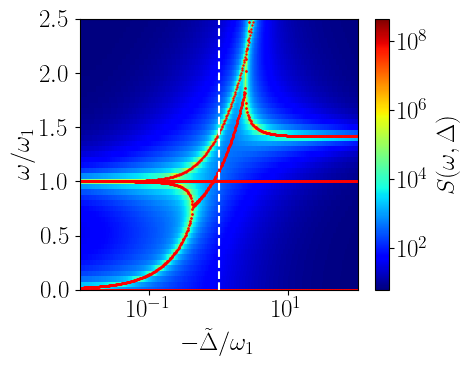

In [44]:
X=-parameter_vec/o1
Y=o_vec/o1

plt.figure(figsize=(5, 4))
plt.rc('font',**{'family':'serif','sans-serif':['Computer Modern Sans serif'],'size':18})
plt.rc('text', usetex=True)
axes = plt.axes()
# axes.plot(Xd,5*np.ones(len(Xd)),'--',color='red')
# plt.axvline(x=0.2, color="green", linestyle="--")
X,Y = np.meshgrid(X,Y)
im = axes.pcolormesh(X,Y,Z0+Z1+Z2, cmap='jet', shading='nearest',norm=colors.LogNorm())#,vmin=0,vmax=10
#fig.colorbar(im, ax=axes, ticks=np.arange(10000)).set_label(r'$\frac{\zeta_{opt}(r=0,\theta=0)}{\zeta_{opt}(r,\theta)}$', fontsize=20)
plt.colorbar(im, ax=axes).set_label(r'$S(\omega,\Delta)$')
for i in range(6):
    plt.scatter(-parameter_vec/o1,eigvals0[i,:]/o1,s=0.5,color='red')
    plt.scatter(-parameter_vec/o1,eigvals1[i,:]/o1,s=0.5,color='red')
    plt.scatter(-parameter_vec/o1,eigvals2[i,:]/o1,s=0.5,color='red')
axes.set_xlabel(r'$-\tilde{\Delta}/\omega_1$')
axes.set_ylabel(r'$\omega/\omega_1$')
plt.axvline(x=1,linestyle='dashed',color='white')
axes.set_facecolor("black")
#plt.xticks(np.arange(0, 1, step=0.2))
plt.xscale('log')
# plt.legend(frameon=False, fontsize=12, labelcolor='white')
# plt.ylim(parameter_vec0[0]/o1,parameter_vec0[-1]/o1)
plt.ylim(0,o_vec[-1]/o1)
plt.tight_layout()
# plt.savefig("Phases_old.png", dpi=400)
plt.show()

TypeError: Dimensions of C (101, 401) are incompatible with X (201) and/or Y (101); see help(pcolormesh)

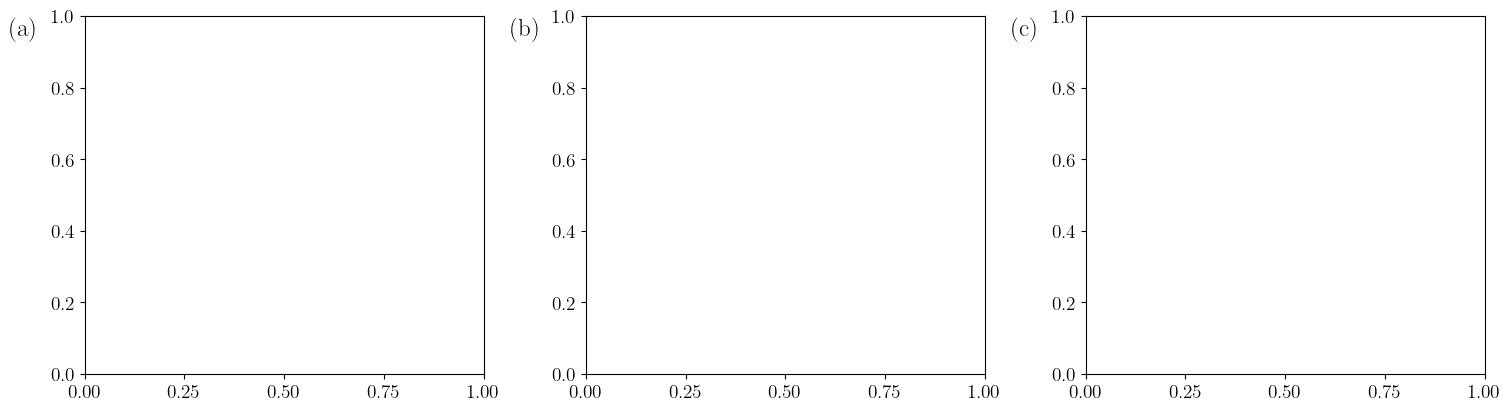

In [3]:
Z0=np.loadtxt("spectra_o2_by_o1=1.0.txt")
Z1=np.loadtxt("spectra_o2_by_o1=1by3.txt")
Z2=np.loadtxt("spectra_o2_by_o1=1.5.txt")
mark_color='violet'

Y=o_vec/o1
X=-parameter_vec/o1
X,Y = np.meshgrid(X,Y)
# Subplots environment for clubbing and labelling multiple figures
import matplotlib.transforms as mtransforms
ncols=3;nrows=1
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(15, 4),layout="constrained", sharex=True)#, sharey=True);,layout="constrained"
plt.rc('font',**{'family':'serif','sans-serif':['Computer Modern Sans serif'],'size':20})
plt.rc('text', usetex=True)
# add an artist, in this case a nice label in the middle...
label_list=['(a)','(b)','(c)','(d)']
# axs[1].set_ylim(1e-38,1e-29)
for row in range(nrows):
    for col in range(ncols):
        trans = mtransforms.ScaledTranslation(-0.6, 0, fig.dpi_scale_trans)
        # axs[row].annotate(label_list[row], (0.5, 0.5),transform=axs[row].transAxes+trans,ha='center', va='center', fontsize=14,color='black')
        axs[col].text(0.0, 1.0, label_list[col], transform=axs[col].transAxes + trans,
            fontsize='18', ha='center', va='top', fontfamily='serif',
            bbox=dict(facecolor='1', edgecolor='none', pad=0.3))
# Adjust the padding between subplots
# plt.subplots_adjust(left=0.1, right=0.9, bottom=0.12, top=0.9, wspace=0.1, hspace=0.1)

axs[0].pcolormesh(X,Y,Z0, cmap='jet', shading='nearest',norm=colors.LogNorm(vmin=1,vmax=1e8))
for i in range(6):
    axs[0].scatter(-parameter_vec/o1,eigvals0[i,:]/o1,s=0.5,color='red')
axs[0].plot(-parameter_vec/o1,np.ones(len(parameter_vec)),linestyle='dashed',color=mark_color)
axs[0].plot(-parameter_vec/o1,(-parameter_vec/o1),linestyle='dashed',color=mark_color)

axs[1].pcolormesh(X,Y,Z1, cmap='jet', shading='nearest',norm=colors.LogNorm(vmin=1,vmax=1e8))
for i in range(6):
    axs[1].scatter(-parameter_vec/o1,eigvals1[i,:]/o1,s=0.5,color='red')
axs[1].plot(-parameter_vec/o1,np.ones(len(parameter_vec)),linestyle='dashed',color=mark_color)
axs[1].plot(-parameter_vec/o1,(-parameter_vec/o1),linestyle='dashed',color=mark_color)
axs[1].plot(-parameter_vec/o1,np.ones(len(parameter_vec))/3,linestyle='dashed',color=mark_color)

axs[2].pcolormesh(X,Y,Z2, cmap='jet', shading='nearest',norm=colors.LogNorm(vmin=1,vmax=1e8))
plt.colorbar(im, ax=axs[2]).set_label(r'$S(\omega,\Delta)$')
for i in range(6):
    axs[2].scatter(-parameter_vec/o1,eigvals2[i,:]/o1,s=0.5,color='red')
axs[2].plot(-parameter_vec/o1,np.ones(len(parameter_vec)),linestyle='dashed',color=mark_color)
axs[2].plot(-parameter_vec/o1,(-parameter_vec/o1),linestyle='dashed',color=mark_color)
axs[2].plot(-parameter_vec/o1,np.ones(len(parameter_vec))*1.5,linestyle='dashed',color=mark_color)

# axs[0].set_xlim(-parameter_vec[-1]/o1,-parameter_vec[0]/o1)
axs[2].set_ylim(o_vec[0]/o1,o_vec[-1]/o1)
axs[1].set_ylim(o_vec[0]/o1,o_vec[-1]/o1)
axs[0].set_ylim(o_vec[0]/o1,o_vec[-1]/o1)
axs[0].set_xlabel(r'$-\tilde{\Delta}/\omega_1$')
axs[1].set_xlabel(r'$-\tilde{\Delta}/\omega_1$')
axs[2].set_xlabel(r'$-\tilde{\Delta}/\omega_1$')
axs[0].set_ylabel(r'$\omega/\omega_B$')
# axs[1].set_facecolor("black")

# axs[2].set_yscale("log")
# axs[1].set_yscale("log")
axs[0].set_xscale("log")
axs[0].set_xticks([0.1,1,10,100])
# axs[0].legend(prop={'weight': 'normal', "size": 14, 'stretch': 'normal'},frameon=False, labelcolor='white')
# axs[1].legend(prop={'weight': 'normal', "size": 14, 'stretch': 'normal'},frameon=False, labelcolor='white')
# axs[2].legend(prop={'weight': 'normal', "size": 14, 'stretch': 'normal'},frameon=False, labelcolor='white')
# plt.tight_layout()
# plt.savefig("spectra.png",dpi=400)
plt.plot()

In [122]:
rng = np.random.default_rng()
questions=np.arange(1,25)
rng.shuffle(questions)
list=['Sudipto','Yeshma','Sooryansh','Rahul']
for i in range(4):
    print(list[i],"=",questions[6*i:6*(i+1)])

Sudipto = [19  5 14 24 17 21]
Yeshma = [13 18 12 20 10  9]
Sooryansh = [ 7  1 15  3  8  2]
Rahul = [11 16 23  4 22  6]
